ME 555 Project -- Utilization of ML Methods to the Financial Markets

# Initial Requirements


In [ ]:
# Check your python packages
# !pip3 list
# If you don't have pandas-datareader, download it with the following code
# !pip install pandas_datareader
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime as dt

# Class for Stock Market Data Fetching

In [ ]:
class StockMarketData():
  
  def __init__(self, ticker, start_year, start_month, start_day, end_year, end_month, end_day):
    self.ticker = ticker
    self.start_date = dt.datetime(start_year, start_month, start_day)
    self.end_date = dt.datetime(end_year, end_month, end_day)
    self.data = pdr.get_data_yahoo(ticker, self.start_date, self.end_date)
    self.data.index = pd.to_datetime(self.data.index)

  def add_historical_vol_periods(self, periods=[1, 5, 20, 50, 200, 252], trading_days=[30, 100, 200, 500, 1000, 1200]):
    data_len = self.data.shape[0]
    for i in range(len(periods)):
      if(periods[i] < data_len-1):
        self.data['{0} Day Log Returns'.format(periods[i])] = np.log(self.data['Close'] / self.data['Close'].shift(periods=periods[i])).dropna()
        self.data['{0} Day Volatility'.format(periods[i])] = 100 * self.data['{0} Day Log Returns'.format(periods[i])].rolling(window=trading_days[i])\
                                                             .std()*np.sqrt(256/periods[i])
  
  def add_green_or_red(self, periods=[1, 5, 20, 50, 200, 252]):
    data_len = self.data.shape[0]
    for i in range(len(periods)):
      if(periods[i] < data_len-1):
        self.data['{0} Day Returns'.format(periods[i])] = 100 * (self.data['Close'] - self.data['Close'].shift(periods=periods[i]))\
                                                          / (self.data['Close'].shift(periods=periods[i])).dropna()
        # 1 if Up 0 if Down
    for i in range(len(periods)):
      if(periods[i] < data_len-1):
        self.data['{0} Day Classifier'.format(periods[i])] = np.where(self.data['{0} Day Returns'.format(periods[i])] > 0.00, True, False)
  
  def add_other_daily_ratios(self):
    self.data['Ratio High to Low'] = 100 * (self.data['High'] - self.data['Low']) / self.data['Low']
    self.data['Ratio High to Open'] = 100 * (self.data['High'] - self.data['Open']) / self.data['Open']
    self.data['Ratio High to Close'] = 100 * (self.data['High'] - self.data['Close']) / self.data['Close']
    self.data['Ratio Close to Open'] = 100 * (self.data['Close'] - self.data['Open']) / self.data['Open']
    self.data['Ratio Close to Low'] = 100 * (self.data['Close'] - self.data['Low']) / self.data['Low']
    self.data['Ratio Open to Low'] = 100 * (self.data['Open'] - self.data['Low']) / self.data['Low']
    self.data['Volume Ratio'] = 100 * (self.data['Volume'] - self.data['Volume'].shift(periods=1)) / self.data['Volume'].shift(periods=1)
  
  def plot_historical_vol(self, periods=[1, 5, 20, 50, 200, 252], trading_days=[30, 100, 200, 500, 1000, 1200]):
    self.add_historical_vol_periods(periods, trading_days)
    data_len = self.data.shape[0]
    plt.figure()
    for i in range(len(periods)):
      if(trading_days[i] < data_len-1):
        self.data["{0} Day Volatility".format(periods[i])].plot(label='{0} Day Historical Volatility'.format(periods[i]), 
                                                               title='{0} Historical Volatilities'.format(self.ticker),figsize=(16,18))
    
    plt.legend()
    plt.show()

  def line_plot_of_stock(self):
    plt.figure()
    self.data['Close'].plot(title=self.ticker, figsize=(16,18))


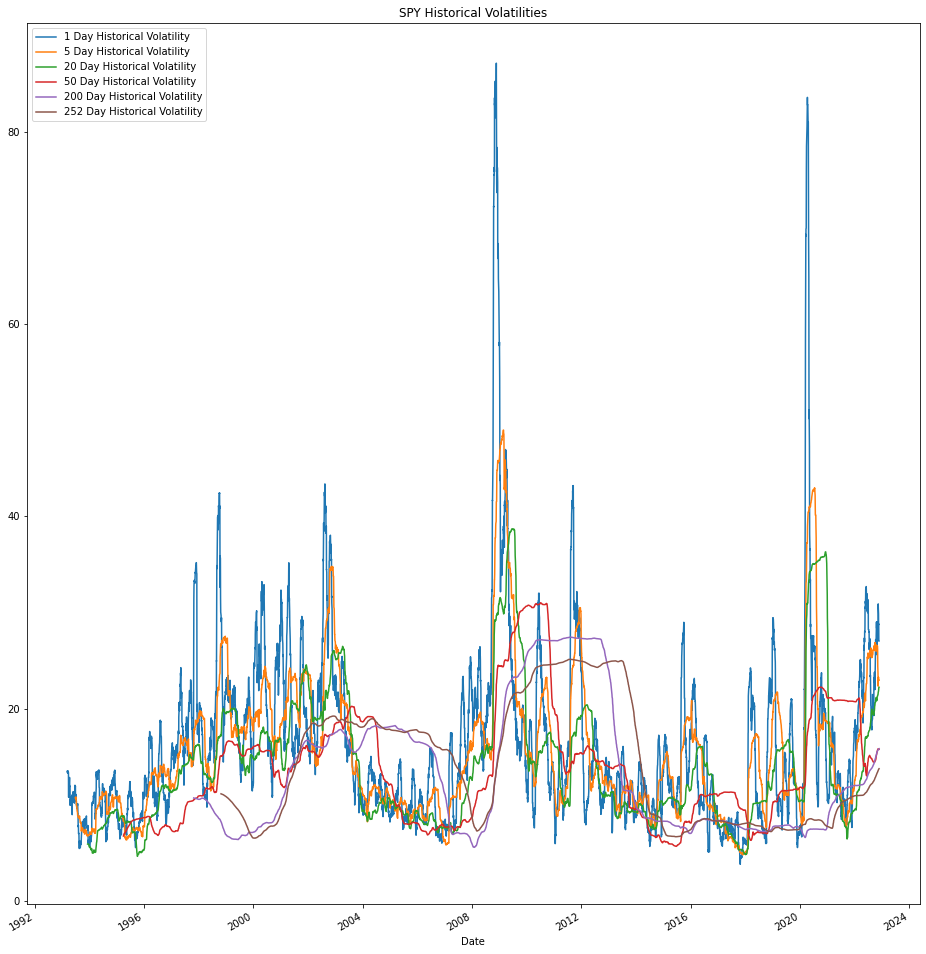

2000-01-03 00:00:00
148.25
6.523384486519179


In [ ]:
# We take SPY data from 1990 and discard the volatilities from 1992 - 1999 to start with 2000. 
# If we take SPY data from 2000, then we will get a lot of NaN to start
SPY_data = StockMarketData('SPY', 1990, 1, 1, 2022, 11, 21)
SPY_data.add_green_or_red()
SPY_data.add_historical_vol_periods()
SPY_data.plot_historical_vol()
SPY_data.add_other_daily_ratios()

# Note: 5760 Values for 1/3/2000 -- 11/21/2022. Calling index number -5760 suffices for this
print(SPY_data.data.index[-5760])
print(SPY_data.data['Open'][-5760])
print(SPY_data.data['252 Day Volatility'][-5760])

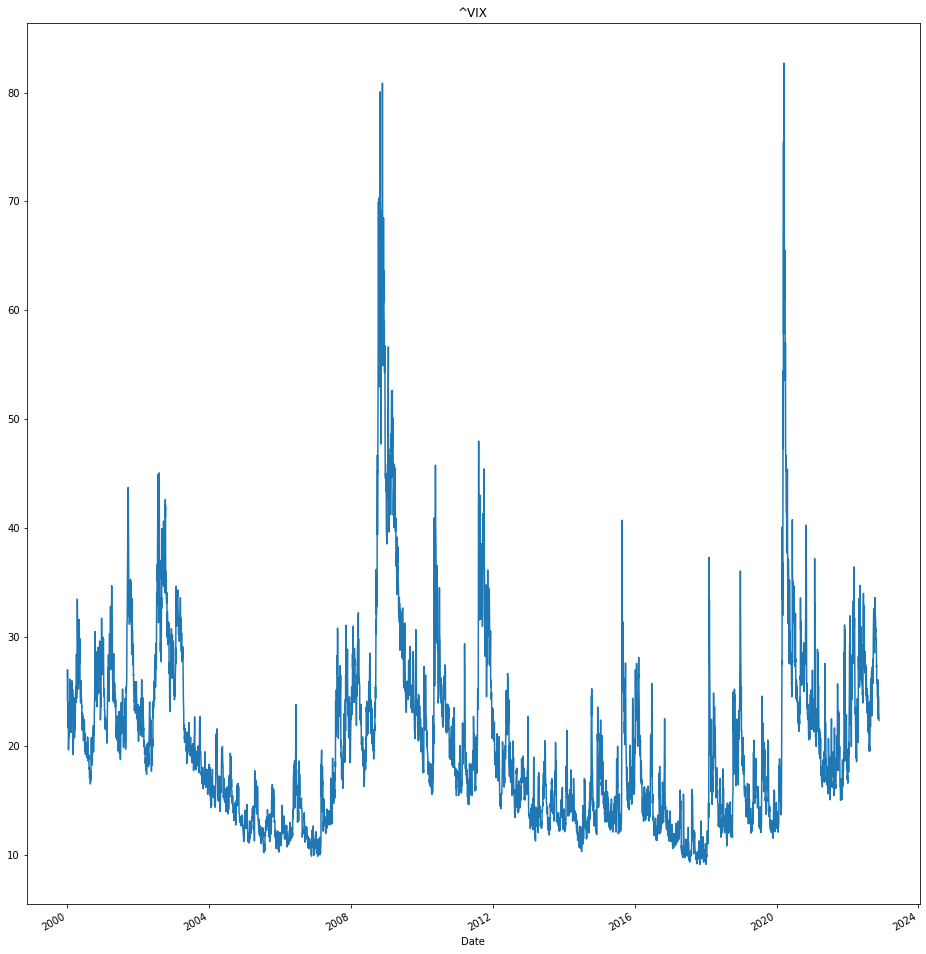

In [ ]:
# VIX is the Chicago Board of Options Exchange (CBOE)'s Options Volatility Index -- Let's see how it matches up
VIX_data = StockMarketData('^VIX', 2000, 1, 1, 2022, 11, 21)
VIX_data.line_plot_of_stock()

In [ ]:
print(SPY_data.data)

                  High         Low        Open       Close      Volume  \
Date                                                                     
1993-01-29   43.968750   43.750000   43.968750   43.937500   1003200.0   
1993-02-01   44.250000   43.968750   43.968750   44.250000    480500.0   
1993-02-02   44.375000   44.125000   44.218750   44.343750    201300.0   
1993-02-03   44.843750   44.375000   44.406250   44.812500    529400.0   
1993-02-04   45.093750   44.468750   44.968750   45.000000    531500.0   
...                ...         ...         ...         ...         ...   
2022-11-15  402.309998  394.489990  401.149994  398.489990  93194500.0   
2022-11-16  397.779999  394.790009  396.779999  395.450012  68508500.0   
2022-11-17  394.950012  390.140015  390.459991  394.239990  74496300.0   
2022-11-18  397.809998  393.040009  397.739990  396.029999  92922500.0   
2022-11-21  395.820007  392.660004  394.640015  394.589996  51243200.0   

             Adj Close  1 Day Returns

# Data Transformations


In [ ]:
# Open Data
Open_SPY = SPY_data.data['Open'][-5760:].values
# Close Data
Close_SPY = SPY_data.data['Close'][-5760:].values
# High Data
High_SPY = SPY_data.data['High'][-5760:].values
# Low Data
Low_SPY = SPY_data.data['Low'][-5760:].values
# Volume Data
Volume_SPY = SPY_data.data['Volume'][-5760:].values

In [ ]:
# 1 Day Volatility
One_Day_HV = SPY_data.data['1 Day Volatility'][-5760:].values
# 5 Day Volatility
Five_Day_HV = SPY_data.data['5 Day Volatility'][-5760:].values
# 20 Day Volatility
Twenty_Day_HV = SPY_data.data['20 Day Volatility'][-5760:].values
# 50 Day Volatility
Fifty_Day_HV = SPY_data.data['50 Day Volatility'][-5760:].values
# 200 Day Volatility
TwoHundred_Day_HV = SPY_data.data['200 Day Volatility'][-5760:].values
# 252 Day Volatility
OneYear_HV = SPY_data.data['252 Day Volatility'][-5760:].values
print(OneYear_HV)

[ 6.52338449  6.52400627  6.52794127 ... 13.69147794 13.71491251
 13.73839007]


In [ ]:
# Dates / Indices
dates = np.asarray(SPY_data.data.index[-5760:])
dates

array(['2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
       '2000-01-05T00:00:00.000000000', ...,
       '2022-11-17T00:00:00.000000000', '2022-11-18T00:00:00.000000000',
       '2022-11-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# 1 Day Return
One_Day_return = np.array(SPY_data.data['1 Day Returns'][-5760:])
# 5 Day Return
Five_Day_return = np.array(SPY_data.data['5 Day Returns'][-5760:])
# 20 Day Return
Twenty_Day_return = np.array(SPY_data.data['20 Day Returns'][-5760:])
# 50 Day Return
Fifty_Day_return = np.array(SPY_data.data['50 Day Returns'][-5760:])
# 200 Day Return
TwoHundred_Day_return = np.array(SPY_data.data['200 Day Returns'][-5760:])
# 252 Day Return
OneYear_return = np.array(SPY_data.data['252 Day Returns'][-5760:])

In [ ]:
# 1 Day Classifier
One_Day_classifier = SPY_data.data['1 Day Classifier'][-5760:].values
# 5 Day Classifier
Five_Day_classifier = SPY_data.data['5 Day Classifier'][-5760:].values
# 20 Day Classifier
Twenty_Day_classifier = SPY_data.data['20 Day Classifier'][-5760:].values
# 50 Day Classifier
Fifty_Day_classifier = SPY_data.data['50 Day Classifier'][-5760:].values
# 200 Day Classifier
TwoHundred_Day_classifier = SPY_data.data['200 Day Classifier'][-5760:].values
# 252 Day Classifier
OneYear_classifier = SPY_data.data['252 Day Classifier'][-5760:].values

In [ ]:
# Some Percent Changes
Percent_High_to_Low = SPY_data.data['Ratio High to Low'][-5760:].values
Percent_High_to_Close = SPY_data.data['Ratio High to Close'][-5760:].values
Percent_High_to_Open = SPY_data.data['Ratio High to Open'][-5760:].values
Percent_Close_to_Low = SPY_data.data['Ratio Close to Low'][-5760:].values
Percent_Open_to_Low = SPY_data.data['Ratio Open to Low'][-5760:].values
Percent_Close_to_Open = SPY_data.data['Ratio Close to Open'][-5760:].values
Percent_Volume_Increase = SPY_data.data['Volume Ratio'][-5760:].values
Percent_Volume_Increase

array([157.32971917,  -0.91250934,  50.53400579, ...,   8.74022931,
        24.73438278, -44.8538298 ])

# Some basic analyses

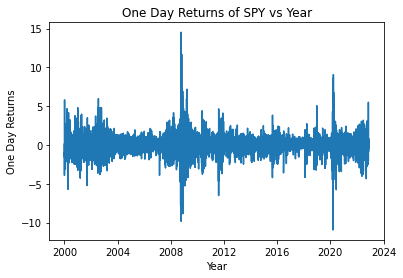

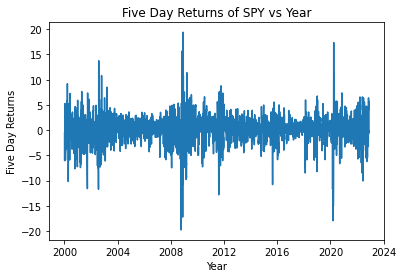

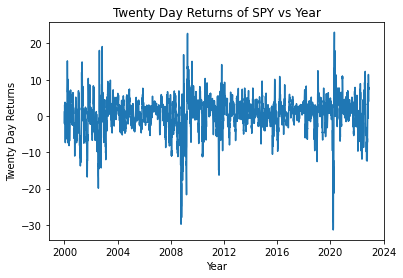

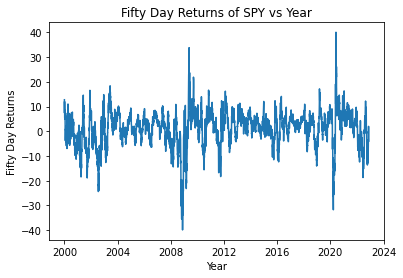

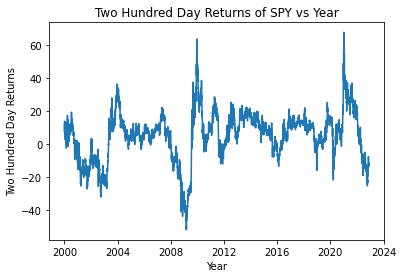

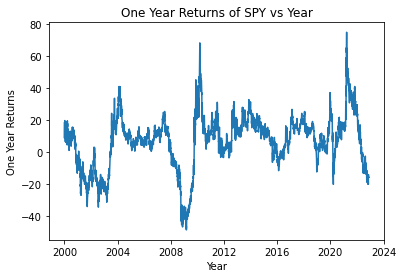

In [ ]:
# Plot the returns of the SPY (1, 5, 20, 50, 200, 252 day periods)
plt.figure()
plt.plot(dates, One_Day_return)
plt.xlabel('Year')
plt.ylabel('One Day Returns')
plt.title('One Day Returns of SPY vs Year')
plt.show()

plt.figure()
plt.plot(dates, Five_Day_return)
plt.xlabel('Year')
plt.ylabel('Five Day Returns')
plt.title('Five Day Returns of SPY vs Year')
plt.show()

plt.figure()
plt.plot(dates, Twenty_Day_return)
plt.xlabel('Year')
plt.ylabel('Twenty Day Returns')
plt.title('Twenty Day Returns of SPY vs Year')
plt.show()

plt.figure()
plt.plot(dates, Fifty_Day_return)
plt.xlabel('Year')
plt.ylabel('Fifty Day Returns')
plt.title('Fifty Day Returns of SPY vs Year')
plt.show()

plt.figure()
plt.plot(dates, TwoHundred_Day_return)
plt.xlabel('Year')
plt.ylabel('Two Hundred Day Returns')
plt.title('Two Hundred Day Returns of SPY vs Year')
plt.show()

plt.figure()
plt.plot(dates, OneYear_return)
plt.xlabel('Year')
plt.ylabel('One Year Returns')
plt.title('One Year Returns of SPY vs Year')
plt.show()

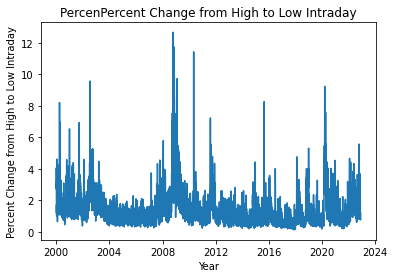

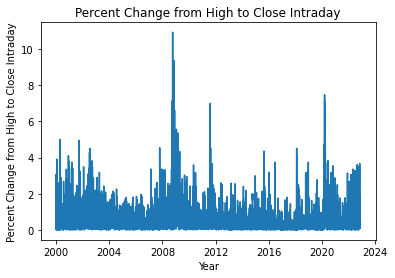

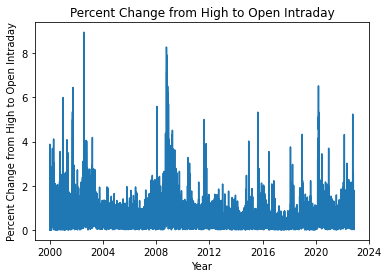

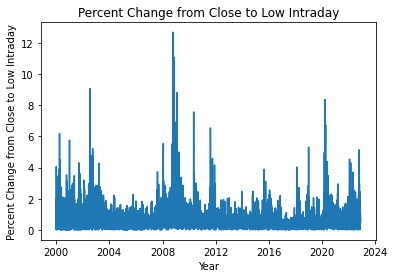

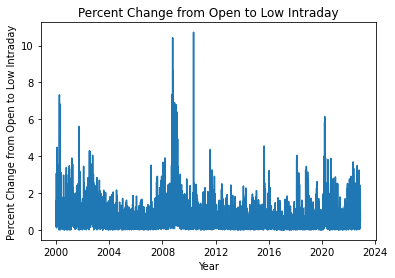

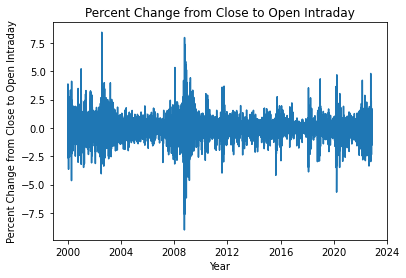

In [ ]:
# Plot the intraday percent changes of the SPY
plt.figure()
plt.plot(dates, Percent_High_to_Low)
plt.xlabel('Year')
plt.ylabel('Percent Change from High to Low Intraday')
plt.title('PercenPercent Change from High to Low Intraday')
plt.show()

plt.figure()
plt.plot(dates, Percent_High_to_Close)
plt.xlabel('Year')
plt.ylabel('Percent Change from High to Close Intraday')
plt.title('Percent Change from High to Close Intraday')
plt.show()

plt.figure()
plt.plot(dates, Percent_High_to_Open)
plt.xlabel('Year')
plt.ylabel('Percent Change from High to Open Intraday')
plt.title('Percent Change from High to Open Intraday')
plt.show()

plt.figure()
plt.plot(dates, Percent_Close_to_Low)
plt.xlabel('Year')
plt.ylabel('Percent Change from Close to Low Intraday')
plt.title('Percent Change from Close to Low Intraday')
plt.show()

plt.figure()
plt.plot(dates, Percent_Open_to_Low)
plt.xlabel('Year')
plt.ylabel('Percent Change from Open to Low Intraday')
plt.title('Percent Change from Open to Low Intraday')
plt.show()

plt.figure()
plt.plot(dates, Percent_Close_to_Open)
plt.xlabel('Year')
plt.ylabel('Percent Change from Close to Open Intraday')
plt.title('Percent Change from Close to Open Intraday')
plt.show()

In [ ]:
VIX_Open = VIX_data.data['Open'][-5760:].values
VIX_Close = VIX_data.data['Close'][-5760:].values

In [ ]:
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import model_selection

# Classifier Predictions (Up / Down || Green / Red) on a Close - Close Basis

In [ ]:
input_1 = np.vstack((One_Day_return[:-1], Five_Day_return[:-1], Twenty_Day_return[:-1], Fifty_Day_return[:-1], TwoHundred_Day_return[:-1], OneYear_return[:-1],
                     One_Day_HV[:-1], Five_Day_HV[:-1], Twenty_Day_HV[:-1], Fifty_Day_HV[:-1], TwoHundred_Day_HV[:-1], OneYear_HV[:-1],
                     Percent_High_to_Low[:-1], Percent_High_to_Open[:-1], Percent_High_to_Close[:-1], Percent_Open_to_Low[:-1], Percent_Close_to_Low[:-1], 
                     Percent_Close_to_Open[:-1], VIX_Open[:-1], VIX_Close[:-1], Percent_Volume_Increase[:-1]))

input_1_names=['One Day Returns', 'Five Day Returns', 'Twenty Day Returns', 'Fifty Day Returns', 'Two Hundred Day Returns', 'One Year Returns', 
               'One Day HV', 'Five Day HV', 'Twenty Day HV', 'Fifty Day HV', 'Two Hundred Day HV', 'One Year HV',
               'Percent High to Low', 'Percent High to Open', 'Percent High to Close', 'Percent Open to Low', 'Percent Close to Low', 'Percent Close to Open',
               'VIX Open', 'VIX Close', 'Percent Volume Increase']
               
input_1

array([[-9.78723404e-01, -3.91061453e+00,  1.78890877e-01, ...,
        -7.62874376e-01, -3.05986075e-01,  4.54040328e-01],
       [-5.76799829e-01, -4.40359128e+00, -4.64027246e+00, ...,
         5.69855586e+00, -1.14016622e-01, -6.22320877e-01],
       [ 1.10797306e+00, -2.12300285e+00, -1.14739629e+00, ...,
         7.31343615e+00,  7.88976390e+00,  5.80832770e+00],
       ...,
       [ 2.43600006e+01,  2.49400005e+01,  2.79799995e+01, ...,
         2.42900009e+01,  2.40499992e+01,  2.40300007e+01],
       [ 2.42099991e+01,  2.70100002e+01,  2.64099998e+01, ...,
         2.41100006e+01,  2.39300003e+01,  2.31200008e+01],
       [ 1.57329719e+02, -9.12509339e-01,  5.05340058e+01, ...,
        -2.64886876e+01,  8.74022931e+00,  2.47343828e+01]])

In [ ]:
# v2's Inputs -- Less Features
input_1_v2 = np.vstack((One_Day_return[:-1], Five_Day_return[:-1], One_Day_HV[:-1], Five_Day_HV[:-1], 
                     Percent_High_to_Low[:-1], Percent_High_to_Open[:-1], Percent_High_to_Close[:-1], Percent_Open_to_Low[:-1], Percent_Close_to_Low[:-1], 
                     Percent_Close_to_Open[:-1], VIX_Open[:-1], VIX_Close[:-1], Percent_Volume_Increase[:-1]))

input_1_v2_names=['One Day Returns', 'Five Day Returns', 'One Day HV', 'Five Day HV', 'Percent High to Low', 'Percent High to Open', 
                  'Percent High to Close', 'Percent Open to Low', 'Percent Close to Low', 'Percent Close to Open', 'VIX Open', 'VIX Close', 
                  'Percent Volume Increase']
               
input_1_v2

array([[-9.78723404e-01, -3.91061453e+00,  1.78890877e-01, ...,
        -7.62874376e-01, -3.05986075e-01,  4.54040328e-01],
       [-5.76799829e-01, -4.40359128e+00, -4.64027246e+00, ...,
         5.69855586e+00, -1.14016622e-01, -6.22320877e-01],
       [ 1.22802916e+01,  1.70650917e+01,  1.70796188e+01, ...,
         2.88197279e+01,  2.86306347e+01,  2.71497863e+01],
       ...,
       [ 2.43600006e+01,  2.49400005e+01,  2.79799995e+01, ...,
         2.42900009e+01,  2.40499992e+01,  2.40300007e+01],
       [ 2.42099991e+01,  2.70100002e+01,  2.64099998e+01, ...,
         2.41100006e+01,  2.39300003e+01,  2.31200008e+01],
       [ 1.57329719e+02, -9.12509339e-01,  5.05340058e+01, ...,
        -2.64886876e+01,  8.74022931e+00,  2.47343828e+01]])

In [ ]:
normalizer = preprocessing.StandardScaler()

In [ ]:
# For One Day Classifier
output_1_one_day_classifier = One_Day_classifier[1:]

output_1_one_day_classifier_names=['Down', 'Up']

output_1_one_day_classifier

array([False,  True, False, ..., False,  True, False])

In [ ]:
# For Five Day Classifier
output_1_five_day_classifier = Five_Day_classifier[1:]

output_1_five_day_classifier_names=['Down', 'Up']

output_1_five_day_classifier

array([False, False, False, ..., False, False, False])

## Usage of Decision Trees and Forests

### For One Day Classifier

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing dataset
input1_train, input1_test, output1_train, output1_test = train_test_split(input_1.transpose(), output_1_one_day_classifier)
print(input1_train.shape, output1_train.shape)

(4319, 21) (4319,)


In [ ]:
# Using v2's Inputs -- Less Features
input1_v2_train, input1_v2_test, output1_v2_train, output1_v2_test = train_test_split(input_1_v2.transpose(), output_1_one_day_classifier)

### Usage of Decision Trees for Classification -- One Day Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Split trainset into training and validation dataset
input1_train_v1, input1_valid_v1, output1_train_v1, output1_valid_v1 = train_test_split(input1_train, output1_train)

input1_train_v1_std_transform = normalizer.fit_transform(input1_train_v1)

In [ ]:
# Using v2's Inputs -- Less Features
input1_train_v2, input1_valid_v2, output1_train_v2, output1_valid_v2 = train_test_split(input1_v2_train, output1_v2_train)

input1_train_v2_std_transform = normalizer.fit_transform(input1_train_v2)

[Text(0.5340909090909091, 0.9166666666666666, 'Five Day Returns <= 1.877\ngini = 0.498\nsamples = 3239\nvalue = [1508, 1731]\nclass = Up'),
 Text(0.3181818181818182, 0.75, 'Five Day Returns <= 1.783\ngini = 0.497\nsamples = 3159\nvalue = [1455, 1704]\nclass = Up'),
 Text(0.22727272727272727, 0.5833333333333334, 'Five Day HV <= 4.092\ngini = 0.497\nsamples = 3143\nvalue = [1454, 1689]\nclass = Up'),
 Text(0.18181818181818182, 0.4166666666666667, 'Five Day HV <= 3.115\ngini = 0.497\nsamples = 3135\nvalue = [1446, 1689]\nclass = Up'),
 Text(0.09090909090909091, 0.25, 'Two Hundred Day Returns <= 3.01\ngini = 0.498\nsamples = 3073\nvalue = [1430, 1643]\nclass = Up'),
 Text(0.045454545454545456, 0.08333333333333333, 'gini = 0.498\nsamples = 3059\nvalue = [1429, 1630]\nclass = Up'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.133\nsamples = 14\nvalue = [1, 13]\nclass = Up'),
 Text(0.2727272727272727, 0.25, 'VIX Open <= 3.372\ngini = 0.383\nsamples = 62\nvalue = [16, 46]\nclass =

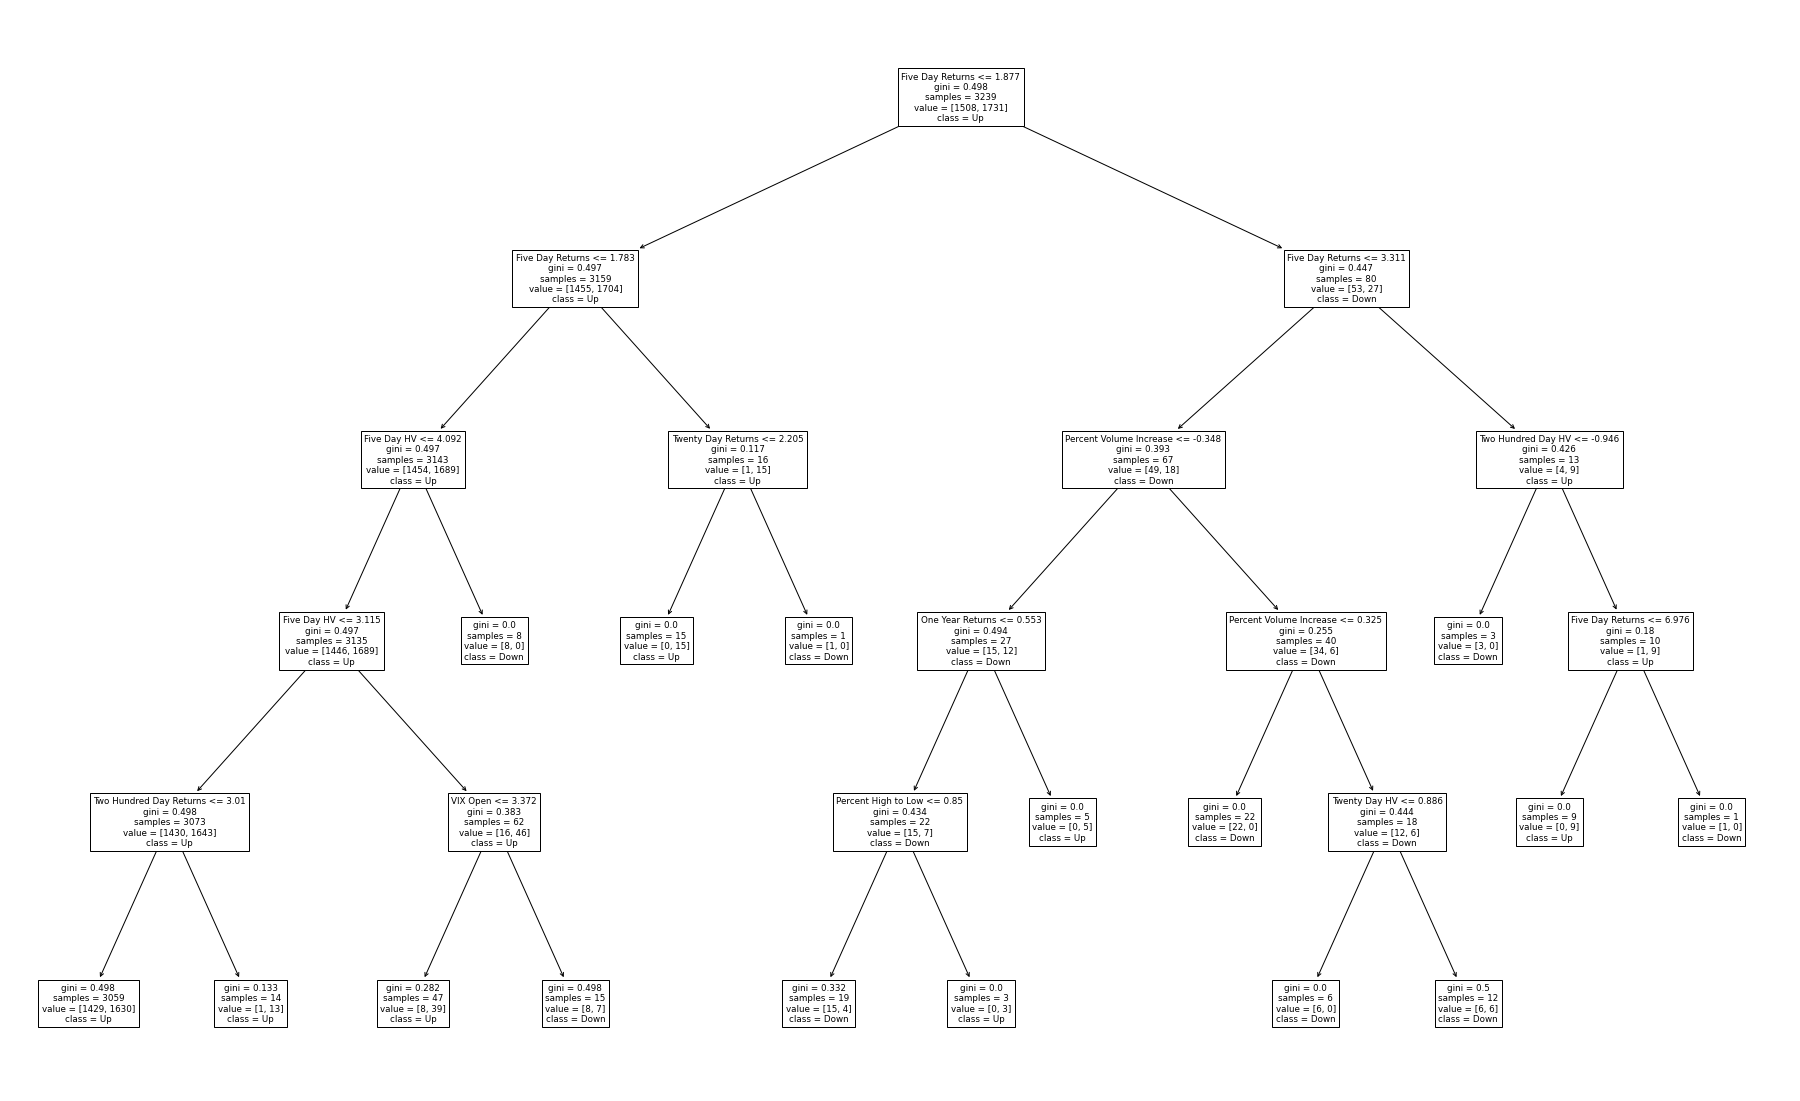

In [ ]:
tree_1 = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='best', max_depth=5, max_features=None)
tree_1.fit(input1_train_v1_std_transform, output1_train_v1)
fig=plt.figure(figsize=[32,20])
plot_tree(tree_1,
          feature_names=input_1_names,
          class_names=output_1_one_day_classifier_names)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
output1_validation_tree_1=tree_1.predict_proba(normalizer.fit_transform(input1_valid_v1))
print('The first tree has an AUC of {0}'.format(roc_auc_score(output1_valid_v1, output1_validation_tree_1[:,1])))

The first tree has an AUC of 0.49780862068965526


### Usage of Decision Forests for Classification -- One Day Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
our_forest_1=RandomForestClassifier(n_estimators=10,max_depth=5,min_samples_split=2,min_samples_leaf=1,\
                     random_state=42,max_features='auto')
our_forest_1.fit(normalizer.fit_transform(input1_train_v1), output1_train_v1)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

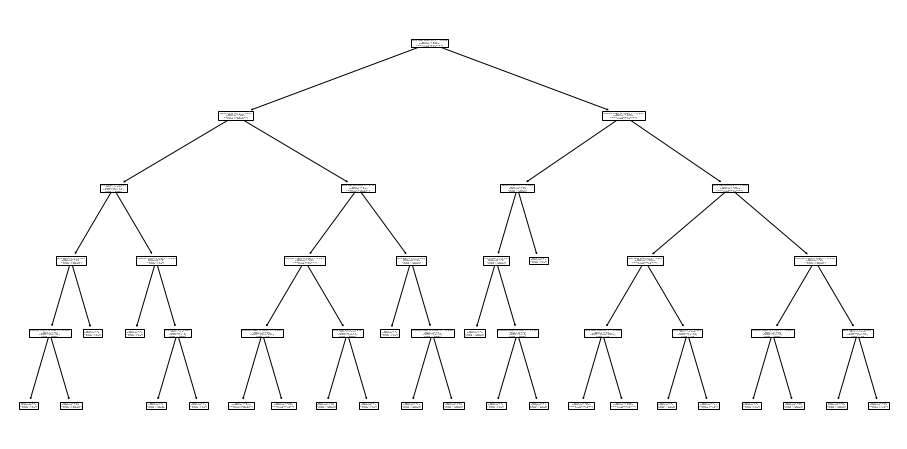

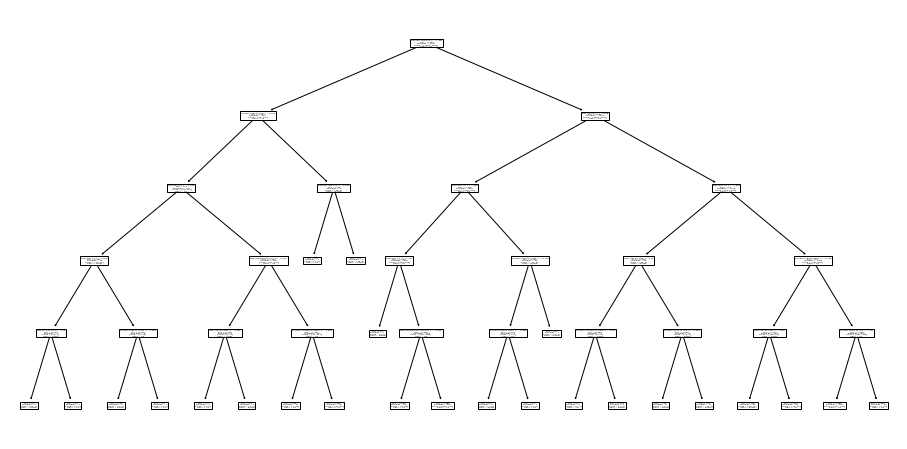

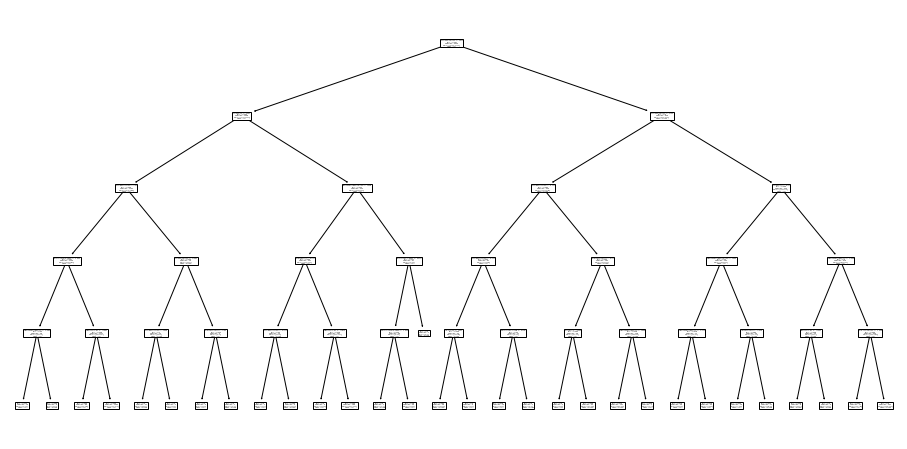

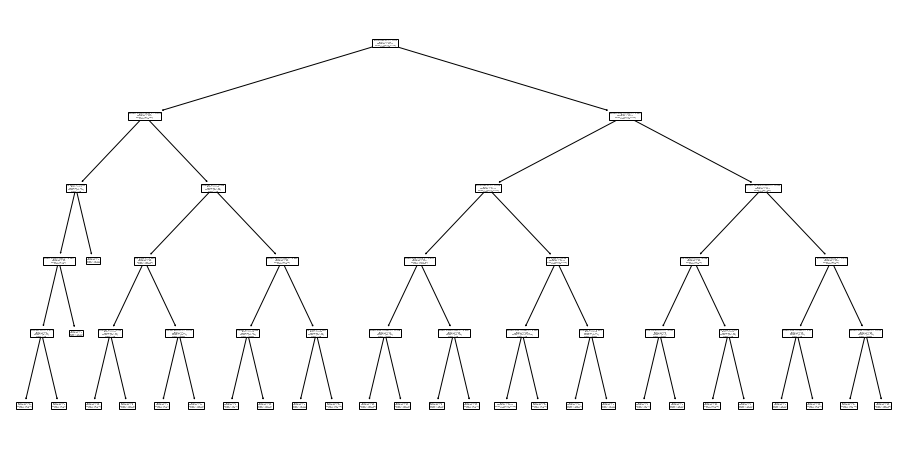

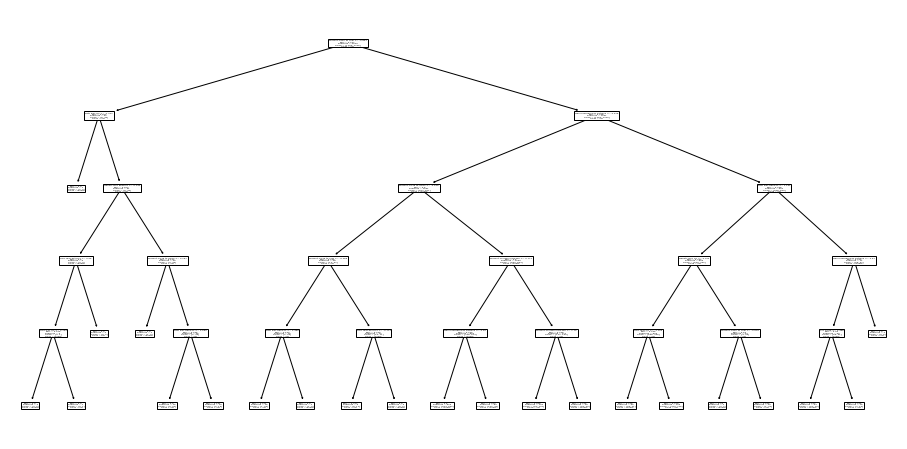

In [ ]:
# Extract single tree
for t in range(0,5):
    a_single_tree = our_forest_1.estimators_[t]
    fig=plt.figure(figsize=[16,8])
    plot_tree(a_single_tree,
          feature_names=input_1_names,
          class_names=output_1_one_day_classifier_names)

In [ ]:
output1_validation_forest_1=our_forest_1.predict_proba(normalizer.fit_transform(input1_valid_v1))
print('The random forest has an AUC of {0}'.format(roc_auc_score(output1_valid_v1, output1_validation_forest_1[:,1])))

The random forest has an AUC of 0.5195620689655173


Version 2 Uses less features -- let's see how it looks like.

In [ ]:
our_forest_1_v2=RandomForestClassifier(n_estimators=10,max_depth=5,min_samples_split=2,min_samples_leaf=1,\
                     random_state=42,max_features='auto')
our_forest_1_v2.fit(normalizer.fit_transform(input1_train_v2), output1_train_v2)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

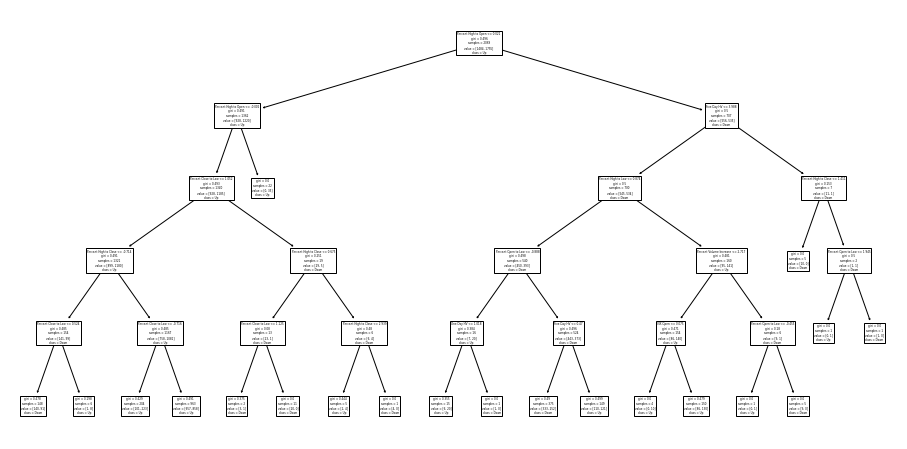

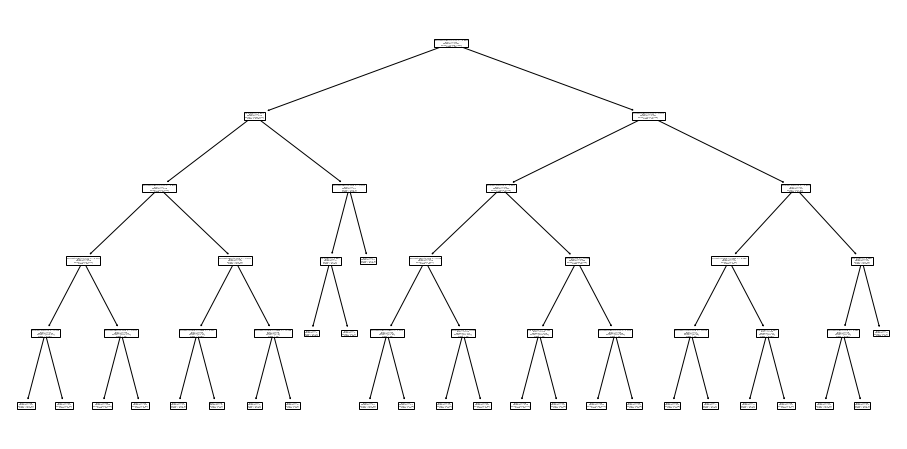

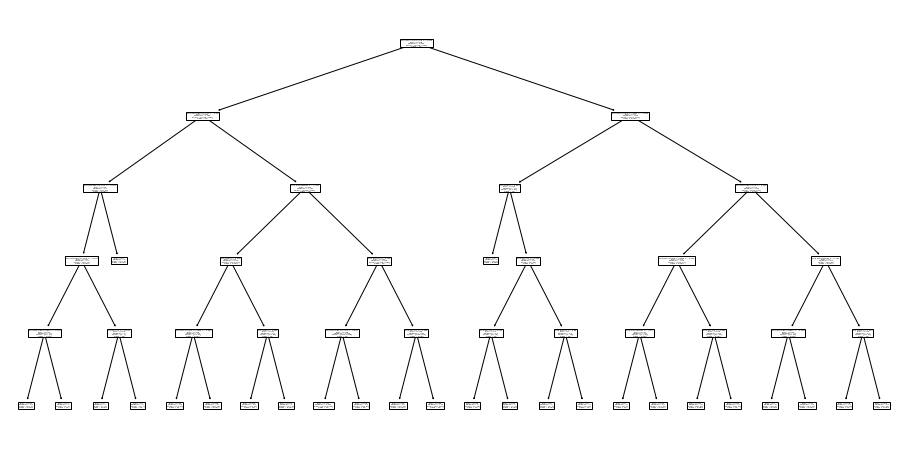

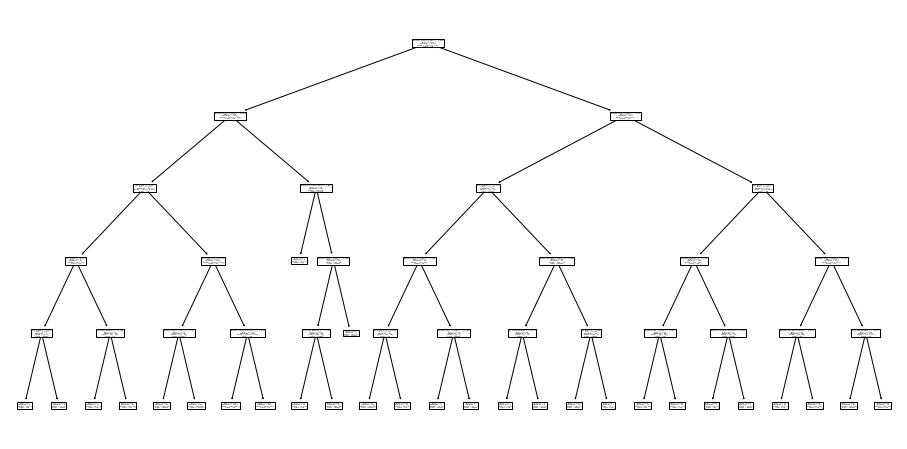

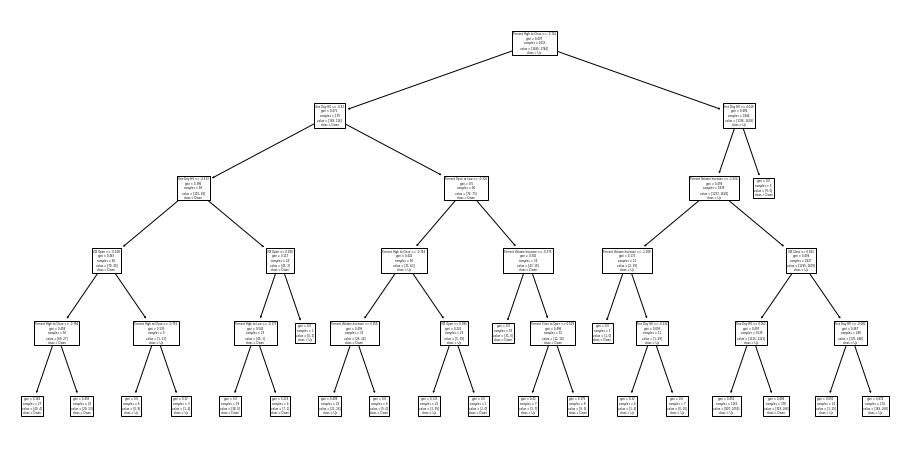

In [ ]:
# Extract single tree
for t in range(0,5):
    a_single_tree = our_forest_1_v2.estimators_[t]
    fig=plt.figure(figsize=[16,8])
    plot_tree(a_single_tree,
          feature_names=input_1_v2_names,
          class_names=output_1_one_day_classifier_names)

In [ ]:
output1_validation_forest_1_v2=our_forest_1_v2.predict_proba(normalizer.fit_transform(input1_valid_v2))
print('The random forest has an AUC of {0}'.format(roc_auc_score(output1_valid_v2, output1_validation_forest_1_v2[:,1])))

The random forest has an AUC of 0.508072692293053


The AUC for a Random Forest that classifies the one day returns as postiive (True) or negative (False) has an AUC of around 0.51 to 0.52, regardless of using v1 (21 Predictive Features) or v2 (13 Predictive Features). The random forest used has a max depth of 5, and is made of 10 trees.

### For Five Day Classifier

In [ ]:
# Split into train and testing dataset
input_1_five_day_classifier_train, input1_five_day_classifier_test, \
output_1_five_day_classifier_train, output_1_five_day_classifier_test = train_test_split(input_1.transpose(), output_1_five_day_classifier)

In [ ]:
# Split train set into train and validation dataset
input_1_five_day_classifier_train_v1, input_1_five_day_classifier_valid_v1, \
output_1_five_day_classifier_train_v1, output_1_five_day_classifier_valid_v1 = train_test_split(input_1_five_day_classifier_train, output_1_five_day_classifier_train)

input_1_five_day_classifier_train_v1_std_transform = normalizer.fit_transform(input_1_five_day_classifier_train_v1)

In [ ]:
our_forest_1_five_day_classifier=RandomForestClassifier(n_estimators=10,max_depth=5,min_samples_split=2,min_samples_leaf=1,\
                                                        random_state=42,max_features='auto')
our_forest_1_five_day_classifier.fit(normalizer.fit_transform(input_1_five_day_classifier_train_v1), output_1_five_day_classifier_train_v1)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
output_1_five_day_classifier_validation_forest_1=our_forest_1_five_day_classifier.predict_proba(normalizer.fit_transform(input_1_five_day_classifier_valid_v1))
print('The random forest has an AUC of {0}'.format(roc_auc_score(output_1_five_day_classifier_valid_v1, output_1_five_day_classifier_validation_forest_1[:,1])))

The random forest has an AUC of 0.8509292620793514


In [ ]:
# Using v2 -- less features taken into account
input_1_five_day_classifier_train_v2, input1_five_day_classifier_test_v2, \
output_1_five_day_classifier_train_v2, output_1_five_day_classifier_test_v2 = train_test_split(input_1_v2.transpose(), output_1_five_day_classifier)

In [ ]:
# Split train set into train and validation dataset
input_1_five_day_classifier_train_v2, input_1_five_day_classifier_valid_v2, \
output_1_five_day_classifier_train_v2, output_1_five_day_classifier_valid_v2 = train_test_split(input_1_five_day_classifier_train_v2, output_1_five_day_classifier_train_v2)

input_1_five_day_classifier_train_v2_std_transform = normalizer.fit_transform(input_1_five_day_classifier_train_v2)

In [ ]:
our_forest_1_five_day_classifier_v2=RandomForestClassifier(n_estimators=10,max_depth=5,min_samples_split=2,min_samples_leaf=1,\
                                                        random_state=42,max_features='auto')
our_forest_1_five_day_classifier_v2.fit(normalizer.fit_transform(input_1_five_day_classifier_train_v2), output_1_five_day_classifier_train_v2)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
output_1_five_day_classifier_validation_forest_1_v2 = our_forest_1_five_day_classifier_v2.predict_proba(normalizer.fit_transform(input_1_five_day_classifier_valid_v2))
print('The random forest has an AUC of {0}'.format(roc_auc_score(output_1_five_day_classifier_valid_v2, output_1_five_day_classifier_validation_forest_1_v2[:,1])))

The random forest has an AUC of 0.8548742931709439


The AUC for a Random Forest that classifies the five day returns as postiive (True) or negative (False) has an AUC of around 0.85, regardless of using v1 (21 Predictive Features) or v2 (13 Predictive Features). The random forest used has a max depth of 5, and is made of 10 trees.

## Usage of Logistic Regression Methods

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition

In [ ]:
input_1_logistic_regression_train, input_1_logistic_regression_test, output_1_logistic_regression_train, output_1_logistic_regression_test =\
train_test_split(input_1.transpose(), output_1_one_day_classifier)
print(input_1_logistic_regression_train.shape, output_1_logistic_regression_train.shape)

(4319, 21) (4319,)


In [ ]:
# Using v2's Inputs -- Less Features
input_1_logistic_regression_v2_train, input_1_logistic_regression_v2_test, \
output_1_logistic_regression_v2_train, output_1_logistic_regression_v2_test =\
train_test_split(input_1_v2.transpose(), output_1_one_day_classifier)

In [ ]:
# For 5 Day Classifier
input_1_logistic_regression_five_day_train, input_1_logistic_regression_five_day_test, \
output_1_logistic_regression_five_day_train, output_1_logistic_regression_five_day_test =\
train_test_split(input_1_v2.transpose(), output_1_five_day_classifier)
print(input_1_logistic_regression_five_day_train.shape, output_1_logistic_regression_five_day_train.shape)

(4319, 13) (4319,)


In [ ]:
# For 5 Day Classifier v2 Inputs -- Less Features
input_1_logistic_regression_five_day_train_v2, input_1_logistic_regression_five_day_test_v2, \
output_1_logistic_regression_five_day_train_v2, output_1_logistic_regression_five_day_test_v2 =\
train_test_split(input_1_v2.transpose(), output_1_five_day_classifier)

### Usage of Logistic Regression for One Day Classifier

In [ ]:
# Split train set into train and validation dataset
input_1_logistic_regression_train_v1, input_1_logistic_regression_valid_v1, \
output_1_logistic_regression_train_v1, output_1_logistic_regression_valid_v1 =\
train_test_split(input_1_logistic_regression_train, output_1_logistic_regression_train)

In [ ]:
normalizer = preprocessing.StandardScaler()
logistic_regression = LogisticRegression()
pipeline_log_regression_1 = pipeline.Pipeline(steps=[('scaler', normalizer), ('logistic', logistic_regression)])

pipeline_log_regression_1.fit(input_1_logistic_regression_train_v1, output_1_logistic_regression_train_v1)
print('The AUC for Logistic Regression with v1 -- 22 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_valid_v1, pipeline_log_regression_1.predict(input_1_logistic_regression_valid_v1))))

The AUC for Logistic Regression with v1 -- 22 features is 0.5021351700387431


In [ ]:
# Split train set into train and validation dataset
input_1_logistic_regression_train_v2, input_1_logistic_regression_valid_v2, \
output_1_logistic_regression_train_v2, output_1_logistic_regression_valid_v2 =\
train_test_split(input_1_logistic_regression_v2_train, output_1_logistic_regression_v2_train)

In [ ]:
normalizer = preprocessing.StandardScaler()
logistic_regression = LogisticRegression()
pipeline_log_regression_1_v2 = pipeline.Pipeline(steps=[('scaler', normalizer), ('logistic', logistic_regression)])

pipeline_log_regression_1_v2.fit(input_1_logistic_regression_train_v2, output_1_logistic_regression_train_v2)
print('The AUC for Logistic Regression with v2 -- 13 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_valid_v2, pipeline_log_regression_1_v2.predict(input_1_logistic_regression_valid_v2))))

The AUC for Logistic Regression with v2 -- 13 features is 0.5052507097189133


The AUC for a Logistic Regression model that classifies the one day returns as positive (True) or negative (False) has an AUC of around 0.50, regardless of using v1 (21 Predictive Features) or v2 (13 Predictive Features).

### Usage of Logistic Regression for Five Day Classifer


In [ ]:
# Split train set into train and validation dataset
input_1_logistic_regression_five_day_train_v1, input_1_logistic_regression_five_day_valid_v1, \
output_1_logistic_regression_five_day_train_v1, output_1_logistic_regression_five_day_valid_v1 =\
train_test_split(input_1_logistic_regression_five_day_train, output_1_logistic_regression_five_day_train)

In [ ]:
normalizer = preprocessing.StandardScaler()
logistic_regression = LogisticRegression()
pipeline_log_regression_five_day = pipeline.Pipeline(steps=[('scaler', normalizer), ('logistic', logistic_regression)])

pipeline_log_regression_five_day.fit(input_1_logistic_regression_five_day_train_v1, output_1_logistic_regression_five_day_train_v1)
print('The AUC for Logistic Regression with v2 -- 21 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_five_day_valid_v1, pipeline_log_regression_five_day.predict(input_1_logistic_regression_five_day_valid_v1))))

The AUC for Logistic Regression with v2 -- 21 features is 0.7780659340659342


In [ ]:
# Split train set into train and validation dataset
input_1_logistic_regression_five_day_train_v2, input_1_logistic_regression_five_day_valid_v2, \
output_1_logistic_regression_five_day_train_v2, output_1_logistic_regression_five_day_valid_v2 =\
train_test_split(input_1_logistic_regression_five_day_train_v2, output_1_logistic_regression_five_day_train_v2)

In [ ]:
normalizer = preprocessing.StandardScaler()
logistic_regression = LogisticRegression()
pipeline_log_regression_five_day_v2 = pipeline.Pipeline(steps=[('scaler', normalizer), ('logistic', logistic_regression)])

pipeline_log_regression_five_day_v2.fit(input_1_logistic_regression_five_day_train_v2, output_1_logistic_regression_five_day_train_v2)
print('The AUC for Logistic Regression with v2 -- 13 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_five_day_valid_v2, pipeline_log_regression_five_day_v2.predict(input_1_logistic_regression_five_day_valid_v2))))

The AUC for Logistic Regression with v2 -- 13 features is 0.7983286966490053


The AUC for a Logistic Regression model that classifies the five day returns as positive (True) or negative (False) has an AUC of around 0.78 to 0.80, regardless of using v1 (21 Predictive Features) or v2 (13 Predictive Features). 

## Deep Learning for Classification

In [ ]:
from sklearn import neural_network

### Set aside for Hidden Testing Set

In [ ]:
# For 1 Day Classifier
input_1_nn_classifier_train, input_1_nn_classifier_test, output_1_nn_classifier_train, output_1_nn_classifier_test =\
train_test_split(input_1.transpose(), output_1_one_day_classifier)
print(input_1_nn_classifier_train.shape, output_1_nn_classifier_train.shape)

(4319, 21) (4319,)


In [ ]:
# Using v2's Inputs -- Less Features
input_1_nn_classifier_v2_train, input_1_nn_classifier_v2_test, \
output_1_nn_classifier_v2_train, output_1_nn_classifier_v2_test =\
train_test_split(input_1_v2.transpose(), output_1_one_day_classifier)

In [ ]:
# For 5 Day Classifier
input_1_nn_classifier_five_day_train, input_1_nn_classifier_five_day_test, \
output_1_nn_classifier_five_day_train, output_1_nn_classifier_five_day_test =\
train_test_split(input_1_v2.transpose(), output_1_five_day_classifier)
print(input_1_nn_classifier_five_day_train.shape, output_1_nn_classifier_five_day_train.shape)

(4319, 13) (4319,)


In [ ]:
# For 5 Day Classifier v2 Inputs -- Less Features
input_1_nn_classifier_five_day_train_v2, input_1_nn_classifier_five_day_test_v2, \
output_1_nn_classifier_five_day_train_v2, output_1_nn_classifier_five_day_test_v2 =\
train_test_split(input_1_v2.transpose(), output_1_five_day_classifier)

### Usage for NN / MLP for One Day Classifier

In [ ]:
n_folds =5 
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=42)

In [ ]:
pipe_nn_1_one_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPClassifier(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_1_one_day_v1 = model_selection.GridSearchCV(pipe_nn_1_one_day_v1, param_grid, scoring='roc_auc', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_1_one_day_v1.fit(input_1_nn_classifier_train, output_1_nn_classifier_train)
print('Optimal CV ROC_AUC is {}'.format(gscv_nn_1_one_day_v1.best_score_))
print(gscv_nn_1_one_day_v1.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.511 total time=   3.5s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.497 total time=   6.2s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.543 total time=   4.9s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.524 total time=   6.5s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.514 total time=   3.2s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END .nn__hidden_layer_sizes=(50,);,

In [ ]:
pipe_nn_1_one_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPClassifier(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_1_one_day_v2 = model_selection.GridSearchCV(pipe_nn_1_one_day_v2, param_grid, scoring='roc_auc', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_1_one_day_v2.fit(input_1_nn_classifier_v2_train, output_1_nn_classifier_v2_train)
print('Optimal CV ROC_AUC is {}'.format(gscv_nn_1_one_day_v2.best_score_))
print(gscv_nn_1_one_day_v2.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.525 total time=   0.8s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.488 total time=   1.2s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.501 total time=   1.4s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.529 total time=   0.9s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.516 total time=   0.6s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END .nn__hidden_layer_sizes=(50,);,

The AUC for an MLP that classifies the one day returns as positive (True) or negative (False) has an AUC of around 0.519, regardless of using v1 (21 Predictive Features) or v2 (13 Predictive Features). With 21 Predictive Features, it requires 100 layers to achieve this AUC, while with 13 Predictive Features, it alsoe requires 100 layers to achieve this AUC.

### Usage for NN / MLP Five Day Classifier


In [ ]:
pipe_nn_1_five_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPClassifier(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_1_five_day_v1 = model_selection.GridSearchCV(pipe_nn_1_five_day_v1, param_grid, scoring='roc_auc', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_1_five_day_v1.fit(input_1_nn_classifier_five_day_train, output_1_nn_classifier_five_day_train)
print('Optimal CV ROC_AUC is {}'.format(gscv_nn_1_five_day_v1.best_score_))
print(gscv_nn_1_five_day_v1.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.881 total time=   1.5s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.886 total time=   1.8s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.886 total time=   1.5s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.875 total time=   1.3s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.876 total time=   1.5s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END .nn__hidden_layer_sizes=(50,);,

In [ ]:
pipe_nn_1_five_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPClassifier(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_1_five_day_v2 = model_selection.GridSearchCV(pipe_nn_1_five_day_v2, param_grid, scoring='roc_auc', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_1_five_day_v2.fit(input_1_nn_classifier_five_day_train_v2, output_1_nn_classifier_five_day_train_v2)
print('Optimal CV ROC_AUC is {}'.format(gscv_nn_1_five_day_v2.best_score_))
print(gscv_nn_1_five_day_v2.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.878 total time=   0.8s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.876 total time=   1.4s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.876 total time=   1.8s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.870 total time=   1.5s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END .nn__hidden_layer_sizes=(10,);, score=0.878 total time=   1.9s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END .nn__hidden_layer_sizes=(50,);,

The AUC for an MLP that classifies the five day returns as positive (True) or negative (False) has an AUC of around 0.87-0.88, regardless of using v1 (21 Predictive Features) or v2 (13 Predictive Features). Both uses 10 layers to achieve this optimal AUC.

# Return Predictive Models on a Close - Close Basis

In [ ]:
# For One Day Predictor
output_1_one_day_predictor = One_Day_return[1:]

output_1_one_day_predictor

array([-3.91061453,  0.17889088, -1.60714286, ..., -0.30598608,
        0.45404033, -0.36360944])

In [ ]:
# For Five Day Predictor
output_1_five_day_predictor = Five_Day_return[1:]

output_1_five_day_predictor

array([-4.40359128, -4.64027246, -6.06286628, ..., -0.11401662,
       -0.62232088, -0.13413616])

## Penalized Regression

### Set aside hidden testing dataset

In [ ]:
# For 1 Day Predictor
input_1_penalized_predictor_train, input_1_penalized_predictor_test, output_1_penalized_predictor_train, output_1_penalized_predictor_test =\
train_test_split(input_1.transpose(), output_1_one_day_predictor)
print(input_1_penalized_predictor_train.shape, output_1_penalized_predictor_train.shape)

(4319, 21) (4319,)


In [ ]:
# Using v2's Inputs -- Less Features
input_1_penalized_predictor_v2_train, input_1_penalized_predictor_v2_test, \
output_1_penalized_predictor_v2_train, output_1_penalized_predictor_v2_test =\
train_test_split(input_1_v2.transpose(), output_1_one_day_predictor)

In [ ]:
# For 5 Day Predictor
input_1_penalized_predictor_five_day_train, input_1_penalized_predictor_five_day_test, \
output_1_penalized_predictor_five_day_train, output_1_penalized_predictor_five_day_test =\
train_test_split(input_1_v2.transpose(), output_1_five_day_predictor)
print(input_1_penalized_predictor_five_day_train.shape, output_1_penalized_predictor_five_day_train.shape)

(4319, 13) (4319,)


In [ ]:
# For 5 Day Predictor v2 Inputs -- Less Features
input_1_penalized_predictor_five_day_train_v2, input_1_penalized_predictor_five_day_test_v2, \
output_1_penalized_predictor_five_day_train_v2, output_1_penalized_predictor_five_day_test_v2 =\
train_test_split(input_1_v2.transpose(), output_1_five_day_predictor)

In [ ]:
from sklearn import linear_model

### Usage for Ridge and Lasso Regression for One Day Predictor

In [ ]:
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

pipe_penalized_predictor_1_one_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_one_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
param_grid = {'regressor__alpha':alphas}

#Ridge
gscv_penalized_predictor_1_one_day_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_one_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_one_day_v1.fit(input_1_penalized_predictor_train, output_1_penalized_predictor_train)

#Lasso
gscv_penalized_predictor_2_one_day_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_one_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_one_day_v1.fit(input_1_penalized_predictor_train, output_1_penalized_predictor_train)

print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_one_day_v1.best_score_, gscv_penalized_predictor_1_one_day_v1.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_one_day_v1.best_score_, gscv_penalized_predictor_2_one_day_v1.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+03, tolerance: 5.099e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.427e+03, tolerance: 5.311e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.080e+02, tolerance: 5.145e-01

Optimal CV MSE for Ridge is 1.5006487409999796 with alpha of {'regressor__alpha': 1.0}
Optimal CV MSE for Lasso is 1.488047232093201 with alpha of {'regressor__alpha': 0.007847599703514606}


In [ ]:
# For v2, fewer inputs
pipe_penalized_predictor_1_one_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_one_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

#Ridge
gscv_penalized_predictor_1_one_day_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_1_one_day_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_one_day_v2.fit(input_1_penalized_predictor_v2_train, output_1_penalized_predictor_v2_train)

#Lasso
gscv_penalized_predictor_2_one_day_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_2_one_day_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_one_day_v2.fit(input_1_penalized_predictor_v2_train, output_1_penalized_predictor_v2_train)

print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_one_day_v2.best_score_, gscv_penalized_predictor_1_one_day_v2.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_one_day_v2.best_score_, gscv_penalized_predictor_2_one_day_v2.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+03, tolerance: 5.652e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+03, tolerance: 5.074e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+03, tolerance: 5.326e-01

Optimal CV MSE for Ridge is 1.5595440446050755 with alpha of {'regressor__alpha': 1.0}
Optimal CV MSE for Lasso is 1.5472190876803602 with alpha of {'regressor__alpha': 0.0206913808111479}


Optimal CV MSE for Ridge is 1.5006487409999796 with alpha of 1.0 for Ridge Regression, 21 Inputs.

Optimal CV MSE for Lasso is 1.488047232093201 with alpha of 0.007847599703514606 for Lasso Regression, with 21 inputs.

Optimal CV MSE for Ridge is 1.5595440446050755 with alpha of 1.0 for Ridge Regression, 13 inputs.

Optimal CV MSE for Lasso is 1.5472190876803602 with alpha of 0.0206913808111479 for Lasso Regression, 13 inputs

In [ ]:
# For Reference, this is the average and standard deviation One Day Gain/Loss for the Period
print(np.average(output_1_one_day_predictor))
print(np.std(output_1_one_day_predictor))

0.02519039483627575
1.253082627511543


### Usage of Ridge and Lasso for Five Day Predictor

In [ ]:
# For v2, fewer inputs
pipe_penalized_predictor_1_five_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_five_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

#Ridge
gscv_penalized_predictor_1_five_day_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_five_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_five_day_v1.fit(input_1_penalized_predictor_five_day_train, output_1_penalized_predictor_five_day_train)

#Lasso
gscv_penalized_predictor_2_five_day_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_five_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_five_day_v1.fit(input_1_penalized_predictor_five_day_train, output_1_penalized_predictor_five_day_train)

print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_five_day_v1.best_score_, gscv_penalized_predictor_1_five_day_v1.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_five_day_v1.best_score_, gscv_penalized_predictor_2_five_day_v1.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.521e+02, tolerance: 2.216e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.917e+03, tolerance: 2.146e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e+03, tolerance: 2.197e+00

Optimal CV MSE for Ridge is 2.725025641208815 with alpha of {'regressor__alpha': 1.0}
Optimal CV MSE for Lasso is 2.7078333834547648 with alpha of {'regressor__alpha': 0.03359818286283781}


In [ ]:
# For v2, fewer inputs
pipe_penalized_predictor_1_five_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_five_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

#Ridge
gscv_penalized_predictor_1_five_day_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_1_five_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_five_day_v2.fit(input_1_penalized_predictor_five_day_train_v2, output_1_penalized_predictor_five_day_train_v2)

#Lasso
gscv_penalized_predictor_2_five_day_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_2_five_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_five_day_v2.fit(input_1_penalized_predictor_five_day_train_v2, output_1_penalized_predictor_five_day_train_v2)

print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_five_day_v2.best_score_, gscv_penalized_predictor_1_five_day_v2.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_five_day_v2.best_score_, gscv_penalized_predictor_2_five_day_v2.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.997e+03, tolerance: 2.210e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.909e+03, tolerance: 2.333e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.475e+03, tolerance: 2.305e+00

Optimal CV MSE for Ridge is 2.7847521567511926 with alpha of {'regressor__alpha': 1.0}
Optimal CV MSE for Lasso is 2.735920145403173 with alpha of {'regressor__alpha': 0.05455594781168514}


Optimal CV MSE for Ridge is 2.725025641208815 with alpha of 1.0 with 21 inputs

Optimal CV MSE for Lasso is 2.7078333834547648 with alpha of 0.03359818286283781 with 21 inputs

Optimal CV MSE for Ridge is 2.7847521567511926 with alpha of 1.0 with 13 inputs

Optimal CV MSE for Lasso is 2.735920145403173 with alpha of 0.05455594781168514 with 13 inputs

In [ ]:
# For Reference, this is the average and standard deviation for Five Day Gain/Loss for the Period
print(np.average(output_1_five_day_predictor))
print(np.std(output_1_five_day_predictor))

0.11884599323204202
2.5334868571661677


## Use of MLP / Neural Networks for Return Prediction

### Set aside hidden testing dataset

In [ ]:
# For 1 Day Classifier
input_1_nn_predictor_train, input_1_nn_predictor_test, output_1_nn_predictor_train, output_1_nn_predictor_test =\
train_test_split(input_1.transpose(), output_1_one_day_predictor)
print(input_1_nn_predictor_train.shape, output_1_nn_predictor_train.shape)

(4319, 21) (4319,)


In [ ]:
# Using v2's Inputs -- Less Features
input_1_nn_predictor_v2_train, input_1_nn_predictor_v2_test, \
output_1_nn_predictor_v2_train, output_1_nn_predictor_v2_test =\
train_test_split(input_1_v2.transpose(), output_1_one_day_predictor)

In [ ]:
# For 5 Day Classifier
input_1_nn_predictor_five_day_train, input_1_nn_predictor_five_day_test, \
output_1_nn_predictor_five_day_train, output_1_nn_predictor_five_day_test =\
train_test_split(input_1_v2.transpose(), output_1_five_day_predictor)
print(input_1_nn_predictor_five_day_train.shape, output_1_nn_predictor_five_day_train.shape)

(4319, 13) (4319,)


In [ ]:
# For 5 Day Classifier v2 Inputs -- Less Features
input_1_nn_predictor_five_day_train_v2, input_1_nn_predictor_five_day_test_v2, \
output_1_nn_predictor_five_day_train_v2, output_1_nn_predictor_five_day_test_v2 =\
train_test_split(input_1_v2.transpose(), output_1_five_day_predictor)

### Usage for NN / MLP for One Day Predictor

In [ ]:
pipe_nn_pred_one_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_one_day_v1 = model_selection.GridSearchCV(pipe_nn_pred_one_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_one_day_v1.fit(input_1_nn_predictor_train, output_1_nn_predictor_train)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_one_day_v1.best_score_))
print(gscv_nn_pred_one_day_v1.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.054 total time=   4.8s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.510 total time=   6.1s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.596 total time=   4.3s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.349 total time=   3.0s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.015 total time=   4.2s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
pipe_nn_pred_one_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_one_day_v2 = model_selection.GridSearchCV(pipe_nn_pred_one_day_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_one_day_v2.fit(input_1_nn_predictor_v2_train, output_1_nn_predictor_v2_train)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_one_day_v2.best_score_))
print(gscv_nn_pred_one_day_v2.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.848 total time=   7.5s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.486 total time=   7.5s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.654 total time=   3.2s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.597 total time=   2.8s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.805 total time=   1.2s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
# For Reference, this is the average and standard deviation One Day Gain/Loss for the Period
print(np.average(output_1_one_day_predictor))
print(np.std(output_1_one_day_predictor))

0.02519039483627575
1.253082627511543


The results come come out to approximately 1.70 MSE for One Day Predictors, when using 21 inputs and 1.68 MSE when using 13 inputs. In order to achieve this, both models use 10 hidden layer size.

### Usage for NN / MLP for Five Day Predictor

In [ ]:
pipe_nn_pred_five_day_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_five_day_v1 = model_selection.GridSearchCV(pipe_nn_pred_five_day_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_five_day_v1.fit(input_1_nn_predictor_five_day_train, output_1_nn_predictor_five_day_train)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_five_day_v1.best_score_))
print(gscv_nn_pred_five_day_v1.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.512 total time=   1.3s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.743 total time=   1.3s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-3.052 total time=   1.8s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.272 total time=   1.2s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.767 total time=   2.5s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
pipe_nn_pred_five_day_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_five_day_v2 = model_selection.GridSearchCV(pipe_nn_pred_five_day_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_five_day_v2.fit(input_1_nn_predictor_five_day_train_v2, output_1_nn_predictor_five_day_train_v2)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_five_day_v2.best_score_))
print(gscv_nn_pred_five_day_v2.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.685 total time=   1.9s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.572 total time=   1.8s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-3.180 total time=   1.5s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.799 total time=   1.5s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.643 total time=   1.6s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
# For Reference, this is the average and standard deviation for Five Day Gain/Loss for the Period
print(np.average(output_1_five_day_predictor))
print(np.std(output_1_five_day_predictor))

0.11884599323204202
2.5334868571661677


The results come come out to approximately 2.67 MSE for Five Day Predictors, when using MLP/Neural Networks with 21 inputs, and 2.775 with 13 inputs. In order to achieve this, both models utilize 10 hidden layer size.

# Volatility Predictive Models

In [ ]:
input_vol_pred = np.vstack((One_Day_return[:-1], Five_Day_return[:-1], Twenty_Day_return[:-1], Fifty_Day_return[:-1], TwoHundred_Day_return[:-1], OneYear_return[:-1],
                     One_Day_HV[:-1], Five_Day_HV[:-1], Twenty_Day_HV[:-1], Fifty_Day_HV[:-1], TwoHundred_Day_HV[:-1], OneYear_HV[:-1],
                     Percent_High_to_Low[:-1], Percent_High_to_Open[:-1], Percent_High_to_Close[:-1], Percent_Open_to_Low[:-1], Percent_Close_to_Low[:-1], 
                     Percent_Close_to_Open[:-1], VIX_Open[:-1], VIX_Close[:-1], Percent_Volume_Increase[:-1]))

input_vol_pred_names=['One Day Returns', 'Five Day Returns', 'Twenty Day Returns', 'Fifty Day Returns', 'Two Hundred Day Returns', 'One Year Returns', 
               'One Day HV', 'Five Day HV', 'Twenty Day HV', 'Fifty Day HV', 'Two Hundred Day HV', 'One Year HV',
               'Percent High to Low', 'Percent High to Open', 'Percent High to Close', 'Percent Open to Low', 'Percent Close to Low', 'Percent Close to Open',
               'VIX Open', 'VIX Close', 'Percent Volume Increase']
               
input_vol_pred

array([[-9.78723404e-01, -3.91061453e+00,  1.78890877e-01, ...,
        -7.62874376e-01, -3.05986075e-01,  4.54040328e-01],
       [-5.76799829e-01, -4.40359128e+00, -4.64027246e+00, ...,
         5.69855586e+00, -1.14016622e-01, -6.22320877e-01],
       [ 1.10797306e+00, -2.12300285e+00, -1.14739629e+00, ...,
         7.31343615e+00,  7.88976390e+00,  5.80832770e+00],
       ...,
       [ 2.43600006e+01,  2.49400005e+01,  2.79799995e+01, ...,
         2.42900009e+01,  2.40499992e+01,  2.40300007e+01],
       [ 2.42099991e+01,  2.70100002e+01,  2.64099998e+01, ...,
         2.41100006e+01,  2.39300003e+01,  2.31200008e+01],
       [ 1.57329719e+02, -9.12509339e-01,  5.05340058e+01, ...,
        -2.64886876e+01,  8.74022931e+00,  2.47343828e+01]])

In [ ]:
# v2's Inputs -- Less Features
input_vol_pred_v2 = np.vstack((One_Day_return[:-1], Five_Day_return[:-1], One_Day_HV[:-1], Five_Day_HV[:-1], 
                     Percent_High_to_Low[:-1], Percent_High_to_Open[:-1], Percent_High_to_Close[:-1], Percent_Open_to_Low[:-1], Percent_Close_to_Low[:-1], 
                     Percent_Close_to_Open[:-1], VIX_Open[:-1], VIX_Close[:-1], Percent_Volume_Increase[:-1]))

input_vol_pred_v2_names=['One Day Returns', 'Five Day Returns', 'One Day HV', 'Five Day HV', 'Percent High to Low', 'Percent High to Open', 
                  'Percent High to Close', 'Percent Open to Low', 'Percent Close to Low', 'Percent Close to Open', 'VIX Open', 'VIX Close', 
                  'Percent Volume Increase']
               
input_vol_pred_v2

array([[-9.78723404e-01, -3.91061453e+00,  1.78890877e-01, ...,
        -7.62874376e-01, -3.05986075e-01,  4.54040328e-01],
       [-5.76799829e-01, -4.40359128e+00, -4.64027246e+00, ...,
         5.69855586e+00, -1.14016622e-01, -6.22320877e-01],
       [ 1.22802916e+01,  1.70650917e+01,  1.70796188e+01, ...,
         2.88197279e+01,  2.86306347e+01,  2.71497863e+01],
       ...,
       [ 2.43600006e+01,  2.49400005e+01,  2.79799995e+01, ...,
         2.42900009e+01,  2.40499992e+01,  2.40300007e+01],
       [ 2.42099991e+01,  2.70100002e+01,  2.64099998e+01, ...,
         2.41100006e+01,  2.39300003e+01,  2.31200008e+01],
       [ 1.57329719e+02, -9.12509339e-01,  5.05340058e+01, ...,
        -2.64886876e+01,  8.74022931e+00,  2.47343828e+01]])

In [ ]:
output_one_day_vol_pred = One_Day_HV[1:]
output_five_day_vol_pred = Five_Day_HV[1:]

print(output_one_day_vol_pred)
print(output_five_day_vol_pred)

print(input_vol_pred.shape)
print(output_one_day_vol_pred.shape)

[17.06509167 17.07961879 17.52454505 ... 28.63063466 27.14978633
 27.03652721]
[17.98316519 18.34242937 18.8891567  ... 22.96202    22.94680752
 22.94620478]
(21, 5759)
(5759,)


## Penalized Regression

### Creation of Hidden Test Dataset

In [ ]:
# For 1 Day HV Predictor
input_penalized_predictor_one_day_vol_train, input_penalized_predictor_one_day_vol_test, output_penalized_predictor_one_day_vol_train, output_penalized_predictor_one_day_vol_test =\
train_test_split(input_vol_pred.transpose(), output_one_day_vol_pred)
print(input_penalized_predictor_one_day_vol_train.shape, output_penalized_predictor_one_day_vol_train.shape)

(4319, 21) (4319,)


In [ ]:
# Using v2's Inputs -- Less Features
input_penalized_predictor_one_day_vol_train_v2, input_penalized_predictor_one_day_vol_test_v2, \
output_penalized_predictor_one_day_vol_train_v2, output_penalized_predictor_one_day_vol_test_v2 =\
train_test_split(input_vol_pred_v2.transpose(), output_one_day_vol_pred)

In [ ]:
# For 5 Day HV Predictor
input_penalized_predictor_five_day_vol_train, input_penalized_predictor_five_day_vol_test, \
output_penalized_predictor_five_day_vol_train, output_penalized_predictor_five_day_vol_test =\
train_test_split(input_vol_pred.transpose(), output_five_day_vol_pred)

In [ ]:
# For 5 Day HV Predictor v2 Inputs -- Less Features
input_penalized_predictor_five_day_vol_train_v2, input_penalized_predictor_five_day_vol_test_v2, \
output_penalized_predictor_five_day_vol_train_v2, output_penalized_predictor_five_day_vol_test_v2 =\
train_test_split(input_vol_pred_v2.transpose(), output_five_day_vol_pred)

### Usage of Lasso and Ridge Regression for One Day HV Prediction

In [ ]:
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

pipe_penalized_predictor_1_one_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_one_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
param_grid = {'regressor__alpha':alphas}

#Ridge
gscv_penalized_predictor_1_one_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_one_day_vol_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_one_day_vol_v1.fit(input_penalized_predictor_one_day_vol_train, output_penalized_predictor_one_day_vol_train)

#Lasso
gscv_penalized_predictor_2_one_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_one_day_vol_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_one_day_vol_v1.fit(input_penalized_predictor_one_day_vol_train, output_penalized_predictor_one_day_vol_train)

print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_one_day_vol_v1.best_score_, gscv_penalized_predictor_1_one_day_vol_v1.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_one_day_vol_v1.best_score_, gscv_penalized_predictor_2_one_day_vol_v1.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.720e+02, tolerance: 3.740e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.246e+02, tolerance: 3.724e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.400e+02, tolerance: 3.694e+01

Optimal CV MSE for Ridge is 0.6689942164170819 with alpha of {'regressor__alpha': 0.14384498882876628}
Optimal CV MSE for Lasso is 0.6710930499841113 with alpha of {'regressor__alpha': 0.0011288378916846883}


In [ ]:
#Using v2 Inputs -- Fewer Features
pipe_penalized_predictor_1_one_day_vol_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_one_day_vol_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

#Ridge
gscv_penalized_predictor_1_one_day_vol_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_1_one_day_vol_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_one_day_vol_v2.fit(input_penalized_predictor_one_day_vol_train_v2, output_penalized_predictor_one_day_vol_train_v2)

#Lasso
gscv_penalized_predictor_2_one_day_vol_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_2_one_day_vol_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_one_day_vol_v2.fit(input_penalized_predictor_one_day_vol_train_v2, output_penalized_predictor_one_day_vol_train_v2)
print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_one_day_vol_v2.best_score_, gscv_penalized_predictor_1_one_day_vol_v2.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_one_day_vol_v2.best_score_, gscv_penalized_predictor_2_one_day_vol_v2.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.822e+02, tolerance: 3.811e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.704e+02, tolerance: 3.948e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+02, tolerance: 3.774e+01

Optimal CV MSE for Ridge is 0.7397335659822049 with alpha of {'regressor__alpha': 1.0}
Optimal CV MSE for Lasso is 0.7362629305683882 with alpha of {'regressor__alpha': 0.007847599703514606}


In [ ]:
# For Reference, this is the average and standard deviation One Day HV for the Period
print(np.average(output_one_day_vol_pred))
print(np.std(output_one_day_vol_pred))

17.029755871460633
10.723366137051228


Using all 21 features, and fitting both a ridge and lasso model to these in order to predict the next day's volatility yielded an optimal MSE of around 0.67, using different alpha values. Using fewer features (13), the ridge and lasso model yielded an optimal MSE of 0.74. 

### Usage of Penalized Regression on Five Day HV

In [ ]:
#Predicting Five Day HV
pipe_penalized_predictor_1_five_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_five_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

#Ridge
gscv_penalized_predictor_1_five_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_five_day_vol_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_five_day_vol_v1.fit(input_penalized_predictor_five_day_vol_train, output_penalized_predictor_five_day_vol_train)

#Lasso
gscv_penalized_predictor_2_five_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_five_day_vol_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_five_day_vol_v1.fit(input_penalized_predictor_five_day_vol_train, output_penalized_predictor_five_day_vol_train)
print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_five_day_vol_v1.best_score_, gscv_penalized_predictor_1_five_day_vol_v1.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_five_day_vol_v1.best_score_, gscv_penalized_predictor_2_five_day_vol_v1.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.580e+01, tolerance: 2.293e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.403e+01, tolerance: 2.245e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.926e+01, tolerance: 2.238e+01

Optimal CV MSE for Ridge is 0.06734574111104821 with alpha of {'regressor__alpha': 0.08858667904100823}
Optimal CV MSE for Lasso is 0.06761646454622532 with alpha of {'regressor__alpha': 0.0018329807108324356}


In [ ]:
#Predicting Five Day HV -- Using fewer inputs
pipe_penalized_predictor_1_five_day_vol_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_five_day_vol_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

#Ridge
gscv_penalized_predictor_1_five_day_vol_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_1_five_day_vol_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_1_five_day_vol_v2.fit(input_penalized_predictor_five_day_vol_train_v2, output_penalized_predictor_five_day_vol_train_v2)

#Lasso
gscv_penalized_predictor_2_five_day_vol_v2 = model_selection.GridSearchCV(pipe_penalized_predictor_2_five_day_vol_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False)
gscv_penalized_predictor_2_five_day_vol_v2.fit(input_penalized_predictor_five_day_vol_train_v2, output_penalized_predictor_five_day_vol_train_v2)
print('Optimal CV MSE for Ridge is {} with alpha of {}'.format(-gscv_penalized_predictor_1_five_day_vol_v2.best_score_, gscv_penalized_predictor_1_five_day_vol_v2.best_params_))
print('Optimal CV MSE for Lasso is {} with alpha of {}'.format(-gscv_penalized_predictor_2_five_day_vol_v2.best_score_, gscv_penalized_predictor_2_five_day_vol_v2.best_params_))

Optimal CV MSE for Ridge is 0.06742393937941339 with alpha of {'regressor__alpha': 1.0}
Optimal CV MSE for Lasso is 0.06715348986736232 with alpha of {'regressor__alpha': 0.007847599703514606}


In [ ]:
# For Reference, this is the average and standard deviation Five Day HV for the Period
print(np.average(output_five_day_vol_pred))
print(np.std(output_five_day_vol_pred))

16.064780063700866
7.997610699463772


Using 21 input features and Ridge and Lasso Regression models, the optimal MSE is around 0.067. Using 13 input features, the optimal MSE remains at 0.067. 

## MLP / NN in Predicting HV

### Creation of Hidden Test Dataset

In [ ]:
# For 1 Day HV Predictor
input_nn_predictor_one_day_vol_train, input_nn_predictor_one_day_vol_test, output_nn_predictor_one_day_vol_train, output_nn_predictor_one_day_vol_test =\
train_test_split(input_vol_pred.transpose(), output_one_day_vol_pred)
print(input_nn_predictor_one_day_vol_train.shape, output_nn_predictor_one_day_vol_train.shape)

(4319, 21) (4319,)


In [ ]:
# Using v2's Inputs -- Less Features
input_nn_predictor_one_day_vol_train_v2, input_nn_predictor_one_day_vol_test_v2, \
output_nn_predictor_one_day_vol_train_v2, output_nn_predictor_one_day_vol_test_v2 =\
train_test_split(input_vol_pred_v2.transpose(), output_one_day_vol_pred)

In [ ]:
# For 5 Day HV Predictor
input_nn_predictor_five_day_vol_train, input_nn_predictor_five_day_vol_test, \
output_nn_predictor_five_day_vol_train, output_nn_predictor_five_day_vol_test =\
train_test_split(input_vol_pred.transpose(), output_five_day_vol_pred)

In [ ]:
# For 5 Day HV Predictor v2 Inputs -- Less Features
input_nn_predictor_five_day_vol_train_v2, input_nn_predictor_five_day_vol_test_v2, \
output_nn_predictor_five_day_vol_train_v2, output_nn_predictor_five_day_vol_test_v2 =\
train_test_split(input_vol_pred_v2.transpose(), output_five_day_vol_pred)

### Usage of MLP / NN for One Day HV Prediction

In [ ]:
# NN / MLP for One Day HV Prediction
pipe_nn_pred_one_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_one_day_vol_v1 = model_selection.GridSearchCV(pipe_nn_pred_one_day_vol_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_one_day_vol_v1.fit(input_nn_predictor_one_day_vol_train, output_nn_predictor_one_day_vol_train)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_one_day_vol_v1.best_score_))
print(gscv_nn_pred_one_day_vol_v1.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.745 total time=   4.0s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.698 total time=   3.2s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.964 total time=   3.3s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.736 total time=   4.1s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.907 total time=   3.5s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
# NN / MLP for One Day HV Prediction -- Using fewer features
pipe_nn_pred_one_day_vol_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_one_day_vol_v2 = model_selection.GridSearchCV(pipe_nn_pred_one_day_vol_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_one_day_vol_v2.fit(input_nn_predictor_one_day_vol_train_v2, output_nn_predictor_one_day_vol_train_v2)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_one_day_vol_v2.best_score_))
print(gscv_nn_pred_one_day_vol_v2.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.052 total time=   2.9s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.562 total time=   2.7s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.899 total time=   3.0s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.919 total time=   2.7s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.643 total time=   3.1s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
# For Reference, this is the average and standard deviation One Day HV for the Period
print(np.average(output_one_day_vol_pred))
print(np.std(output_one_day_vol_pred))

17.029755871460633
10.723366137051228


Using 21 input features and an MLP / NN model for predicting the one day HV yielded an optimal MSE of 0.81 with 10 hidden layer size, while using fewer inputs (13) yielded similar optimse MSE with 10 hidden layer size.

### Usage of MLP / NN on Five Day HV

In [ ]:
# NN / MLP for Five Day HV Prediction
pipe_nn_pred_five_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_five_day_vol_v1 = model_selection.GridSearchCV(pipe_nn_pred_five_day_vol_v1, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_five_day_vol_v1.fit(input_nn_predictor_five_day_vol_train, output_nn_predictor_five_day_vol_train)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_five_day_vol_v1.best_score_))
print(gscv_nn_pred_five_day_vol_v1.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.073 total time=   3.5s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.069 total time=   4.0s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.059 total time=   3.2s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.080 total time=   4.6s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.085 total time=   4.3s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
# NN / MLP for Five Day HV Prediction -- Using fewer parameters
pipe_nn_pred_five_day_vol_v2 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

gscv_nn_pred_five_day_vol_v2 = model_selection.GridSearchCV(pipe_nn_pred_one_day_vol_v2, param_grid, scoring='neg_mean_squared_error', cv=kfoldcv, return_train_score=False, verbose=10)
gscv_nn_pred_five_day_vol_v2.fit(input_nn_predictor_five_day_vol_train_v2, output_nn_predictor_five_day_vol_train_v2)
print('Optimal CV MSE is {}'.format(-gscv_nn_pred_five_day_vol_v2.best_score_))
print(gscv_nn_pred_five_day_vol_v2.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 1/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.060 total time=   3.3s
[CV 2/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 2/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.063 total time=   3.0s
[CV 3/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 3/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.082 total time=   3.2s
[CV 4/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 4/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.065 total time=   2.9s
[CV 5/5; 1/3] START nn__hidden_layer_sizes=(10,)................................
[CV 5/5; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.072 total time=   3.7s
[CV 1/5; 2/3] START nn__hidden_layer_sizes=(50,)................................
[CV 1/5; 2/3] END nn__hidden_layer_sizes=(50,);, 

In [ ]:
# For Reference, this is the average and standard deviation Five Day HV for the Period
print(np.average(output_five_day_vol_pred))
print(np.std(output_five_day_vol_pred))

16.064780063700866
7.997610699463772


Using 21 input features and an MLP / NN model for predicting the one day HV yielded an optimal MSE of 0.073 with 10 hidden layer size, while using fewer inputs (13) yielded an optimal MSE of 0.0685 with 10 hidden layer size. 

# Time Series Analysis Techniques

## Determining Appropriate Number of Lags

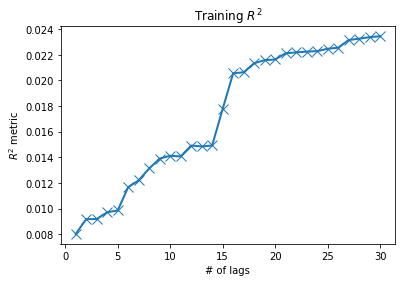

In [ ]:
# For One Day Return

from sklearn import linear_model
lin_reg=linear_model.LinearRegression()
max_lags=30
r2_scores=np.zeros([max_lags])

for n_lag in range(1,max_lags+1):
    # Construct our new 'X' matrix
    n_max=len(One_Day_return)
    One_Day_return_lagged=np.zeros([n_max-n_lag,n_lag])
    for i in range(0,n_max-n_lag):
        One_Day_return_lagged[i]=One_Day_return[i:i+n_lag]
    y=One_Day_return[n_lag:]
    lin_reg.fit(One_Day_return_lagged,y)
    score=lin_reg.score(One_Day_return_lagged,y)
    r2_scores[n_lag-1]=score

fig=plt.figure()
plt.plot(range(1,max_lags+1),r2_scores,'x-',lw=2,ms=10, label='v1')
plt.xlabel('# of lags')
plt.ylabel('$R^2$ metric')
plt.title('Training $R^2$')
plt.show()

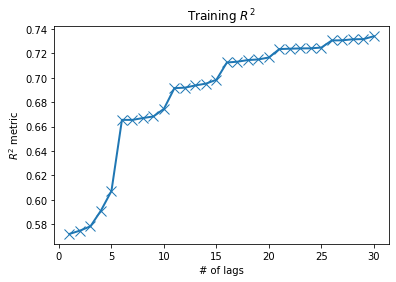

In [ ]:
# For Five Day Return

from sklearn import linear_model
lin_reg=linear_model.LinearRegression()
max_lags=30
r2_scores=np.zeros([max_lags])

for n_lag in range(1,max_lags+1):
    # Construct our new 'X' matrix
    n_max=len(Five_Day_return)
    Five_Day_return_lagged=np.zeros([n_max-n_lag,n_lag])
    for i in range(0,n_max-n_lag):
        Five_Day_return_lagged[i]=Five_Day_return[i:i+n_lag]
    y=Five_Day_return[n_lag:]
    lin_reg.fit(Five_Day_return_lagged,y)
    score=lin_reg.score(Five_Day_return_lagged,y)
    r2_scores[n_lag-1]=score

fig=plt.figure()
plt.plot(range(1,max_lags+1),r2_scores,'x-',lw=2,ms=10, label='v1')
plt.xlabel('# of lags')
plt.ylabel('$R^2$ metric')
plt.title('Training $R^2$')
plt.show()

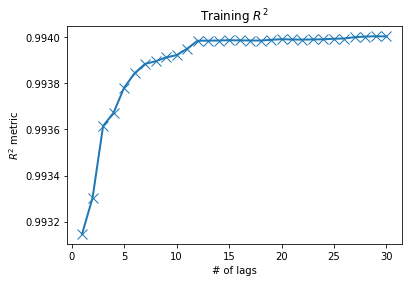

In [ ]:
# For One Day HV

from sklearn import linear_model
lin_reg=linear_model.LinearRegression()
max_lags=30
r2_scores=np.zeros([max_lags])

for n_lag in range(1,max_lags+1):
    # Construct our new 'X' matrix
    n_max=len(One_Day_HV)
    One_Day_HV_lagged=np.zeros([n_max-n_lag,n_lag])
    for i in range(0,n_max-n_lag):
        One_Day_HV_lagged[i]=One_Day_HV[i:i+n_lag]
    y=One_Day_HV[n_lag:]
    lin_reg.fit(One_Day_HV_lagged,y)
    score=lin_reg.score(One_Day_HV_lagged,y)
    r2_scores[n_lag-1]=score

fig=plt.figure()
plt.plot(range(1,max_lags+1),r2_scores,'x-',lw=2,ms=10, label='v1')
plt.xlabel('# of lags')
plt.ylabel('$R^2$ metric')
plt.title('Training $R^2$')
plt.show()

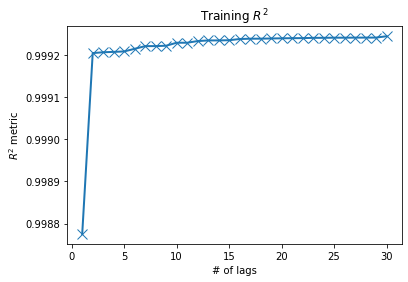

In [ ]:
# For Five Day HV

from sklearn import linear_model
lin_reg=linear_model.LinearRegression()
max_lags=30
r2_scores=np.zeros([max_lags])

for n_lag in range(1,max_lags+1):
    # Construct our new 'X' matrix
    n_max=len(Five_Day_HV)
    Five_Day_HV_lagged=np.zeros([n_max-n_lag,n_lag])
    for i in range(0,n_max-n_lag):
        Five_Day_HV_lagged[i]=Five_Day_HV[i:i+n_lag]
    y=Five_Day_HV[n_lag:]
    lin_reg.fit(Five_Day_HV_lagged,y)
    score=lin_reg.score(Five_Day_HV_lagged,y)
    r2_scores[n_lag-1]=score

fig=plt.figure()
plt.plot(range(1,max_lags+1),r2_scores,'x-',lw=2,ms=10, label='v1')
plt.xlabel('# of lags')
plt.ylabel('$R^2$ metric')
plt.title('Training $R^2$')
plt.show()

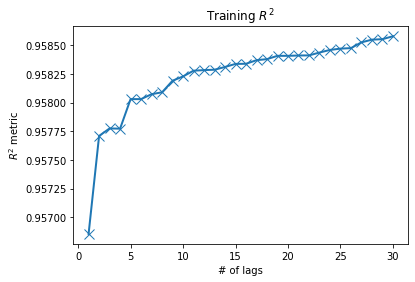

In [ ]:
# For VIX

from sklearn import linear_model
lin_reg=linear_model.LinearRegression()
max_lags=30
r2_scores=np.zeros([max_lags])

for n_lag in range(1,max_lags+1):
    # Construct our new 'X' matrix
    n_max=len(VIX_Close)
    VIX_Close_lagged=np.zeros([n_max-n_lag,n_lag])
    for i in range(0,n_max-n_lag):
        VIX_Close_lagged[i]=VIX_Close[i:i+n_lag]
    y=VIX_Close[n_lag:]
    lin_reg.fit(VIX_Close_lagged,y)
    score=lin_reg.score(VIX_Close_lagged,y)
    r2_scores[n_lag-1]=score

fig=plt.figure()
plt.plot(range(1,max_lags+1),r2_scores,'x-',lw=2,ms=10, label='v1')
plt.xlabel('# of lags')
plt.ylabel('$R^2$ metric')
plt.title('Training $R^2$')
plt.show()

In [ ]:
#Outputs
output_time_series_one_day_returns = One_Day_return[30:]
output_time_series_five_day_returns = Five_Day_return[30:]
output_time_series_one_day_vol = One_Day_HV[30:]
output_time_series_five_day_vol = Five_Day_HV[30:]
output_VIX_close = VIX_Close[30:]

print(output_time_series_one_day_returns)
print(output_time_series_five_day_returns)
print(output_VIX_close)
print(output_time_series_one_day_returns.shape)
print(One_Day_return_lagged.shape)

[ 1.1312724  -1.47303134 -0.51708633 ... -0.30598608  0.45404033
 -0.36360944]
[-2.24122997 -1.61468702 -2.31788079 ... -0.11401662 -0.62232088
 -0.13413616]
[22.92000008 23.51000023 23.17000008 ... 23.93000031 23.12000084
 22.36000061]
(5730,)
(5730, 30)


## Use of Time Series and KNN Regressor

In [ ]:
from sklearn import neighbors
from sklearn import metrics

In [ ]:
n_folds =5 
KFoldTimeSeries=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=42)

### Usage of Time Series and KNN Regressor for One Day Returns

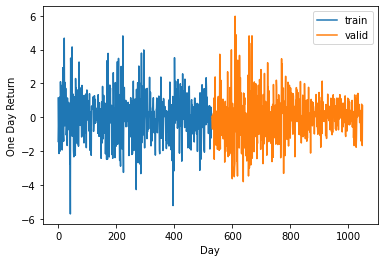

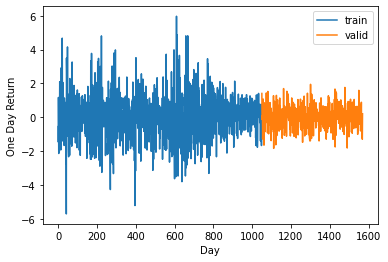

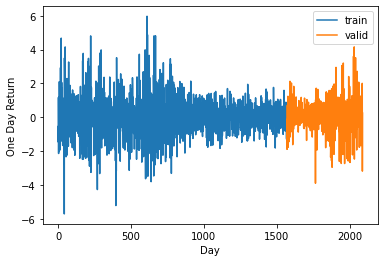

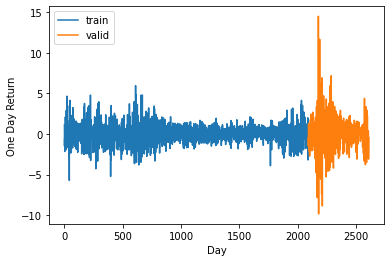

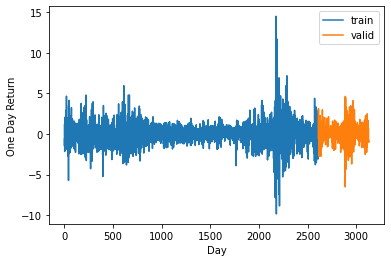

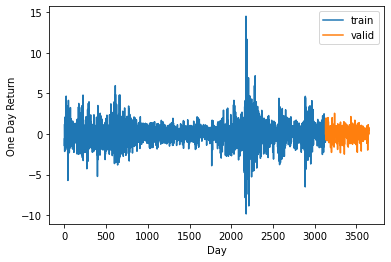

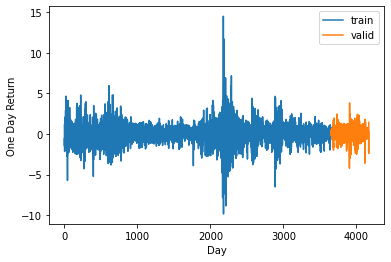

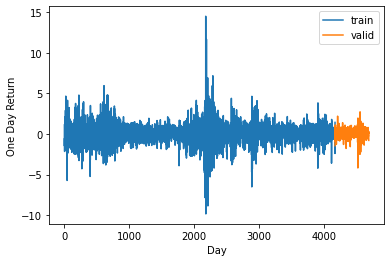

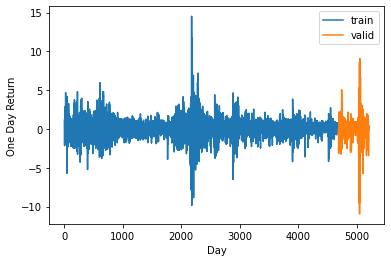

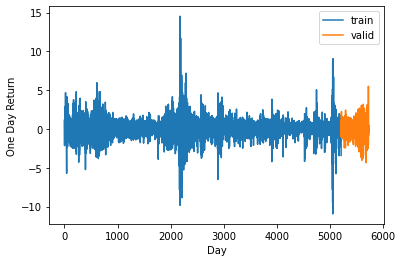

In [ ]:
# One Day Returns
Time_series_model_one_day_returns_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_one_day_returns_v1.split(One_Day_return_lagged, output_time_series_one_day_returns):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('One Day Return')
  plt.legend()
  plt.show()
  i+=1

Average MSE of 2.26842821377015 with a standard error of 0.7081216139483503 for 1 neighbors
Average MSE of 1.9160521765086713 with a standard error of 0.6327856816792757 for 2 neighbors
Average MSE of 1.7811691312660727 with a standard error of 0.6008628152342191 for 3 neighbors
Average MSE of 1.720805731447161 with a standard error of 0.5901314644615638 for 4 neighbors
Average MSE of 1.6841602828948588 with a standard error of 0.5895792197504239 for 5 neighbors
Average MSE of 1.6526690300331972 with a standard error of 0.5765982585481201 for 6 neighbors
Average MSE of 1.629173689200305 with a standard error of 0.5705459229089528 for 7 neighbors
Average MSE of 1.6122021276777818 with a standard error of 0.5667717211276595 for 8 neighbors
Average MSE of 1.596260327557926 with a standard error of 0.5628324672217851 for 9 neighbors
Average MSE of 1.5858049544265012 with a standard error of 0.5622570627728805 for 10 neighbors
Average MSE of 1.5832655186785067 with a standard error of 0.563

Text(0, 0.5, 'Mean MSE')

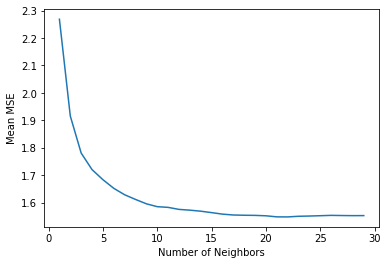

In [ ]:
normalizer = preprocessing.StandardScaler()
n_neighbors = np.arange(1,30)
mse_tot = []
for n in n_neighbors:
  knn = neighbors.KNeighborsRegressor(n_neighbors=n)
  pipe_time_series_model_one_day_returns_v1 = pipeline.Pipeline([('norm', normalizer), ('knn', knn)])


  Time_series_model_one_day_returns_v1=model_selection.TimeSeriesSplit(n_splits=10)
  mse=[]
  for train_ndx,valid_ndx in Time_series_model_one_day_returns_v1.split(One_Day_return_lagged, output_time_series_one_day_returns):
    valid_ndx_adjusted=valid_ndx
    pipe_time_series_model_one_day_returns_v1.fit(One_Day_return_lagged[train_ndx],output_time_series_one_day_returns[train_ndx])
    score_mse=(metrics.mean_squared_error\
          (output_time_series_one_day_returns[valid_ndx_adjusted],pipe_time_series_model_one_day_returns_v1.predict(One_Day_return_lagged[valid_ndx_adjusted])))
    #print(score_mse)
    mse.append(score_mse)
  print('Average MSE of {0} with a standard error of {1} for {2} neighbors'.format(np.mean(mse),np.std(mse)/np.sqrt(KFoldTimeSeries.n_splits), n))
  mse_tot.append(np.mean(mse))

plt.figure()
plt.plot(n_neighbors, mse_tot)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MSE')

In [ ]:
# For reference, these are the average and stdev for the One Day Returns
print(np.average(output_time_series_one_day_returns))
print(np.std(output_time_series_one_day_returns))

0.025955927342911793
1.2490640525293601


We notice that a time series method with K Nearest Neighbors and 22 neighbors yields the optimal average MSE of 1.549 with a standard error of 0.565.

### Usage of Time Series and KNN Regressor for Five Day Returns

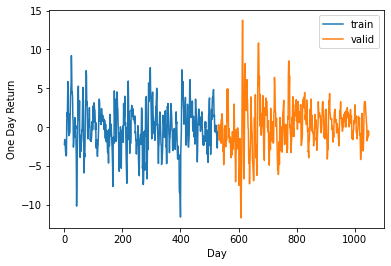

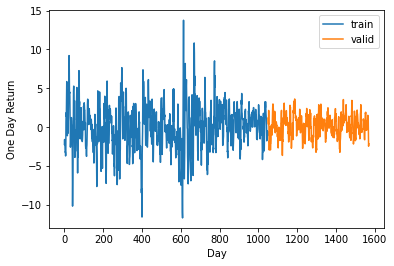

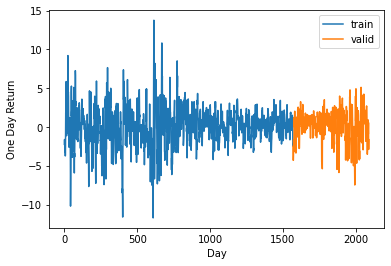

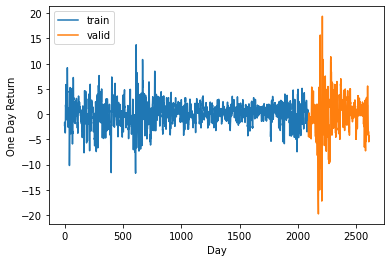

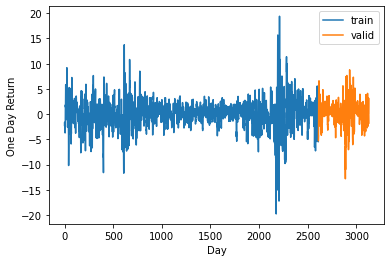

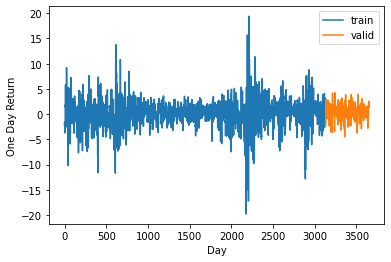

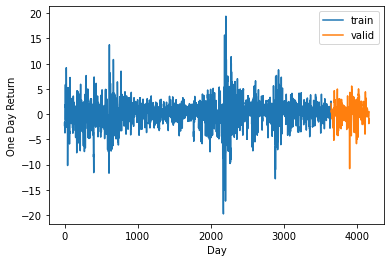

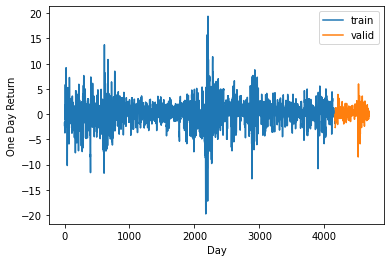

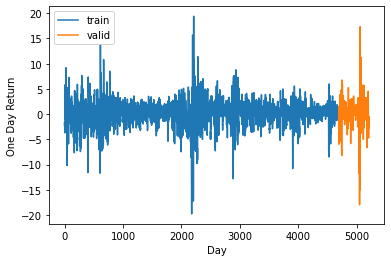

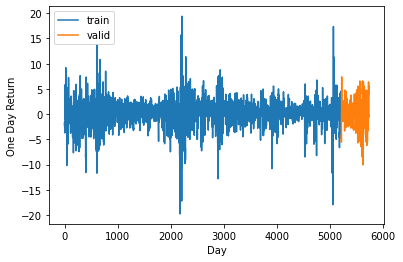

In [ ]:
# Five Day Returns
Time_series_model_five_day_returns_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_five_day_returns_v1.split(Five_Day_return_lagged, output_time_series_five_day_returns):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_five_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_five_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('One Day Return')
  plt.legend()
  plt.show()
  i+=1

Average MSE of 6.2902143237901065 with a standard error of 1.6255871505895034 for 1 neighbors
Average MSE of 5.02692643341077 with a standard error of 1.4099558348823833 for 2 neighbors
Average MSE of 4.666969297386846 with a standard error of 1.3648737092199408 for 3 neighbors
Average MSE of 4.415680811381319 with a standard error of 1.336152395457407 for 4 neighbors
Average MSE of 4.306436100091927 with a standard error of 1.332090080578114 for 5 neighbors
Average MSE of 4.263925395275341 with a standard error of 1.3325071383442115 for 6 neighbors
Average MSE of 4.224287151375222 with a standard error of 1.3193052342616876 for 7 neighbors
Average MSE of 4.208503098382023 with a standard error of 1.3252325096735362 for 8 neighbors
Average MSE of 4.1946574442355935 with a standard error of 1.3237829398375427 for 9 neighbors
Average MSE of 4.1892320128037355 with a standard error of 1.334706357969948 for 10 neighbors
Average MSE of 4.176121093557744 with a standard error of 1.3322963315

Text(0, 0.5, 'Mean MSE')

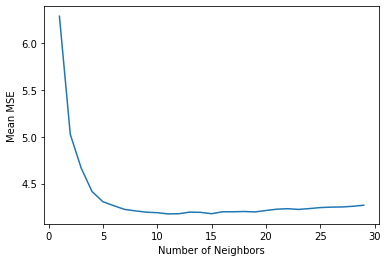

In [ ]:
normalizer = preprocessing.StandardScaler()
n_neighbors = np.arange(1,30)
mse_tot = []
for n in n_neighbors:
  knn = neighbors.KNeighborsRegressor(n_neighbors=n)
  pipe_time_series_model_five_day_returns_v1 = pipeline.Pipeline([('norm', normalizer), ('knn', knn)])


  Time_series_model_five_day_returns_v1=model_selection.TimeSeriesSplit(n_splits=10)
  mse=[]
  for train_ndx,valid_ndx in Time_series_model_five_day_returns_v1.split(Five_Day_return_lagged, output_time_series_five_day_returns):
    valid_ndx_adjusted=valid_ndx
    pipe_time_series_model_five_day_returns_v1.fit(Five_Day_return_lagged[train_ndx],output_time_series_five_day_returns[train_ndx])
    score_mse=(metrics.mean_squared_error\
          (output_time_series_five_day_returns[valid_ndx_adjusted],pipe_time_series_model_five_day_returns_v1.predict(Five_Day_return_lagged[valid_ndx_adjusted])))
    #print(score_mse)
    mse.append(score_mse)
  print('Average MSE of {0} with a standard error of {1} for {2} neighbors'.format(np.mean(mse),np.std(mse)/np.sqrt(KFoldTimeSeries.n_splits), n))
  mse_tot.append(np.mean(mse))

plt.figure()
plt.plot(n_neighbors, mse_tot)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MSE')

In [ ]:
#For reference, these are the average and std for the One Day Returns
print(np.average(output_time_series_five_day_returns))
print(np.std(output_time_series_five_day_returns))

0.12244750708746899
2.5304317432975156


We notice that a time series method with K Nearest Neighbors and 15 neighbors yields the optimal average MSE of 4.18 with a standard error of 1.33. 

### Usage of Time Series and KNN Regressor for One Day HV

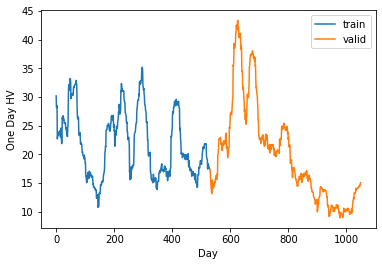

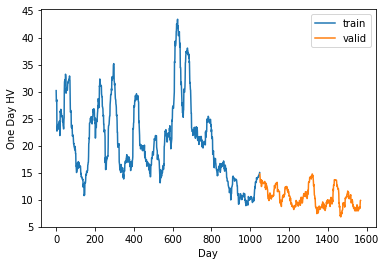

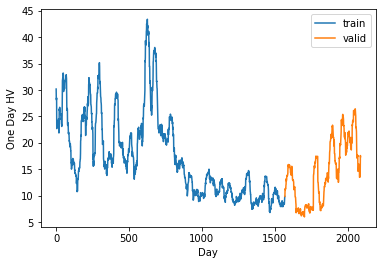

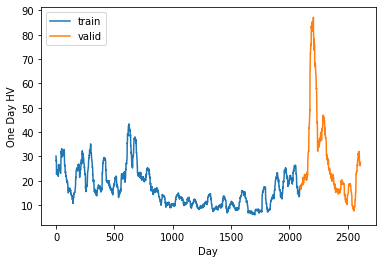

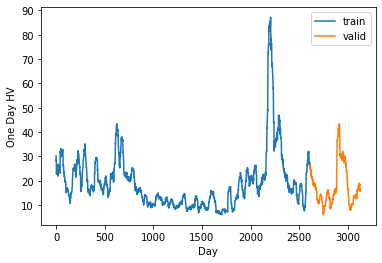

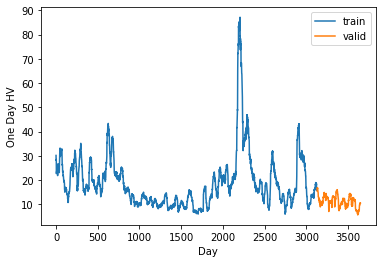

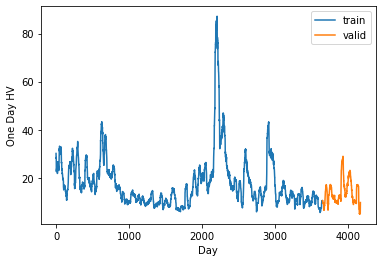

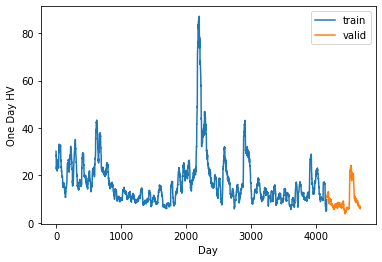

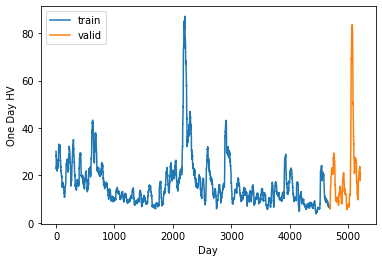

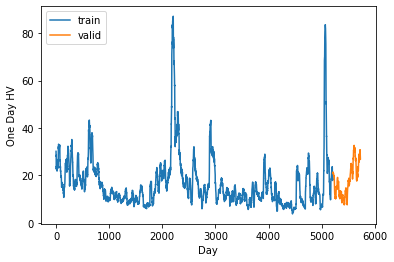

In [ ]:
# One Day HV 
Time_series_model_one_day_vol_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_one_day_vol_v1.split(One_Day_HV_lagged, output_time_series_one_day_vol):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_vol[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_vol[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('One Day HV')
  plt.legend()
  plt.show()
  i+=1

Average MSE of 25.711387545164673 with a standard error of 24.161211467278378 for 1 neighbors
Average MSE of 24.552673778721577 with a standard error of 23.405134883081175 for 2 neighbors
Average MSE of 23.960903601706733 with a standard error of 23.173587951791827 for 3 neighbors
Average MSE of 23.81609376625213 with a standard error of 23.249337548398152 for 4 neighbors
Average MSE of 23.630318823973376 with a standard error of 23.175487597574122 for 5 neighbors
Average MSE of 23.570208779610063 with a standard error of 23.21565847876799 for 6 neighbors
Average MSE of 23.425841391979674 with a standard error of 23.1986788217036 for 7 neighbors
Average MSE of 23.39958197935315 with a standard error of 23.186150646008805 for 8 neighbors
Average MSE of 23.43424906509293 with a standard error of 23.28916697929073 for 9 neighbors
Average MSE of 23.451094543035932 with a standard error of 23.32344453634838 for 10 neighbors
Average MSE of 23.47294994685795 with a standard error of 23.324506

Text(0, 0.5, 'Mean MSE')

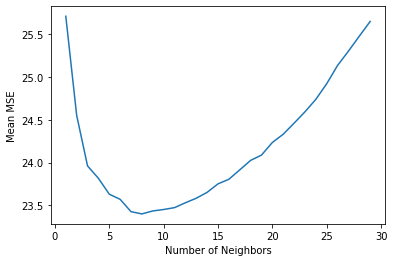

In [ ]:
normalizer = preprocessing.StandardScaler()
n_neighbors = np.arange(1,30)
mse_tot=[]
for n in n_neighbors:
  knn = neighbors.KNeighborsRegressor(n_neighbors=n)
  pipe_time_series_model_one_day_vol_v1 = pipeline.Pipeline([('norm', normalizer), ('knn', knn)])


  Time_series_model_one_day_vol_v1=model_selection.TimeSeriesSplit(n_splits=10)
  mse=[]
  for train_ndx,valid_ndx in Time_series_model_one_day_vol_v1.split(One_Day_HV_lagged, output_time_series_one_day_vol):
    valid_ndx_adjusted=valid_ndx
    pipe_time_series_model_one_day_vol_v1.fit(One_Day_HV_lagged[train_ndx],output_time_series_one_day_vol[train_ndx])
    score_mse=(metrics.mean_squared_error\
          (output_time_series_one_day_vol[valid_ndx_adjusted],pipe_time_series_model_one_day_vol_v1.predict(One_Day_HV_lagged[valid_ndx_adjusted])))
    #print(score_mse)
    mse.append(score_mse)
  print('Average MSE of {0} with a standard error of {1} for {2} neighbors'.format(np.mean(mse),np.std(mse)/np.sqrt(KFoldTimeSeries.n_splits), n))
  mse_tot.append(np.mean(mse))

plt.figure()
plt.plot(n_neighbors, mse_tot)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MSE')

In [ ]:
# For reference, here are the average and stdev of the One Day HV
print(np.average(output_time_series_one_day_vol))
print(np.std(output_time_series_one_day_vol))

16.98506666975188
10.728979330053686


We notice that a time series method with K Nearest Neighbors and 8 neighbors yields the optimal average MSE of 23.40 with a standard error of 23.19. 

### Usage of Time Series and KNN Regressor for Five Day HV

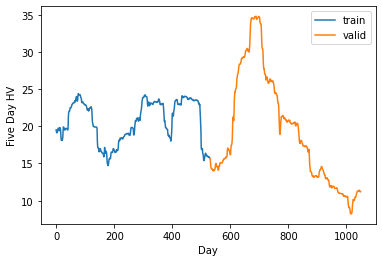

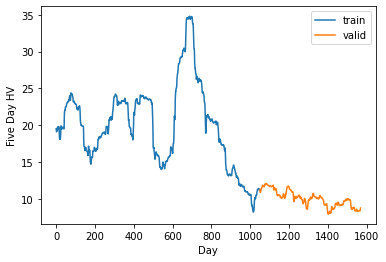

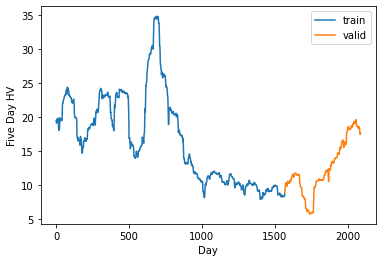

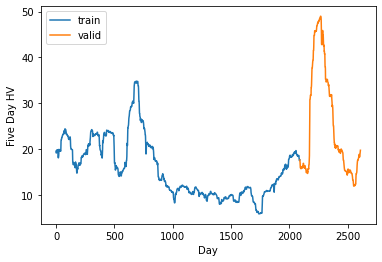

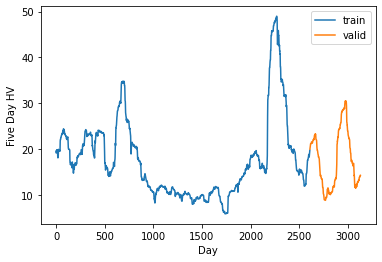

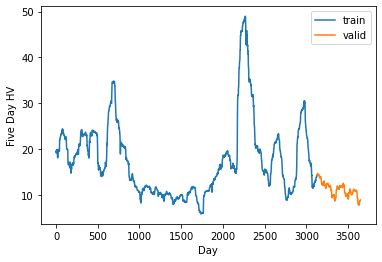

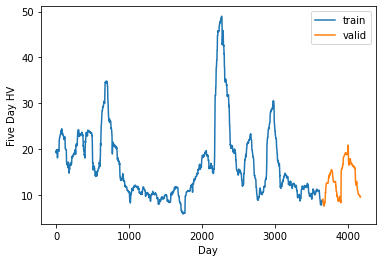

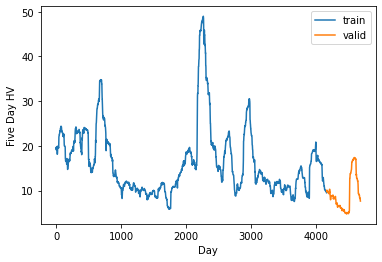

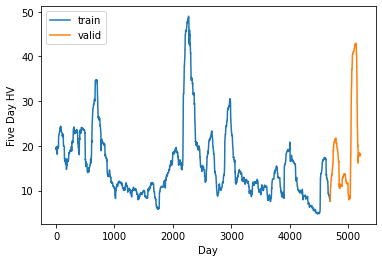

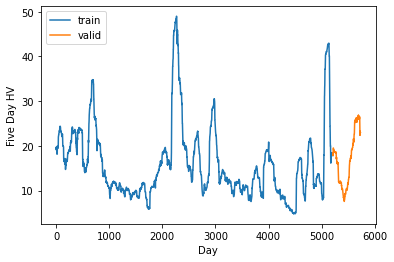

In [ ]:
# Five Day HV
Time_series_model_five_day_vol_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_five_day_vol_v1.split(Five_Day_HV_lagged, output_time_series_five_day_vol):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_five_day_vol[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_five_day_vol[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('Five Day HV')
  plt.legend()
  plt.show()
  i+=1

Average MSE of 6.703144311594649 with a standard error of 4.524625214033968 for 1 neighbors
Average MSE of 6.660675386459873 with a standard error of 4.562125733746716 for 2 neighbors
Average MSE of 6.515872546935128 with a standard error of 4.50969528637173 for 3 neighbors
Average MSE of 6.478027898255071 with a standard error of 4.5156148723310565 for 4 neighbors
Average MSE of 6.415787488250477 with a standard error of 4.496805939466864 for 5 neighbors
Average MSE of 6.409335177809062 with a standard error of 4.513430152984425 for 6 neighbors
Average MSE of 6.407130959348517 with a standard error of 4.5223151116666624 for 7 neighbors
Average MSE of 6.388890043639995 with a standard error of 4.5249226338945645 for 8 neighbors
Average MSE of 6.413588722846397 with a standard error of 4.565506971338022 for 9 neighbors
Average MSE of 6.442171623753865 with a standard error of 4.613410964427097 for 10 neighbors
Average MSE of 6.452608697435447 with a standard error of 4.638530205690798 f

Text(0, 0.5, 'Mean MSE')

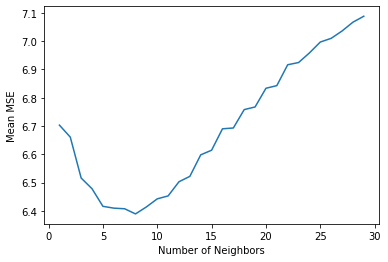

In [ ]:
normalizer = preprocessing.StandardScaler()
n_neighbors = np.arange(1,30)
mse_tot=[]
for n in n_neighbors:
  knn = neighbors.KNeighborsRegressor(n_neighbors=n)
  pipe_time_series_model_five_day_vol_v1 = pipeline.Pipeline([('norm', normalizer), ('knn', knn)])


  Time_series_model_five_day_vol_v1=model_selection.TimeSeriesSplit(n_splits=10)
  mse=[]
  for train_ndx,valid_ndx in Time_series_model_five_day_vol_v1.split(Five_Day_HV_lagged, output_time_series_five_day_vol):
    valid_ndx_adjusted=valid_ndx
    pipe_time_series_model_five_day_vol_v1.fit(Five_Day_HV_lagged[train_ndx],output_time_series_five_day_vol[train_ndx])
    score_mse=(metrics.mean_squared_error\
          (output_time_series_five_day_vol[valid_ndx_adjusted],pipe_time_series_model_five_day_vol_v1.predict(Five_Day_HV_lagged[valid_ndx_adjusted])))
    #print(score_mse)
    mse.append(score_mse)
  print('Average MSE of {0} with a standard error of {1} for {2} neighbors'.format(np.mean(mse),np.std(mse)/np.sqrt(KFoldTimeSeries.n_splits), n))
  mse_tot.append(np.mean(mse))

plt.figure()
plt.plot(n_neighbors, mse_tot)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MSE')

In [ ]:
# For reference, here are the average and stdev of the Five Day HV
print(np.average(output_time_series_five_day_vol))
print(np.std(output_time_series_five_day_vol))

16.049680612381533
8.01493885597388


We notice that a time series method with K Nearest Neighbors and 8 neighbors yields the optimal average MSE of 6.39 with a standard error of 4.52. 

### Usage of Time Series and KNN Regressor for VIX Close 

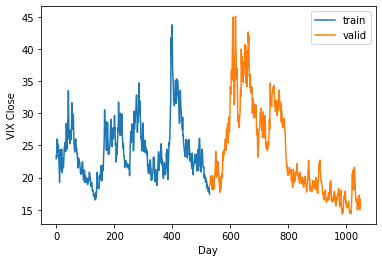

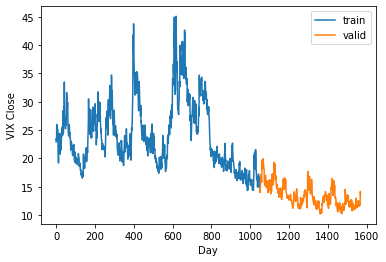

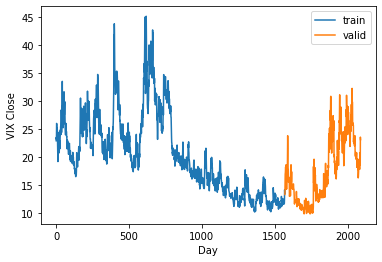

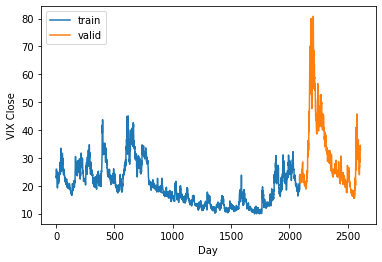

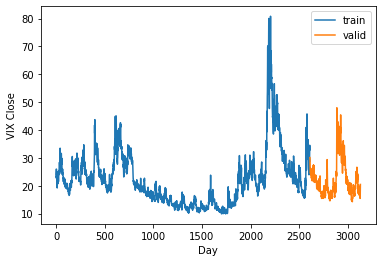

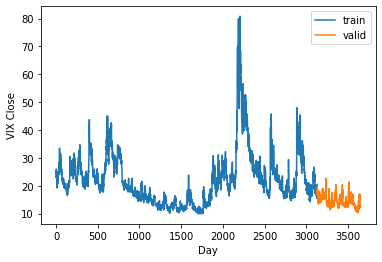

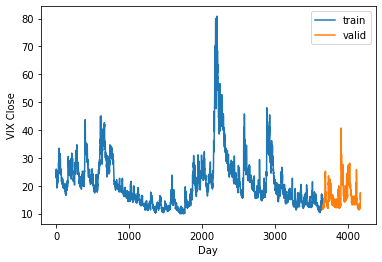

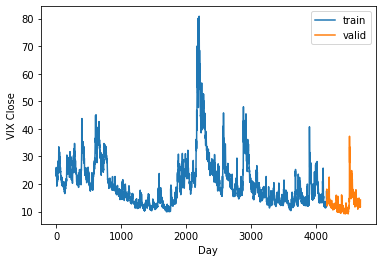

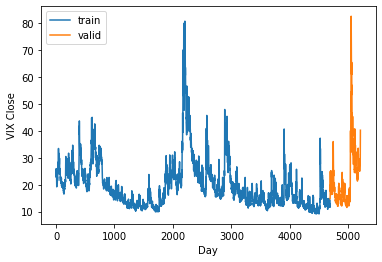

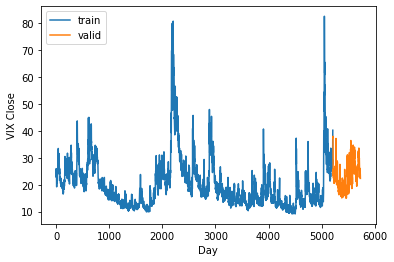

In [ ]:
# VIX Close
Time_series_model_VIX_close_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_VIX_close_v1.split(VIX_Close_lagged, output_VIX_close):
  fig = plt.figure()
  plt.plot(train_ndx, output_VIX_close[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_VIX_close[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('VIX Close')
  plt.legend()
  plt.show()
  i+=1

Average MSE of 20.352060552562545 with a standard error of 13.125243752326694 for 1 neighbors
Average MSE of 18.34858262824816 with a standard error of 12.4632015146173 for 2 neighbors
Average MSE of 17.59162837708551 with a standard error of 12.381527465955184 for 3 neighbors
Average MSE of 17.044075453267244 with a standard error of 12.25503309491108 for 4 neighbors
Average MSE of 16.864851087936447 with a standard error of 12.219073546456553 for 5 neighbors
Average MSE of 16.763046602081833 with a standard error of 12.228260905645962 for 6 neighbors
Average MSE of 16.649480792115526 with a standard error of 12.164549052308832 for 7 neighbors
Average MSE of 16.764135611108387 with a standard error of 12.262674703430893 for 8 neighbors
Average MSE of 16.73217387843981 with a standard error of 12.224607475464662 for 9 neighbors
Average MSE of 16.91080728091476 with a standard error of 12.261871459323737 for 10 neighbors
Average MSE of 17.01025334236067 with a standard error of 12.30212

Text(0, 0.5, 'Mean MSE')

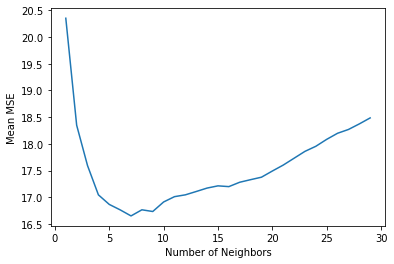

In [ ]:
normalizer = preprocessing.StandardScaler()
n_neighbors = np.arange(1,30)
mse_tot=[]
for n in n_neighbors:
  knn = neighbors.KNeighborsRegressor(n_neighbors=n)
  pipe_time_series_model_VIX_close_v1 = pipeline.Pipeline([('norm', normalizer), ('knn', knn)])


  Time_series_model_VIX_close_v1=model_selection.TimeSeriesSplit(n_splits=10)
  mse=[]
  for train_ndx,valid_ndx in Time_series_model_VIX_close_v1.split(VIX_Close_lagged, output_VIX_close):
    valid_ndx_adjusted=valid_ndx
    pipe_time_series_model_VIX_close_v1.fit(VIX_Close_lagged[train_ndx],output_VIX_close[train_ndx])
    score_mse=(metrics.mean_squared_error\
          (output_VIX_close[valid_ndx_adjusted],pipe_time_series_model_VIX_close_v1.predict(VIX_Close_lagged[valid_ndx_adjusted])))
    #print(score_mse)
    mse.append(score_mse)
  print('Average MSE of {0} with a standard error of {1} for {2} neighbors'.format(np.mean(mse),np.std(mse)/np.sqrt(KFoldTimeSeries.n_splits), n))
  mse_tot.append(np.mean(mse))

plt.figure()
plt.plot(n_neighbors, mse_tot)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MSE')

In [ ]:
# For reference, here are the average and stdev of the VIX Close
print(np.average(output_VIX_close))
print(np.std(output_VIX_close))

20.16616928539975
8.736188307774839


We notice that a time series method with K Nearest Neighbors and 9 neighbors yields the optimal average MSE of 16.73 with a standard error of 12.22. 

## Use of Time Series and Penalized Regression

In [ ]:
from sklearn import linear_model
n_folds=5
kfoldcv=model_selection.KFold(n_splits=n_folds,shuffle=True,random_state=42)

### Usage of Time Series and Penalized Regression for One Day Returns

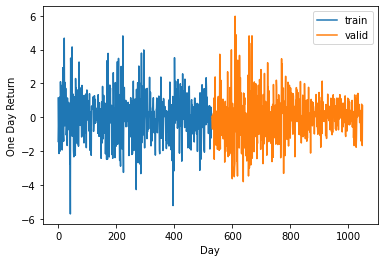

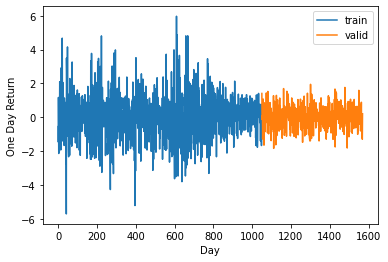

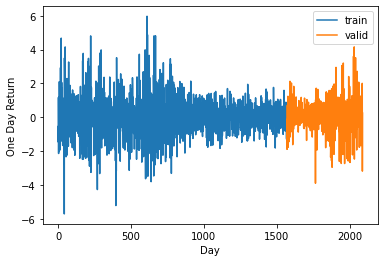

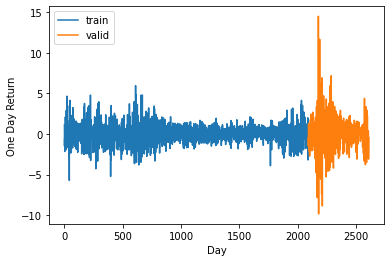

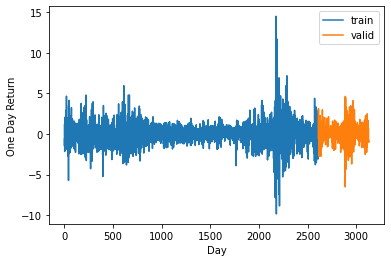

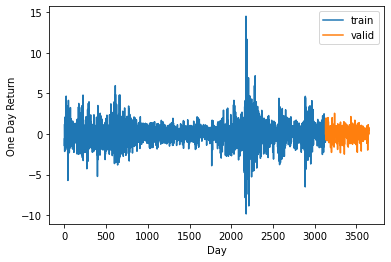

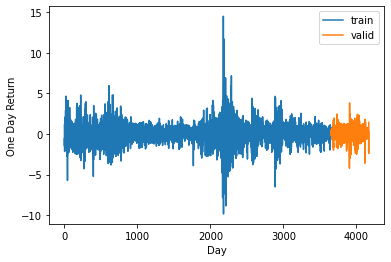

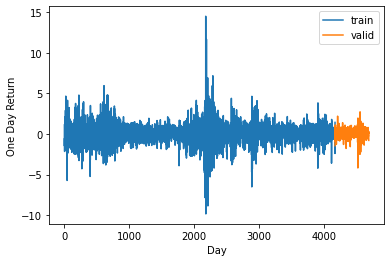

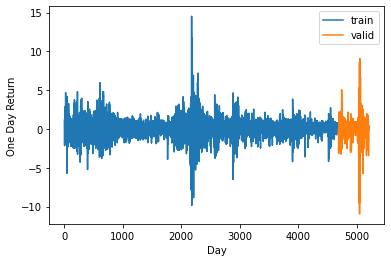

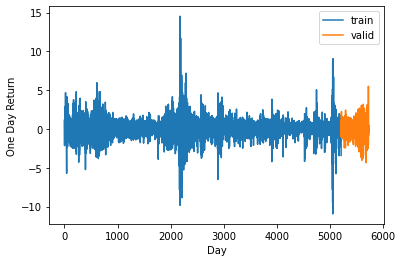

In [ ]:
# One Day Returns

Time_series_model_one_day_returns_penalized_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_one_day_returns_penalized_v1.split(One_Day_return_lagged, output_time_series_one_day_returns):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('One Day Return')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

pipe_penalized_predictor_1_one_day_returns_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_one_day_returns_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
param_grid = {'regressor__alpha':alphas}

#Ridge
Time_series_model_one_day_returns_penalized_1_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_1_one_day_returns_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_one_day_returns_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_one_day_returns_penalized_1_v1, return_train_score=False)
gscv_penalized_predictor_1_one_day_returns_v1.fit(One_Day_return_lagged, output_time_series_one_day_returns)
print(-gscv_penalized_predictor_1_one_day_returns_v1.best_score_)

#Lasso
Time_series_model_one_day_returns_penalized_2_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_2_one_day_returns_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_one_day_returns_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_one_day_returns_penalized_2_v1, return_train_score=False)
gscv_penalized_predictor_2_one_day_returns_v1.fit(One_Day_return_lagged, output_time_series_one_day_returns)
print(-gscv_penalized_predictor_2_one_day_returns_v1.best_score_)

1.5550125811313738
1.5229691779014405


In [ ]:
# For reference, these are the average and stdev for the One Day Returns
print(np.average(output_time_series_one_day_returns))
print(np.std(output_time_series_one_day_returns))

0.025955927342911793
1.2490640525293601


We notice that a time series method with Ridge Regression yielded, at best, an average MSE of 1.555. On the other hand, utilizing Lasso Regression yielded, at best, an average MSE of 1.522.

### Usage of Time Series and Penalized Regression for Five Day Returns

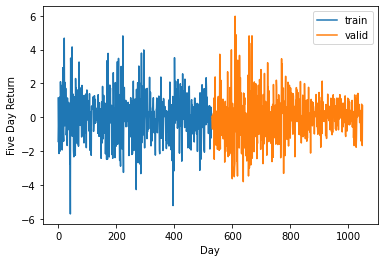

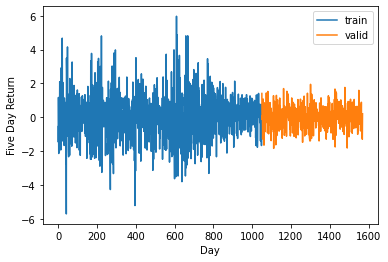

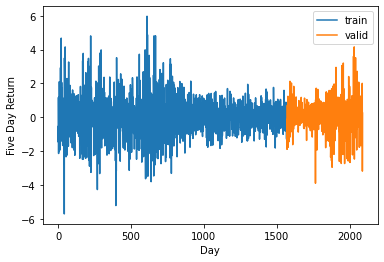

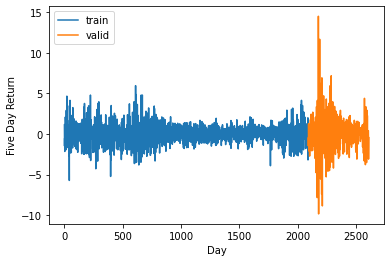

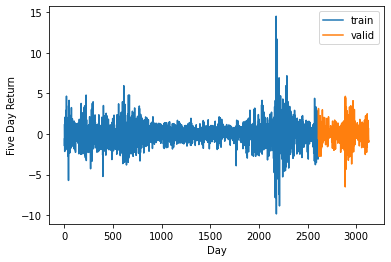

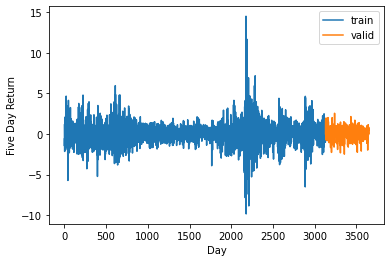

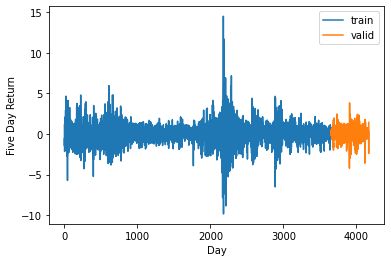

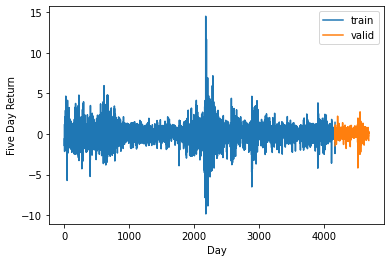

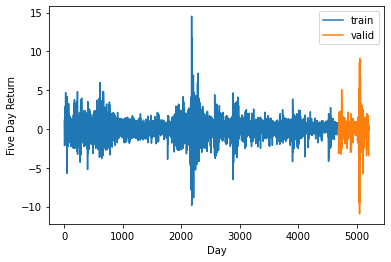

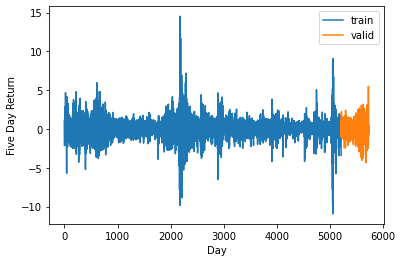

In [ ]:
# Five Day Returns

Time_series_model_five_day_returns_penalized_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_five_day_returns_penalized_v1.split(Five_Day_return_lagged, output_time_series_five_day_returns):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('Five Day Return')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

pipe_penalized_predictor_1_five_day_returns_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_five_day_returns_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
param_grid = {'regressor__alpha':alphas}

#Ridge
Time_series_model_five_day_returns_penalized_1_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_1_five_day_returns_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_five_day_returns_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_five_day_returns_penalized_1_v1, return_train_score=False)
gscv_penalized_predictor_1_five_day_returns_v1.fit(Five_Day_return_lagged, output_time_series_five_day_returns)
print(-gscv_penalized_predictor_1_five_day_returns_v1.best_score_)

#Lasso
Time_series_model_five_day_returns_penalized_2_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_2_five_day_returns_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_five_day_returns_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_five_day_returns_penalized_2_v1, return_train_score=False)
gscv_penalized_predictor_2_five_day_returns_v1.fit(Five_Day_return_lagged, output_time_series_five_day_returns)
print(-gscv_penalized_predictor_2_five_day_returns_v1.best_score_)

1.7418164645218313
1.7331808805241244


In [ ]:
#For reference, these are the average and std for the One Day Returns
print(np.average(output_time_series_five_day_returns))
print(np.std(output_time_series_five_day_returns))

0.12244750708746899
2.5304317432975156


We notice that a time series method with Ridge Regression yielded, at best, an average MSE of 1.74. On the other hand, utilizing Lasso Regression yielded, at best, an average MSE of 1.73.

### Usage of Time Series and KNN Regressor for One Day HV

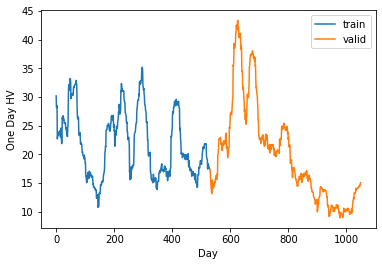

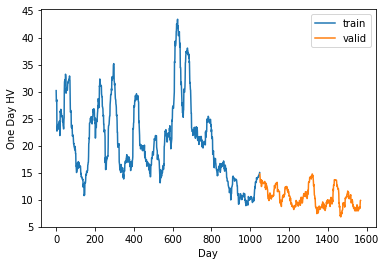

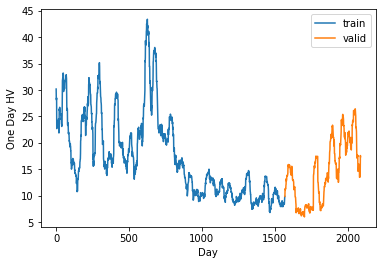

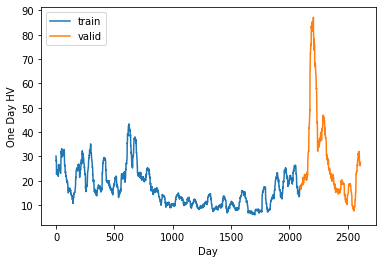

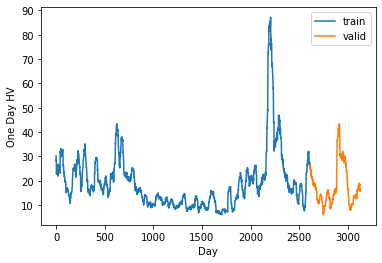

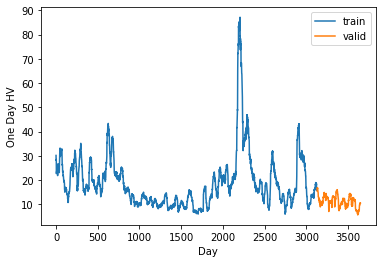

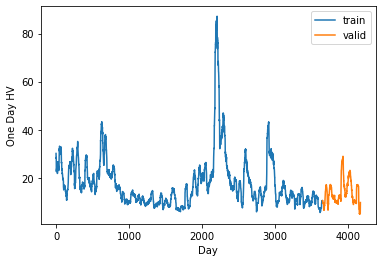

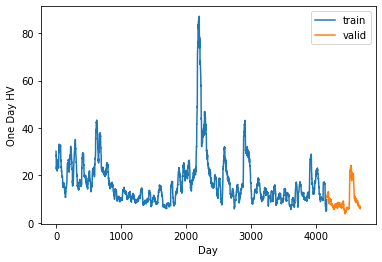

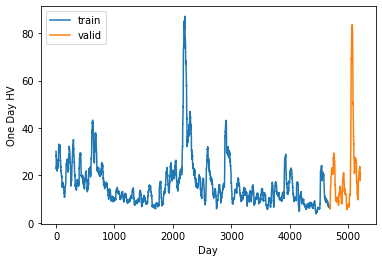

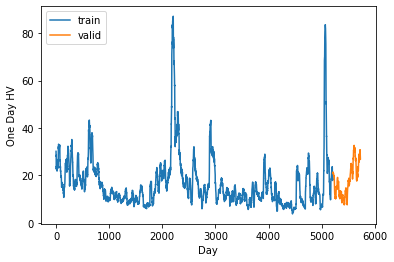

In [ ]:
# One Day HV

Time_series_model_one_day_vol_penalized_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_one_day_vol_penalized_v1.split(One_Day_HV_lagged, output_time_series_one_day_vol):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_vol[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_vol[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('One Day HV')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

pipe_penalized_predictor_1_one_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_one_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
param_grid = {'regressor__alpha':alphas}

#Ridge
Time_series_model_one_day_vol_penalized_1_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_1_one_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_one_day_vol_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_one_day_vol_penalized_1_v1, return_train_score=False)
gscv_penalized_predictor_1_one_day_vol_v1.fit(One_Day_HV_lagged, output_time_series_one_day_vol)
print(-gscv_penalized_predictor_1_one_day_vol_v1.best_score_)

#Lasso
Time_series_model_one_day_vol_penalized_2_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_2_one_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_one_day_vol_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_one_day_vol_penalized_2_v1, return_train_score=False)
gscv_penalized_predictor_2_one_day_vol_v1.fit(One_Day_HV_lagged, output_time_series_one_day_vol)
print(-gscv_penalized_predictor_2_one_day_vol_v1.best_score_)

0.714715209006205


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.326e+01, tolerance: 5.620e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.799e+02, tolerance: 9.543e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.797e+02, tolerance: 1.162e+01

0.7059371562244153


In [ ]:
# For reference, here are the average and stdev of the One Day HV
print(np.average(output_time_series_one_day_vol))
print(np.std(output_time_series_one_day_vol))

16.98506666975188
10.728979330053686


We notice that a time series method with Ridge Regression yielded:, at best, an average MSE of 0.71. On the other hand, utilizing Lasso Regression yielded, at best, an average MSE of 0.705.

### Usage of Time Series and KNN Regressor for Five Day HV

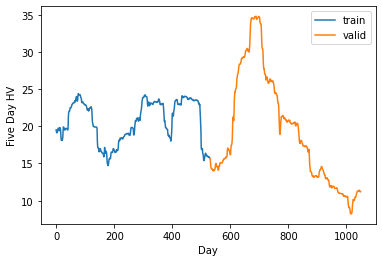

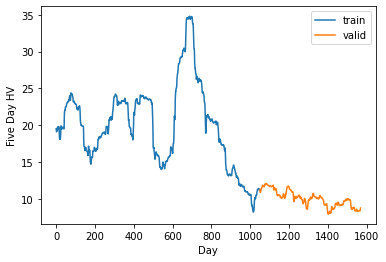

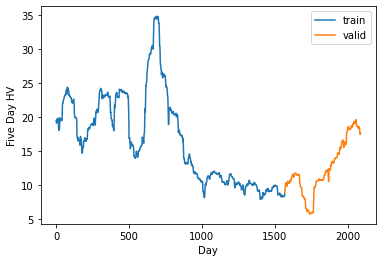

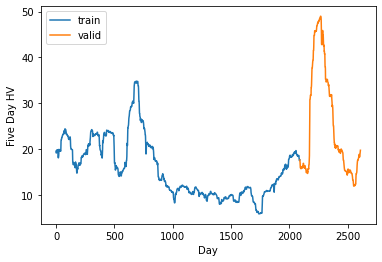

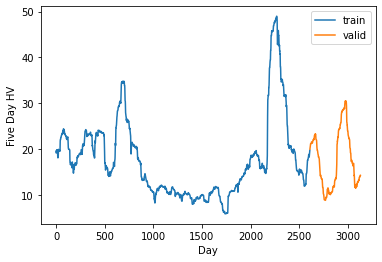

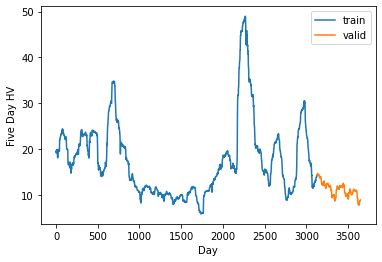

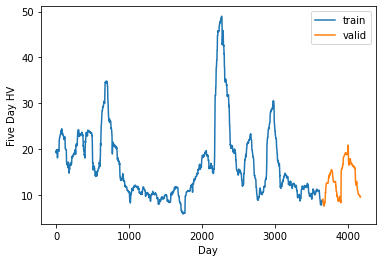

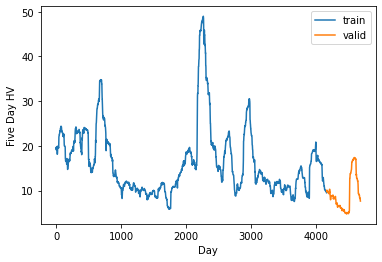

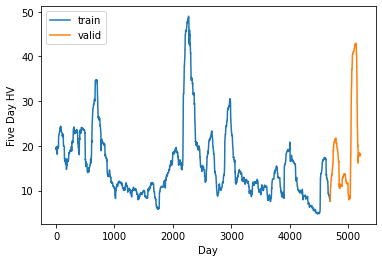

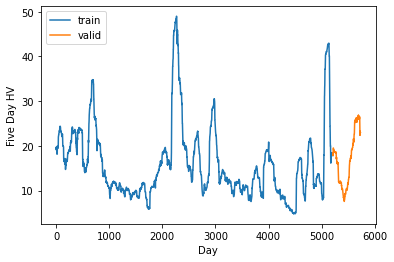

In [ ]:
# Five Day HV 
Time_series_model_five_day_vol_penalized_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_five_day_vol_penalized_v1.split(Five_Day_HV_lagged, output_time_series_five_day_vol):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_five_day_vol[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_five_day_vol[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('Five Day HV')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

pipe_penalized_predictor_1_five_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_five_day_vol_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
param_grid = {'regressor__alpha':alphas}

#Ridge
Time_series_model_five_day_vol_penalized_1_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_1_five_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_five_day_vol_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_five_day_vol_penalized_1_v1, return_train_score=False)
gscv_penalized_predictor_1_five_day_vol_v1.fit(Five_Day_HV_lagged, output_time_series_five_day_vol)
print(-gscv_penalized_predictor_1_five_day_vol_v1.best_score_)

#Lasso
Time_series_model_five_day_vol_penalized_2_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_2_five_day_vol_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_five_day_vol_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                             cv=Time_series_model_five_day_vol_penalized_2_v1, return_train_score=False)
gscv_penalized_predictor_2_five_day_vol_v1.fit(Five_Day_HV_lagged, output_time_series_five_day_vol)
print(-gscv_penalized_predictor_2_five_day_vol_v1.best_score_)

0.05231216236199386


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.939e+00, tolerance: 4.123e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+01, tolerance: 3.340e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.035e+01, tolerance: 6.796e+00

0.06696690275015385


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.218e+01, tolerance: 3.681e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# For reference, here are the average and stdev of the Five Day HV
print(np.average(output_time_series_five_day_vol))
print(np.std(output_time_series_five_day_vol))

16.049680612381533
8.01493885597388


We notice that a time series method with Ridge Regression yielded, at best, an average MSE of 0.052. On the other hand, utilizing Lasso Regression yielded, at best, an average MSE of 0.067.

### Usage of Time Series and KNN Regressor for VIX Close 

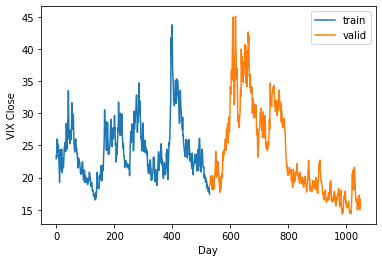

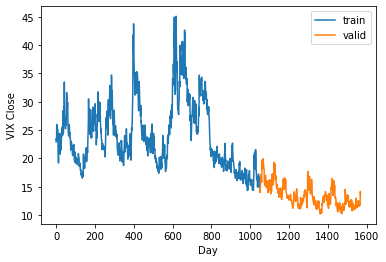

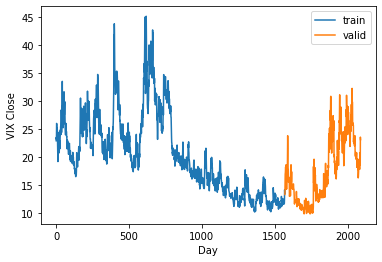

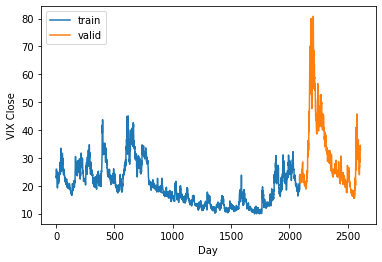

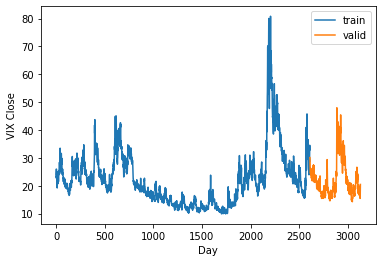

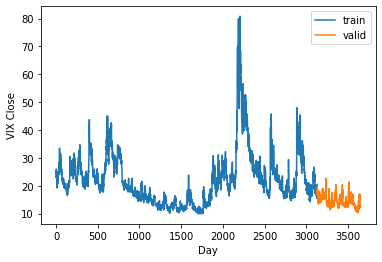

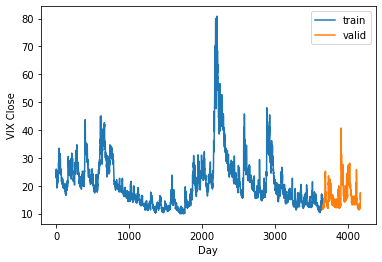

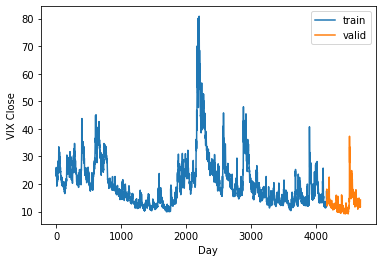

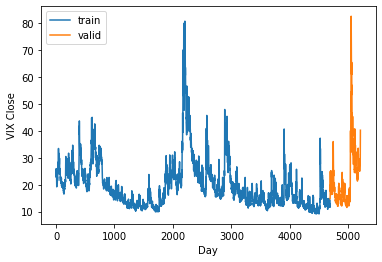

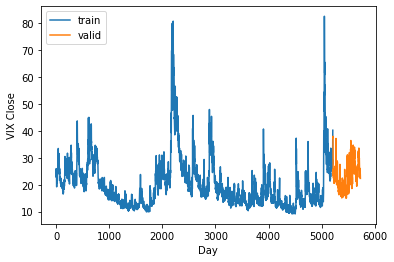

In [ ]:
# VIX Close
Time_series_model_VIX_close_penalized_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_VIX_close_penalized_v1.split(VIX_Close_lagged, output_VIX_close):
  fig = plt.figure()
  plt.plot(train_ndx, output_VIX_close[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_VIX_close[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('VIX Close')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

pipe_penalized_predictor_1_VIX_close_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', ridge)])
pipe_penalized_predictor_2_VIX_close_v1 = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('regressor', lasso)])

n_alphas = 20
alphas = np.logspace(-4, 0, n_alphas)
param_grid = {'regressor__alpha':alphas}

#Ridge
Time_series_model_VIX_close_penalized_1_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_1_VIX_close_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_1_VIX_close_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                       cv=Time_series_model_VIX_close_penalized_1_v1, return_train_score=False)
gscv_penalized_predictor_1_VIX_close_v1.fit(VIX_Close_lagged, output_VIX_close)
print(-gscv_penalized_predictor_1_VIX_close_v1.best_score_)

#Lasso
Time_series_model_VIX_close_penalized_2_v1=model_selection.TimeSeriesSplit(n_splits=10)
gscv_penalized_predictor_2_VIX_close_v1 = model_selection.GridSearchCV(pipe_penalized_predictor_2_VIX_close_v1, param_grid, scoring='neg_mean_squared_error', 
                                                                       cv=Time_series_model_VIX_close_penalized_2_v1, return_train_score=False)
gscv_penalized_predictor_2_VIX_close_v1.fit(VIX_Close_lagged, output_VIX_close)
print(-gscv_penalized_predictor_2_VIX_close_v1.best_score_)

3.4498931365135967
3.3818116639765017


In [ ]:
# For reference, here are the average and stdev of the VIX Close
print(np.average(output_VIX_close))
print(np.std(output_VIX_close))

20.16616928539975
8.736188307774839


We notice that a time series method with Ridge Regression yielded, at best, an average MSE of 3.45. On the other hand, utilizing Lasso Regression yielded, at best, an average MSE of 3.38.

## Use of Time Series and MLP / NN

In [ ]:
from sklearn import neural_network

### Usage of Time Series and MLP / NN for One Day Returns

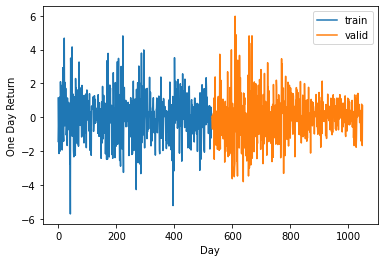

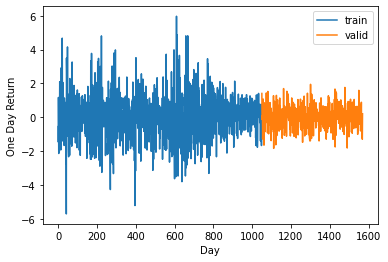

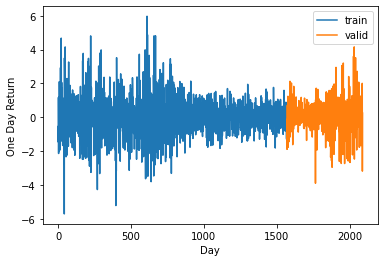

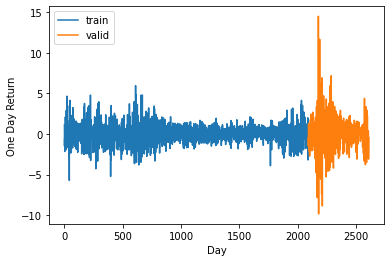

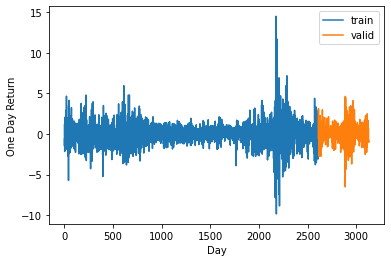

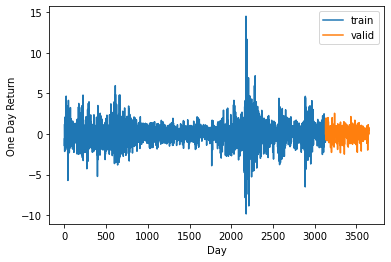

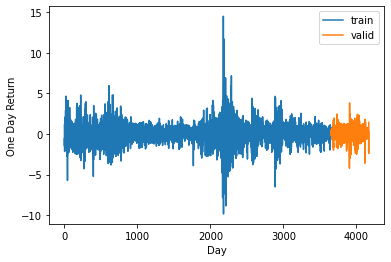

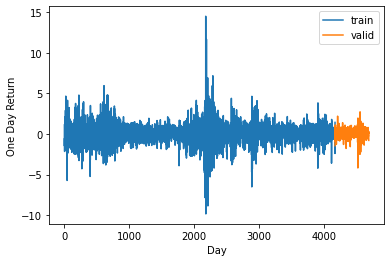

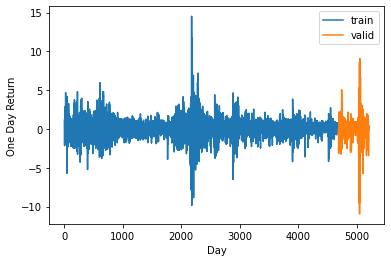

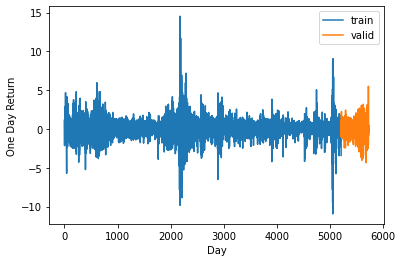

In [ ]:
# One Day Returns

Time_series_model_one_day_returns_nn_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_one_day_returns_nn_v1.split(One_Day_return_lagged, output_time_series_one_day_returns):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('One Day Return')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()

pipe_nn_predictor_one_day_returns = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

Time_series_model_one_day_returns_nn=model_selection.TimeSeriesSplit(n_splits=10)
gscv_nn_pred_one_day_returns = model_selection.GridSearchCV(pipe_nn_predictor_one_day_returns, param_grid, scoring='neg_mean_squared_error', 
                                                            cv=Time_series_model_one_day_returns_nn, return_train_score=False, verbose=10)
gscv_nn_pred_one_day_returns.fit(One_Day_return_lagged, output_time_series_one_day_returns)
print(gscv_nn_pred_one_day_returns.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-3.353 total time=   1.3s
[CV 2/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 2/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.626 total time=   1.9s
[CV 3/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 3/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.313 total time=   3.0s
[CV 4/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 4/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-6.455 total time=   3.1s
[CV 5/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 5/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.848 total time=   2.4s
[CV 6/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 6/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.617 total time=   4.2s
[CV 7/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 7/10; 1/3] END nn_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.213 total time=   6.9s
[CV 3/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 3/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.990 total time=   7.4s
[CV 4/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 4/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-13.054 total time=  11.0s
[CV 5/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 5/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-2.490 total time=  10.1s
[CV 6/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 6/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.847 total time=  11.9s
[CV 7/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 7/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.530 total time=  15.6s
[CV 8/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 8/10; 2/3] END nn

In [ ]:
print(gscv_nn_pred_one_day_returns.best_params_)

{'nn__hidden_layer_sizes': (10,)}


In [ ]:
# For reference, these are the average and stdev for the One Day Returns
print(np.average(output_time_series_one_day_returns))
print(np.std(output_time_series_one_day_returns))

0.025955927342911793
1.2490640525293601


We notice that a time series method with MLP / NN yielded an optimal MSE of 2.20 with 10 hidden layers.

### Usage of Time Series and MLP / NN for Five Day Returns





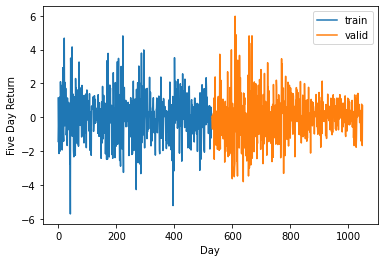

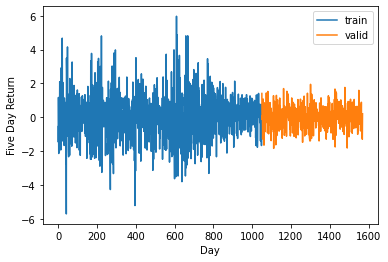

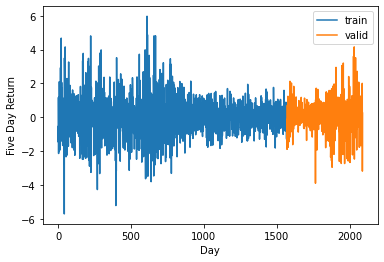

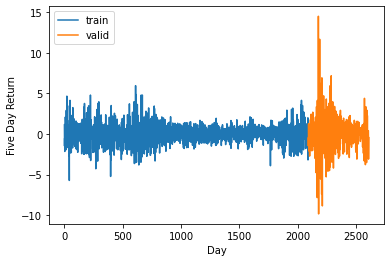

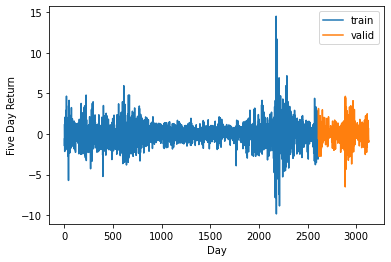

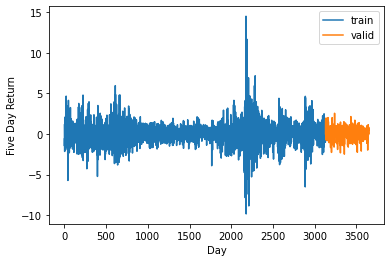

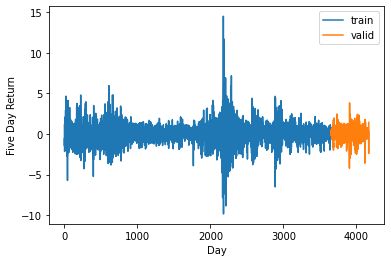

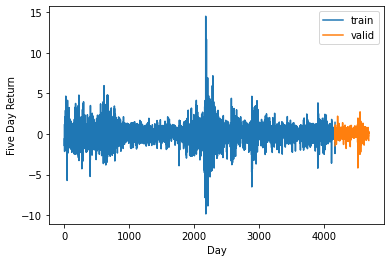

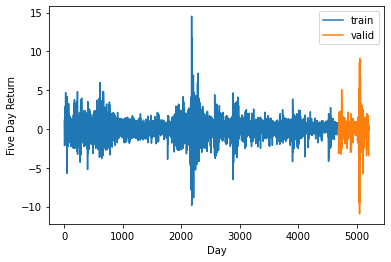

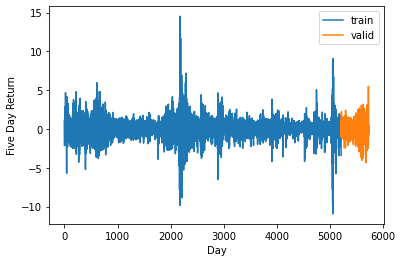

In [ ]:
# Five Day Returns

Time_series_model_five_day_returns_nn_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_five_day_returns_nn_v1.split(Five_Day_return_lagged, output_time_series_five_day_returns):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('Five Day Return')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()

pipe_nn_predictor_five_day_returns = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

Time_series_model_five_day_returns_nn=model_selection.TimeSeriesSplit(n_splits=10)
gscv_nn_pred_five_day_returns = model_selection.GridSearchCV(pipe_nn_predictor_five_day_returns, param_grid, scoring='neg_mean_squared_error', 
                                                            cv=Time_series_model_five_day_returns_nn, return_train_score=False, verbose=10)
gscv_nn_pred_five_day_returns.fit(Five_Day_return_lagged, output_time_series_five_day_returns)
print(-gscv_nn_pred_five_day_returns.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-3.125 total time=   1.3s
[CV 2/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 2/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.880 total time=   2.3s
[CV 3/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 3/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.236 total time=   2.6s
[CV 4/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 4/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-5.846 total time=   2.5s
[CV 5/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 5/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.894 total time=   2.3s
[CV 6/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 6/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.720 total time=   4.2s
[CV 7/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 7/10; 1/3] END nn_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-3.510 total time=   3.3s
[CV 2/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.031 total time=  10.5s
[CV 3/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 3/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.732 total time=  10.7s
[CV 4/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 4/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-8.185 total time=   9.8s
[CV 5/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 5/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-2.323 total time=  11.5s
[CV 6/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 6/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.795 total time=   9.8s
[CV 7/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 7/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.293 total time=   9.9s
[CV 8/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 8/10; 2/3] END nn_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.949 total time=   8.8s
[CV 3/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 3/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-1.752 total time=   9.3s
[CV 4/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 4/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-8.811 total time=  12.3s
[CV 5/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 5/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-2.432 total time=   8.8s
[CV 6/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 6/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.939 total time=  18.8s
[CV 7/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 7/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-1.435 total time=  14.9s
[CV 8/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 8/10; 3/3] E

In [ ]:
#For reference, these are the average and std for the One Day Returns
print(np.average(output_time_series_five_day_returns))
print(np.std(output_time_series_five_day_returns))

0.12244750708746899
2.5304317432975156


In [ ]:
print(gscv_nn_pred_five_day_returns.best_params_)

{'nn__hidden_layer_sizes': (10,)}


We notice that a time series method with MLP / NN yielded, at best, an MSE of 2.06 with 10 hidden layer size.

### Usage of Time Series and MLP / NN for One Day HV



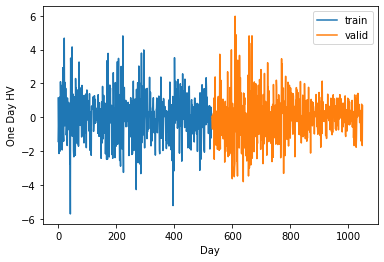

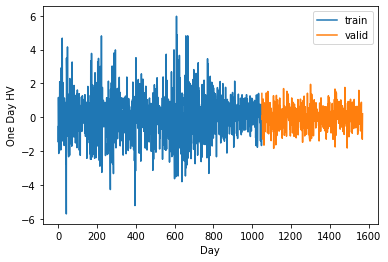

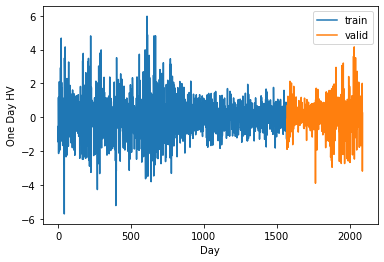

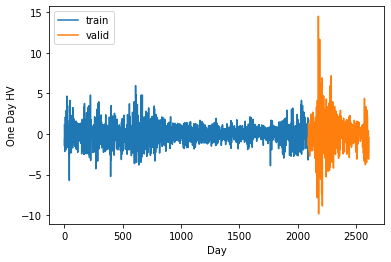

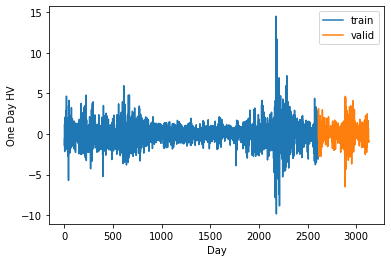

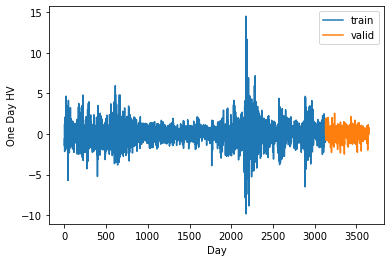

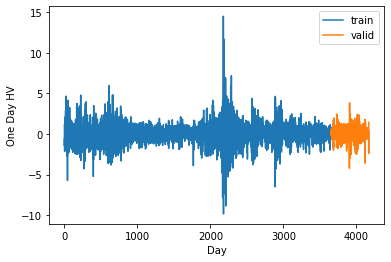

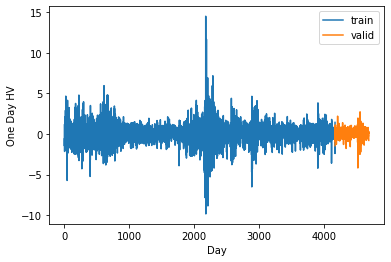

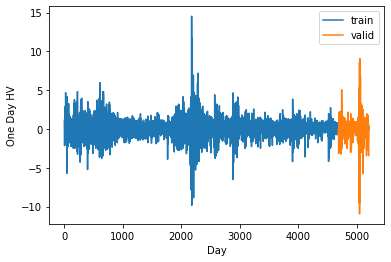

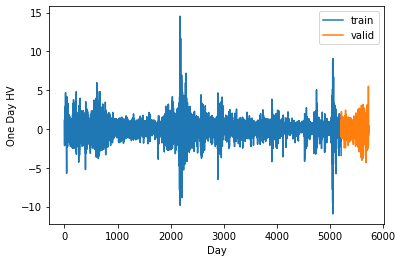

In [ ]:
# One Day HV

Time_series_model_one_day_vol_nn_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_one_day_vol_nn_v1.split(One_Day_HV_lagged, output_time_series_one_day_vol):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('One Day HV')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()

pipe_nn_predictor_one_day_vol = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

Time_series_model_one_day_vol_nn=model_selection.TimeSeriesSplit(n_splits=10)
gscv_nn_pred_one_day_vol = model_selection.GridSearchCV(pipe_nn_predictor_one_day_vol, param_grid, scoring='neg_mean_squared_error', 
                                                            cv=Time_series_model_one_day_vol_nn, return_train_score=False, verbose=10)
gscv_nn_pred_one_day_vol.fit(One_Day_HV_lagged, output_time_series_one_day_vol)
print(gscv_nn_pred_one_day_vol.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-75.191 total time=   1.3s
[CV 2/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 2/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.520 total time=   2.3s
[CV 3/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 3/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.691 total time=   2.1s
[CV 4/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 4/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.733 total time=   3.1s
[CV 5/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 5/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.739 total time=   3.5s
[CV 6/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 6/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.307 total time=   2.9s
[CV 7/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 7/10; 1/3] END nn

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.788 total time=   4.2s
[CV 2/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 2/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.349 total time=   3.9s
[CV 3/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 3/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.653 total time=   5.9s
[CV 4/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 4/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-3.825 total time=   4.7s
[CV 5/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 5/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.845 total time=   6.8s
[CV 6/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 6/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.315 total time=   7.7s
[CV 7/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 7/10; 2/3] END nn_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-1.928 total time=   5.7s
[CV 2/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 2/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.313 total time=   4.8s
[CV 3/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 3/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.603 total time=   4.3s
[CV 4/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 4/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-6.543 total time=   7.0s
[CV 5/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 5/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-1.053 total time=   4.5s
[CV 6/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 6/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.340 total time=   6.8s
[CV 7/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 7/10; 3/3] E

In [ ]:
# For reference, here are the average and stdev of the One Day HV
print(np.average(output_time_series_one_day_vol))
print(np.std(output_time_series_one_day_vol))

16.98506666975188
10.728979330053686


In [ ]:
print(gscv_nn_pred_one_day_vol.best_params_)

{'nn__hidden_layer_sizes': (50,)}


We notice that a time series method with MLP / NN yielded, at best, an MSE of 1.24 using 50 hidden layer size.

### Usage of Time Series and MLP / NN for Five Day HV

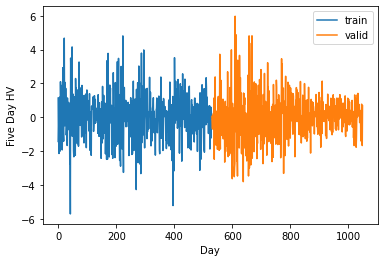

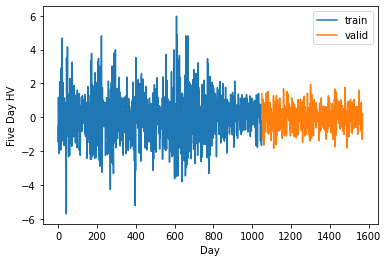

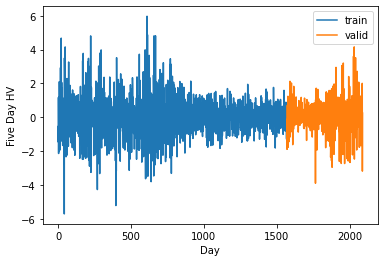

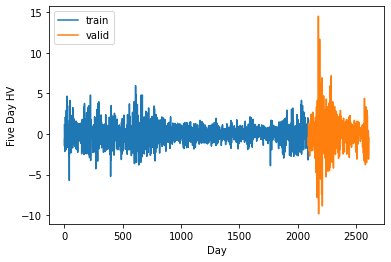

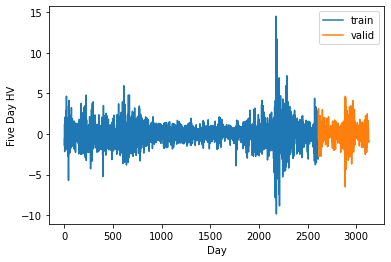

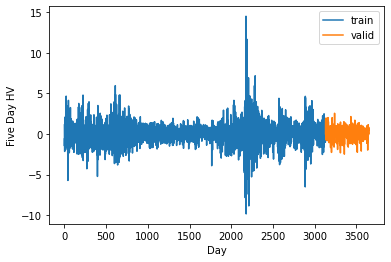

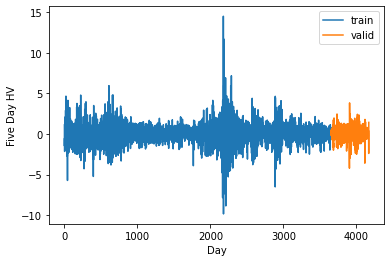

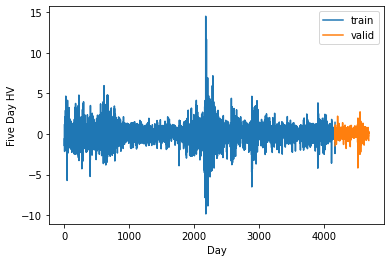

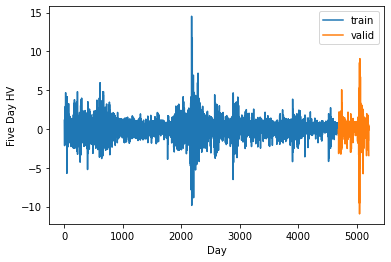

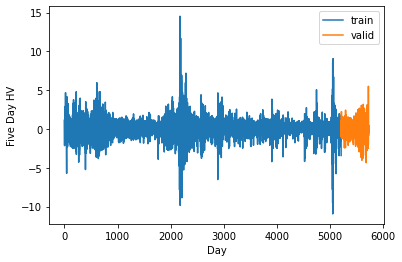

In [ ]:
# Five Day HV

Time_series_model_five_day_vol_nn_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_five_day_vol_nn_v1.split(Five_Day_HV_lagged, output_time_series_five_day_vol):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('Five Day HV')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()

pipe_nn_predictor_five_day_vol = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

Time_series_model_five_day_vol_nn=model_selection.TimeSeriesSplit(n_splits=10)
gscv_nn_pred_five_day_vol = model_selection.GridSearchCV(pipe_nn_predictor_five_day_vol, param_grid, scoring='neg_mean_squared_error', 
                                                            cv=Time_series_model_five_day_vol_nn, return_train_score=False, verbose=10)
gscv_nn_pred_five_day_vol.fit(Five_Day_HV_lagged, output_time_series_five_day_vol)
print(gscv_nn_pred_five_day_vol.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-444.319 total time=   1.2s
[CV 2/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.038 total time=   2.4s
[CV 3/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 3/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.121 total time=   3.1s
[CV 4/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 4/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.329 total time=   5.1s
[CV 5/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 5/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.100 total time=   2.9s
[CV 6/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 6/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.017 total time=   3.8s
[CV 7/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 7/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.089 total time=   3.7s
[CV 8/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 8/10; 1/3] END nn_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-193.902 total time=   3.0s
[CV 2/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 2/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.018 total time=   3.8s
[CV 3/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 3/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.033 total time=   5.1s
[CV 4/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 4/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.492 total time=   5.3s
[CV 5/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 5/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.094 total time=   5.0s
[CV 6/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 6/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.017 total time=   6.8s
[CV 7/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 7/10; 2/3] END n

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-51.559 total time=   4.2s
[CV 2/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 2/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.013 total time=   3.8s
[CV 3/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 3/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.071 total time=   4.8s
[CV 4/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 4/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.324 total time=   4.0s
[CV 5/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 5/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.097 total time=   5.1s
[CV 6/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 6/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-0.020 total time=   6.1s
[CV 7/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 7/10; 3/3] 

In [ ]:
# For reference, here are the average and stdev of the Five Day HV
print(np.average(output_time_series_five_day_vol))
print(np.std(output_time_series_five_day_vol))

16.049680612381533
8.01493885597388


In [ ]:
print(-gscv_nn_pred_five_day_vol.best_score_)
print(gscv_nn_pred_five_day_vol.best_params_)

5.3437740537802805
{'nn__hidden_layer_sizes': (100,)}


We notice that a time series method with MLE / NN yielded, at best, an MSE of 5.34 using 100 hidden layer size.

### Usage of Time Series and MLP / NN for VIX Close 

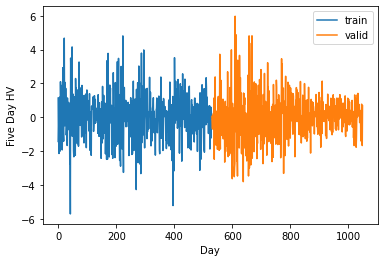

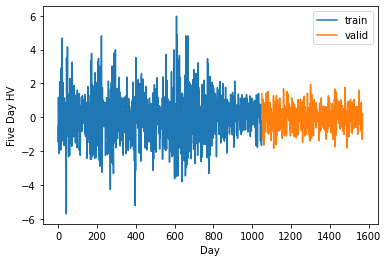

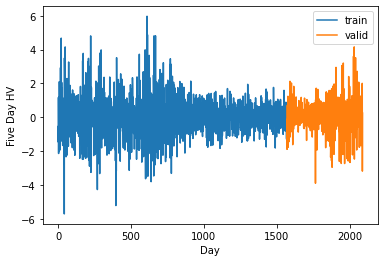

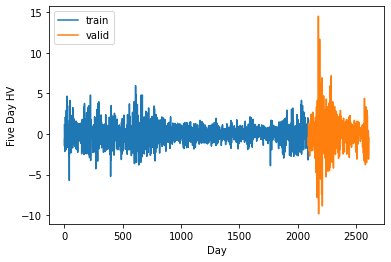

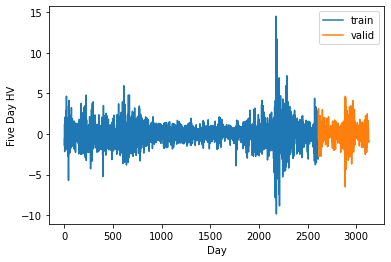

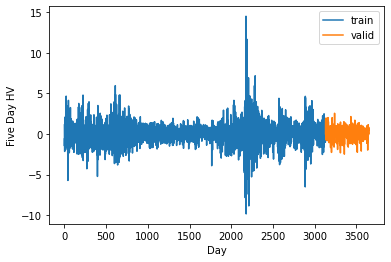

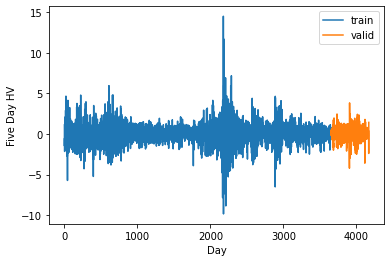

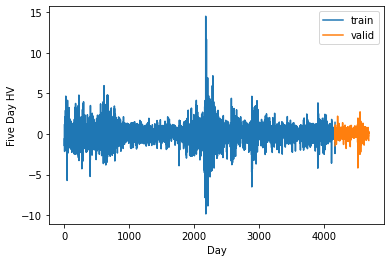

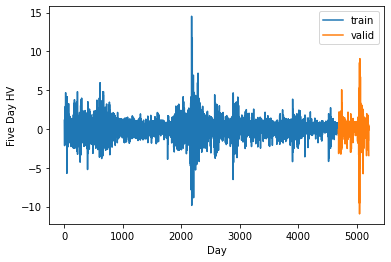

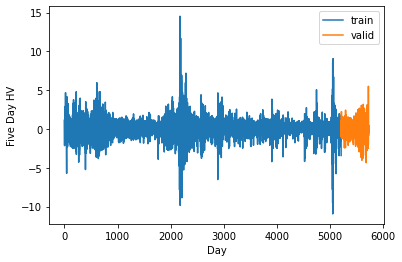

In [ ]:
# VIX Close

Time_series_model_VIX_close_nn_v1 = model_selection.TimeSeriesSplit(n_splits=10)
i = 0
for train_ndx, valid_ndx in Time_series_model_VIX_close_nn_v1.split(VIX_Close_lagged, output_VIX_close):
  fig = plt.figure()
  plt.plot(train_ndx, output_time_series_one_day_returns[train_ndx], label = 'train')
  plt.plot(valid_ndx, output_time_series_one_day_returns[valid_ndx], label = 'valid')
  plt.xlabel('Day')
  plt.ylabel('Five Day HV')
  plt.legend()
  plt.show()
  i+=1

In [ ]:
normalizer = preprocessing.StandardScaler()

pipe_nn_predictor_VIX_close = pipeline.Pipeline([('norm', preprocessing.StandardScaler()), ('nn', neural_network.MLPRegressor(max_iter=1000))])
param_grid = {'nn__hidden_layer_sizes':[(10,),(50,),(100,)]}

Time_series_model_VIX_close_nn=model_selection.TimeSeriesSplit(n_splits=10)
gscv_nn_pred_VIX_close = model_selection.GridSearchCV(pipe_nn_predictor_VIX_close, param_grid, scoring='neg_mean_squared_error', 
                                                            cv=Time_series_model_VIX_close_nn, return_train_score=False, verbose=10)
gscv_nn_pred_VIX_close.fit(VIX_Close_lagged, output_VIX_close)
print(gscv_nn_pred_VIX_close.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-28.241 total time=   1.2s
[CV 2/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 2/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-0.561 total time=   2.3s
[CV 3/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 3/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-2.169 total time=   2.3s
[CV 4/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 4/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-15.959 total time=   1.6s
[CV 5/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 5/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-3.982 total time=   2.6s
[CV 6/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 6/10; 1/3] END nn__hidden_layer_sizes=(10,);, score=-1.156 total time=   2.3s
[CV 7/10; 1/3] START nn__hidden_layer_sizes=(10,)...............................
[CV 7/10; 1/3] END n

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-4.734 total time=   3.0s
[CV 2/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 2/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-0.610 total time=   3.3s
[CV 3/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 3/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-2.138 total time=   4.0s
[CV 4/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 4/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-9.658 total time=   3.5s
[CV 5/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 5/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-3.782 total time=   3.9s
[CV 6/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 6/10; 2/3] END nn__hidden_layer_sizes=(50,);, score=-1.151 total time=   4.2s
[CV 7/10; 2/3] START nn__hidden_layer_sizes=(50,)...............................
[CV 7/10; 2/3] END nn_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-5.329 total time=   4.3s
[CV 2/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 2/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-2.030 total time=   3.9s
[CV 3/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 3/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-2.134 total time=   3.4s
[CV 4/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 4/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-10.947 total time=   3.7s
[CV 5/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 5/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-3.811 total time=   3.9s
[CV 6/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 6/10; 3/3] END nn__hidden_layer_sizes=(100,);, score=-1.131 total time=   3.8s
[CV 7/10; 3/3] START nn__hidden_layer_sizes=(100,)..............................
[CV 7/10; 3/3] 

In [ ]:
print(gscv_nn_pred_VIX_close.best_params_)

{'nn__hidden_layer_sizes': (50,)}


In [ ]:
# For reference, here are the average and stdev of the VIX Close
print(np.average(output_VIX_close))
print(np.std(output_VIX_close))

20.16616928539975
8.736188307774839


We notice that a time series method with MLP / NN yielded, at best, an MSE of 3.99 using 50 hidden layer size.

# Checking Against Hidden Test Dataset

## Classification -- Random Forest

In [ ]:
# For One Day Classifier -- v1
output1_test_forest_1=our_forest_1.predict_proba(normalizer.fit_transform(input1_test))
print('The random forest has an AUC of {0} for One Day Classification for Random Forest with 21 features, 10 trees, and max depth of 5'\
      .format(roc_auc_score(output1_test, output1_test_forest_1[:,1])))

# For One Day Classifier -- v2
output1_test_forest_1_v2=our_forest_1_v2.predict_proba(normalizer.fit_transform(input1_v2_test))
print('The random forest has an AUC of {0} for One Day Classification for Random Forest with 13 features, 10 trees, and max depth of 5'\
      .format(roc_auc_score(output1_v2_test, output1_test_forest_1_v2[:,1])))

# For Five Day Classifier -- v1
output_1_five_day_classifier_test_forest_1=our_forest_1_five_day_classifier.predict_proba(normalizer.fit_transform(input1_five_day_classifier_test))
print('The random forest has an AUC of {0} for Five Day Classification for Random Forest with 21 features, 10 trees, and max depth of 5'\
      .format(roc_auc_score(output_1_five_day_classifier_test, output_1_five_day_classifier_test_forest_1[:,1])))

# For Five Day Classifier -- v2
output_1_five_day_classifier_test_forest_1_v2 = our_forest_1_five_day_classifier_v2.predict_proba(normalizer.fit_transform(input1_five_day_classifier_test_v2))
print('The random forest has an AUC of {0} for Five Day Classification for Random Forest with 13 features, 10 trees, and max depth of 5'\
      .format(roc_auc_score(output_1_five_day_classifier_test_v2, output_1_five_day_classifier_test_forest_1_v2[:,1])))

The random forest has an AUC of 0.5020119609082511 for One Day Classification for Random Forest with 21 features, 10 trees, and max depth of 5
The random forest has an AUC of 0.4991732804232804 for One Day Classification for Random Forest with 13 features, 10 trees, and max depth of 5
The random forest has an AUC of 0.8411273325755423 for Five Day Classification for Random Forest with 21 features, 10 trees, and max depth of 5
The random forest has an AUC of 0.8439694140177232 for Five Day Classification for Random Forest with 13 features, 10 trees, and max depth of 5


## Classification -- Logistic Regression

In [ ]:
# For One Day Classifier -- v1
print('The AUC for Logistic Regression with v1 -- 21 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_test, pipeline_log_regression_1.predict(input_1_logistic_regression_test))))

# For One Day Classifier -- v2
print('The AUC for Logistic Regression with v2 -- 13 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_v2_test, pipeline_log_regression_1_v2.predict(input_1_logistic_regression_v2_test))))

# For Five Day Classifier -- v1
print('The AUC for Logistic Regression with v2 -- 21 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_five_day_test, pipeline_log_regression_five_day.predict(input_1_logistic_regression_five_day_test))))

# For Five Day Classifier -- v2
print('The AUC for Logistic Regression with v2 -- 13 features is {0}'
.format(roc_auc_score(output_1_logistic_regression_five_day_test_v2, pipeline_log_regression_five_day_v2.predict(input_1_logistic_regression_five_day_test_v2))))

The AUC for Logistic Regression with v1 -- 22 features is 0.5092753623188406
The AUC for Logistic Regression with v2 -- 13 features is 0.5035718703612073
The AUC for Logistic Regression with v2 -- 21 features is 0.7807692307692308
The AUC for Logistic Regression with v2 -- 13 features is 0.7712961821032788


## Classification -- MLP / NN

In [ ]:
# For One Day Classifier -- v1
pipe_nn_1_one_day_v1.set_params(**{'nn__hidden_layer_sizes':(100,)})
print(pipe_nn_1_one_day_v1)
pipe_nn_1_one_day_v1.fit(input_1_nn_classifier_train, output_1_nn_classifier_train)
print('The AUC for MLP / NN with v1 -- 21 features is {0}'
.format(roc_auc_score(output_1_nn_classifier_test, pipe_nn_1_one_day_v1.predict(input_1_nn_classifier_test))))

# For One Day Classifier -- v2
pipe_nn_1_one_day_v2.set_params(**{'nn__hidden_layer_sizes':(100,)})
pipe_nn_1_one_day_v2.fit(input_1_nn_classifier_v2_train, output_1_nn_classifier_v2_train)
print('The AUC for MLP / NN with v2 -- 13 features is {0}'
.format(roc_auc_score(output_1_nn_classifier_v2_test, pipe_nn_1_one_day_v2.predict(input_1_nn_classifier_v2_test))))

# For Five Day Classifier -- v1
pipe_nn_1_five_day_v1.set_params(**{'nn__hidden_layer_sizes':(10,)})
pipe_nn_1_five_day_v1.fit(input_1_nn_classifier_five_day_train, output_1_nn_classifier_five_day_train)
print('The AUC for MLP / NN with v1 -- 21 features is {0}'
.format(roc_auc_score(output_1_nn_classifier_five_day_test, pipe_nn_1_five_day_v1.predict(input_1_nn_classifier_five_day_test))))

# For Five Day Classifier -- v2
pipe_nn_1_five_day_v2.set_params(**{'nn__hidden_layer_sizes':(10,)})
pipe_nn_1_five_day_v2.fit(input_1_nn_classifier_five_day_train_v2, output_1_nn_classifier_five_day_train_v2)
print('The AUC for MLP / NN with v2 -- 13 features is {0}'
.format(roc_auc_score(output_1_nn_classifier_five_day_test_v2, pipe_nn_1_five_day_v2.predict(input_1_nn_classifier_five_day_test_v2))))

Pipeline(steps=[('norm', StandardScaler()),
                ('nn', MLPClassifier(max_iter=1000))])
The AUC for MLP / NN with v1 -- 21 features is 0.5102554179566564
The AUC for MLP / NN with v2 -- 13 features is 0.5205403117451983
The AUC for MLP / NN with v1 -- 21 features is 0.7778363037445263
The AUC for MLP / NN with v2 -- 13 features is 0.797205509422704


## Prediction - Ridge and Lasso

In [ ]:
# For One Day Returns
pipe_penalized_predictor_1_one_day_v1.set_params(**{'regressor__alpha': 1.0})
pipe_penalized_predictor_2_one_day_v1.set_params(**{'regressor__alpha': 0.007847599703514606})
pipe_penalized_predictor_1_one_day_v1.fit(input_1_penalized_predictor_train, output_1_penalized_predictor_train)
pipe_penalized_predictor_2_one_day_v1.fit(input_1_penalized_predictor_train, output_1_penalized_predictor_train)
print('The MSE for Ridge Regression for One Day Returns Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_test, pipe_penalized_predictor_1_one_day_v1.predict(input_1_penalized_predictor_test))))
print('The MSE for Lasso Regression for One Day Returns Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_test, pipe_penalized_predictor_2_one_day_v1.predict(input_1_penalized_predictor_test))))

# For One Day Returns -- v2
pipe_penalized_predictor_1_one_day_v2.set_params(**{'regressor__alpha': 1.0})
pipe_penalized_predictor_2_one_day_v2.set_params(**{'regressor__alpha': 0.0206913808111479})
pipe_penalized_predictor_1_one_day_v2.fit(input_1_penalized_predictor_v2_train, output_1_penalized_predictor_v2_train)
pipe_penalized_predictor_2_one_day_v2.fit(input_1_penalized_predictor_v2_train, output_1_penalized_predictor_v2_train)
print('The MSE for Ridge Regression for One Day Returns Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_v2_test, pipe_penalized_predictor_1_one_day_v2.predict(input_1_penalized_predictor_v2_test))))
print('The MSE for Lasso Regression for One Day Returns Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_v2_test, pipe_penalized_predictor_2_one_day_v2.predict(input_1_penalized_predictor_v2_test))))

# For Five Day Returns
pipe_penalized_predictor_1_five_day_v1.set_params(**{'regressor__alpha': 1.0})
pipe_penalized_predictor_2_five_day_v1.set_params(**{'regressor__alpha': 0.03359818286283781})
pipe_penalized_predictor_1_five_day_v1.fit(input_1_penalized_predictor_five_day_train, output_1_penalized_predictor_five_day_train)
pipe_penalized_predictor_2_five_day_v1.fit(input_1_penalized_predictor_five_day_train, output_1_penalized_predictor_five_day_train)
print('The MSE for Ridge Regression for Five Day Returns Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_five_day_test, pipe_penalized_predictor_1_five_day_v1.predict(input_1_penalized_predictor_five_day_test))))
print('The MSE for Lasso Regression for Five Day Returns Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_five_day_test, pipe_penalized_predictor_2_five_day_v1.predict(input_1_penalized_predictor_five_day_test))))

# For Five Day Returns -- v2
pipe_penalized_predictor_1_five_day_v2.set_params(**{'regressor__alpha': 1.0})
pipe_penalized_predictor_2_five_day_v2.set_params(**{'regressor__alpha': 0.05455594781168514})
pipe_penalized_predictor_1_five_day_v2.fit(input_1_penalized_predictor_five_day_train_v2, output_1_penalized_predictor_five_day_train_v2)
pipe_penalized_predictor_2_five_day_v2.fit(input_1_penalized_predictor_five_day_train_v2, output_1_penalized_predictor_five_day_train_v2)
print('The MSE for Ridge Regression for Five Day Returns Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_five_day_test_v2, pipe_penalized_predictor_1_five_day_v2.predict(input_1_penalized_predictor_five_day_test_v2))))
print('The MSE for Lasso Regression for Five Day Returns Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_1_penalized_predictor_five_day_test_v2, pipe_penalized_predictor_2_five_day_v2.predict(input_1_penalized_predictor_five_day_test_v2))))

The MSE for Ridge Regression for One Day Returns Prediction is 1.7589828870867728 for 22 params.
The MSE for Lasso Regression for One Day Returns Prediction is 1.7584645612464764 for 22 params.
The MSE for Ridge Regression for One Day Returns Prediction is 1.5781653137589817 for 13 params.
The MSE for Lasso Regression for One Day Returns Prediction is 1.5777939680927988 for 13 params.
The MSE for Ridge Regression for Five Day Returns Prediction is 2.7371281612911234 for 22 params.
The MSE for Lasso Regression for Five Day Returns Prediction is 2.762135215030224 for 22 params.
The MSE for Ridge Regression for Five Day Returns Prediction is 2.6868756337837323 for 13 params.
The MSE for Lasso Regression for Five Day Returns Prediction is 2.710540114488155 for 13 params.


## Prediction - MLP / NN

In [ ]:
# For One Day Returns
pipe_nn_pred_one_day_v1.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_one_day_v1.fit(input_1_nn_predictor_train, output_1_nn_predictor_train)
print('The MSE for MLP / NN for One Day Returns Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_1_nn_predictor_test, pipe_nn_pred_one_day_v1.predict(input_1_nn_predictor_test))))

# For One Day Returns -- v2
pipe_nn_pred_one_day_v2.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_one_day_v2.fit(input_1_nn_predictor_v2_train, output_1_nn_predictor_v2_train)
print('The MSE for MLP / NN for One Day Returns Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_1_nn_predictor_v2_test, pipe_nn_pred_one_day_v2.predict(input_1_nn_predictor_v2_test))))

# For Five Day Returns
pipe_nn_pred_five_day_v1.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_five_day_v1.fit(input_1_nn_predictor_five_day_train, output_1_nn_predictor_five_day_train)
print('The MSE for MLP / NN for Five Day Returns Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_1_nn_predictor_five_day_test, pipe_nn_pred_five_day_v1.predict(input_1_nn_predictor_five_day_test))))

# For Five Day Returns -- v2
pipe_nn_pred_five_day_v2.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_five_day_v2.fit(input_1_nn_predictor_five_day_train_v2, output_1_nn_predictor_five_day_train_v2)
print('The MSE for MLP / NN for Five Day Returns Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_1_nn_predictor_five_day_test_v2, pipe_nn_pred_five_day_v2.predict(input_1_nn_predictor_five_day_test_v2))))

The MSE for MLP / NN for One Day Returns Prediction is 1.6764484991678108 for 22 params.
The MSE for MLP / NN for One Day Returns Prediction is 1.6669056722768718 for 13 params.
The MSE for MLP / NN for Five Day Returns Prediction is 3.086331780791614 for 22 params.
The MSE for MLP / NN for Five Day Returns Prediction is 2.9134207638874186 for 13 params.


## Vol Pred -- Ridge and Lasso

In [ ]:
# For One Day Vol
pipe_penalized_predictor_1_one_day_vol_v1.set_params(**{'regressor__alpha': 0.14384498882876628})
pipe_penalized_predictor_2_one_day_vol_v1.set_params(**{'regressor__alpha': 0.0011288378916846883})
pipe_penalized_predictor_1_one_day_vol_v1.fit(input_penalized_predictor_one_day_vol_train, output_penalized_predictor_one_day_vol_train)
pipe_penalized_predictor_2_one_day_vol_v1.fit(input_penalized_predictor_one_day_vol_train, output_penalized_predictor_one_day_vol_train)
print('The MSE for Ridge Regression for One Day HV Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_one_day_vol_test, pipe_penalized_predictor_1_one_day_vol_v1.predict(input_penalized_predictor_one_day_vol_test))))
print('The MSE for Lasso Regression for One Day HV Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_one_day_vol_test, pipe_penalized_predictor_2_one_day_vol_v1.predict(input_penalized_predictor_one_day_vol_test))))

# For One Day Vol -- v2
pipe_penalized_predictor_1_one_day_vol_v2.set_params(**{'regressor__alpha': 1.0})
pipe_penalized_predictor_2_one_day_vol_v2.set_params(**{'regressor__alpha': 0.007847599703514606})
pipe_penalized_predictor_1_one_day_vol_v2.fit(input_penalized_predictor_one_day_vol_train_v2, output_penalized_predictor_one_day_vol_train_v2)
pipe_penalized_predictor_2_one_day_vol_v2.fit(input_penalized_predictor_one_day_vol_train_v2, output_penalized_predictor_one_day_vol_train_v2)
print('The MSE for Ridge Regression for One Day HV Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_one_day_vol_test_v2, pipe_penalized_predictor_1_one_day_vol_v2.predict(input_penalized_predictor_one_day_vol_test_v2))))
print('The MSE for Lasso Regression for One Day HV Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_one_day_vol_test_v2, pipe_penalized_predictor_2_one_day_vol_v2.predict(input_penalized_predictor_one_day_vol_test_v2))))

# For Five Day Vol
pipe_penalized_predictor_1_five_day_vol_v1.set_params(**{'regressor__alpha': 0.08858667904100823})
pipe_penalized_predictor_2_five_day_vol_v1.set_params(**{'regressor__alpha': 0.0018329807108324356})
pipe_penalized_predictor_1_five_day_vol_v1.fit(input_penalized_predictor_five_day_vol_train, output_penalized_predictor_five_day_vol_train)
pipe_penalized_predictor_2_five_day_vol_v1.fit(input_penalized_predictor_five_day_vol_train, output_penalized_predictor_five_day_vol_train)
print('The MSE for Ridge Regression for Five Day HV Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_five_day_vol_test, pipe_penalized_predictor_1_five_day_vol_v1.predict(input_penalized_predictor_five_day_vol_test))))
print('The MSE for Lasso Regression for Five Day HV Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_five_day_vol_test, pipe_penalized_predictor_2_five_day_vol_v1.predict(input_penalized_predictor_five_day_vol_test))))

# For Five Day Vol -- v2
pipe_penalized_predictor_1_five_day_vol_v2.set_params(**{'regressor__alpha': 1.0})
pipe_penalized_predictor_2_five_day_vol_v2.set_params(**{'regressor__alpha': 0.007847599703514606})
pipe_penalized_predictor_1_five_day_vol_v2.fit(input_penalized_predictor_five_day_vol_train_v2, output_penalized_predictor_five_day_vol_train_v2)
pipe_penalized_predictor_2_five_day_vol_v2.fit(input_penalized_predictor_five_day_vol_train_v2, output_penalized_predictor_five_day_vol_train_v2)
print('The MSE for Ridge Regression for Five Day HV Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_five_day_vol_test_v2, pipe_penalized_predictor_1_five_day_vol_v2.predict(input_penalized_predictor_five_day_vol_test_v2))))
print('The MSE for Lasso Regression for Five Day HV Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_penalized_predictor_five_day_vol_test_v2, pipe_penalized_predictor_2_five_day_vol_v2.predict(input_penalized_predictor_five_day_vol_test_v2))))

The MSE for Ridge Regression for One Day HV Prediction is 0.7544791925292432 for 22 params.
The MSE for Lasso Regression for One Day HV Prediction is 0.7300925266796813 for 22 params.
The MSE for Ridge Regression for One Day HV Prediction is 0.5847547166529659 for 13 params.
The MSE for Lasso Regression for One Day HV Prediction is 0.5846006024976527 for 13 params.
The MSE for Ridge Regression for Five Day HV Prediction is 0.0567845959919726 for 22 params.
The MSE for Lasso Regression for Five Day HV Prediction is 0.05666120890176934 for 22 params.
The MSE for Ridge Regression for Five Day HV Prediction is 0.0653578700806269 for 13 params.
The MSE for Lasso Regression for Five Day HV Prediction is 0.06483567935191654 for 13 params.


## Vol Pred -- MLP / NN

In [ ]:
# For One Day HV
pipe_nn_pred_one_day_vol_v1.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_one_day_vol_v1.fit(input_nn_predictor_one_day_vol_train, output_nn_predictor_one_day_vol_train)
print('The MSE for MLP / NN for One Day HV Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_nn_predictor_one_day_vol_test, pipe_nn_pred_one_day_vol_v1.predict(input_nn_predictor_one_day_vol_test))))

# For One Day HV -- v2
pipe_nn_pred_one_day_vol_v2.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_one_day_vol_v2.fit(input_nn_predictor_one_day_vol_train_v2, output_nn_predictor_one_day_vol_train_v2)
print('The MSE for MLP / NN for One Day HV Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_nn_predictor_one_day_vol_test_v2, pipe_nn_pred_one_day_vol_v2.predict(input_nn_predictor_one_day_vol_test_v2))))

# For Five Day HV
pipe_nn_pred_five_day_vol_v1.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_five_day_vol_v1.fit(input_nn_predictor_five_day_vol_train, output_nn_predictor_five_day_vol_train)
print('The MSE for MLP / NN for Five Day HV Prediction is {0} for 22 params.'.
      format(metrics.mean_squared_error(output_nn_predictor_five_day_vol_test, pipe_nn_pred_five_day_vol_v1.predict(input_nn_predictor_five_day_vol_test))))

# For Five Day HV -- v2
pipe_nn_pred_five_day_vol_v2.set_params(**{'nn__hidden_layer_sizes': (10,)})
pipe_nn_pred_five_day_vol_v2.fit(input_nn_predictor_five_day_vol_train_v2, output_nn_predictor_five_day_vol_train_v2)
print('The MSE for MLP / NN for Five Day HV Prediction is {0} for 13 params.'.
      format(metrics.mean_squared_error(output_nn_predictor_five_day_vol_test_v2, pipe_nn_pred_five_day_vol_v2.predict(input_nn_predictor_five_day_vol_test_v2))))

The MSE for MLP / NN for One Day HV Prediction is 0.6334986736246803 for 22 params.
The MSE for MLP / NN for One Day HV Prediction is 0.5251002530513291 for 13 params.
The MSE for MLP / NN for Five Day HV Prediction is 0.08792258733172004 for 22 params.
The MSE for MLP / NN for Five Day HV Prediction is 0.07366632954000164 for 13 params.
